In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/ml100.vtree', '/root/PySDD/notebooks/ml100.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=100
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [46], 1: [59], 2: [53, 63, 86], 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96], 4: [24, 26, 37, 71, 83, 87, 94, 99], 5: [96], 6: [38], 7: [85], 8: [19, 64], 9: [], 10: [], 11: [], 12: [17, 79, 81], 13: [17, 23, 24, 25, 26, 30, 36, 42, 54, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 14: [], 15: [], 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89], 17: [3, 12, 13, 16, 24, 25, 27, 29, 35, 39, 42, 46, 51, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 85, 89, 92, 96], 18: [], 19: [8, 37, 64, 70, 91], 20: [], 21: [], 22: [3, 30, 61, 66, 78, 81, 85, 90, 96], 23: [3, 13, 61, 66, 89], 24: [3, 4, 13, 16, 17, 25, 26, 27, 31, 34, 38, 42, 51, 54, 56, 61, 66, 68, 72, 74, 76, 77, 81, 84, 87, 89, 99], 25: [13, 16, 17, 24, 27, 35, 36, 39, 40, 42, 48, 51, 52, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 26: [3, 4, 13, 24, 34, 42, 54, 66, 74, 77, 81, 83, 92, 97], 27: [16, 17, 24, 25, 35, 39, 46, 51, 52, 61, 68, 76, 87, 99], 28: [], 29: [17, 35, 56, 66, 72, 79, 81, 89], 30: [13, 22, 54, 61, 66, 73, 75, 78, 81, 95], 31: [24, 46, 51, 52, 61, 76, 79], 32: [], 33: [], 34: [3, 24, 26, 54, 66, 71, 74, 77, 81, 84, 94], 35: [16, 17, 25, 27, 29, 36, 39, 40, 46, 48, 52, 56, 61, 66, 72, 76, 77, 81, 89], 36: [13, 25, 35, 42, 56, 57, 66, 77, 81, 84, 89, 92], 37: [4, 19, 51, 64, 87, 99], 38: [6, 24, 51, 63, 67, 99], 39: [16, 17, 25, 27, 35, 48, 56, 61, 76, 77, 81, 85, 89], 40: [25, 35], 41: [], 42: [13, 16, 17, 24, 25, 26, 36, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 43: [], 44: [51, 74], 45: [], 46: [0, 16, 17, 27, 31, 35, 51, 52, 61, 76, 96], 47: [], 48: [16, 25, 35, 39, 56, 61, 66, 77, 89], 49: [], 50: [], 51: [3, 17, 24, 25, 27, 31, 37, 38, 44, 46, 61, 68, 76, 87, 94, 99], 52: [17, 25, 27, 31, 35, 46, 61, 72, 76, 79, 81, 89], 53: [2, 70, 86, 93], 54: [13, 17, 24, 25, 26, 30, 34, 42, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 55: [], 56: [13, 16, 17, 24, 25, 29, 35, 36, 39, 42, 48, 54, 61, 66, 77, 81, 84, 89, 92], 57: [36], 58: [], 59: [1], 60: [], 61: [3, 13, 16, 17, 22, 23, 24, 25, 27, 30, 31, 35, 39, 42, 46, 48, 51, 52, 54, 56, 66, 72, 76, 77, 79, 81, 84, 85, 87, 89, 90, 96], 62: [], 63: [2, 38], 64: [8, 19, 37, 74, 87, 91], 65: [], 66: [3, 13, 16, 17, 22, 23, 24, 25, 26, 29, 30, 34, 35, 36, 42, 48, 54, 56, 61, 72, 73, 74, 76, 77, 81, 84, 85, 89, 92], 67: [38], 68: [13, 24, 25, 27, 42, 51, 54, 87, 99], 69: [], 70: [19, 53], 71: [4, 34, 74], 72: [13, 16, 17, 24, 25, 29, 35, 42, 52, 54, 61, 66, 76, 79, 81, 89], 73: [30, 66, 78, 84], 74: [3, 24, 26, 34, 44, 64, 66, 71, 77, 83], 75: [30], 76: [16, 17, 24, 25, 27, 31, 35, 39, 42, 46, 51, 52, 61, 66, 72, 79, 81, 89, 96], 77: [13, 17, 24, 25, 26, 34, 35, 36, 39, 42, 48, 54, 56, 61, 66, 74, 81, 84, 89, 92], 78: [22, 30, 73, 85, 90], 79: [12, 17, 29, 31, 52, 61, 72, 76, 81, 89], 80: [], 81: [3, 12, 13, 16, 17, 22, 24, 25, 26, 29, 30, 34, 35, 36, 39, 42, 52, 54, 56, 61, 66, 72, 76, 77, 79, 84, 85, 89, 92, 95], 82: [], 83: [4, 26, 74], 84: [13, 16, 24, 25, 34, 36, 42, 54, 56, 61, 66, 73, 77, 81, 89], 85: [3, 7, 17, 22, 39, 61, 66, 78, 81, 89, 90], 86: [2, 53, 88, 91], 87: [3, 4, 24, 27, 37, 51, 61, 64, 68, 91, 94, 99], 88: [86], 89: [3, 13, 16, 17, 23, 24, 25, 29, 35, 36, 39, 42, 48, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 84, 85, 92], 90: [3, 22, 61, 78, 85], 91: [19, 64, 86, 87, 94], 92: [13, 17, 25, 26, 36, 42, 54, 56, 66, 77, 81, 89, 95], 93: [53], 94: [4, 34, 51, 87, 91, 99], 95: [13, 30, 54, 81, 92], 96: [3, 5, 17, 22, 46, 61, 76], 97: [26], 98: [], 99: [4, 24, 27, 37, 38, 51, 68, 87, 94]}
def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [2]:
legalList

{0: [46],
 1: [59],
 2: [53, 63, 86],
 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96],
 4: [24, 26, 37, 71, 83, 87, 94, 99],
 5: [96],
 6: [38],
 7: [85],
 8: [19, 64],
 9: [],
 10: [],
 11: [],
 12: [17, 79, 81],
 13: [17,
  23,
  24,
  25,
  26,
  30,
  36,
  42,
  54,
  56,
  61,
  66,
  68,
  72,
  77,
  81,
  84,
  89,
  92,
  95],
 14: [],
 15: [],
 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89],
 17: [3,
  12,
  13,
  16,
  24,
  25,
  27,
  29,
  35,
  39,
  42,
  46,
  51,
  52,
  54,
  56,
  61,
  66,
  72,
  76,
  77,
  79,
  81,
  85,
  89,
  92,
  96],
 18: [],
 19: [8, 37, 64, 70, 91],
 20: [],
 21: [],
 22: [3, 30, 61, 66, 78, 81, 85, 90, 96],
 23: [3, 13, 61, 66, 89],
 24: [3,
  4,
  13,
  16,
  17,
  25,
  26,
  27,
  31,
  34,
  38,
  42,
  51,
  54,
  56,
  61,
  66,
  68,
  72,
  74,
  76,
  77,
  81,
  84,
  87,
  89,
  99],
 25: [13,
  16,
  17,
  24,
  27,
  35,
  36,
  39,
  40,
  42,
  48,
  51,
  52,
  54,
  56,
 

In [3]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=1,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [4]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,100):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,100):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                50000000*constraint(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,100):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,100):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [5]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [6]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,100):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
T = int(12e2)
n_arms =40
n_features = 100
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [27]:
### mean reward function

a = np.load('rateListml100.npy')
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([100,100]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*x.dot(Q).dot(x)
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*x.dot(Q).dot(x) #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [28]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))

1538.6243559104416

In [29]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',6000)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


649.9184091708478

In [30]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

44-------------
55-------------


  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

66-------------
---------------- 540.1620483398438 484.8708786640687 tensor(0.0055, dtype=torch.float64) 509.6433522014504 tensor(0., dtype=torch.float64)
hhhhh 535.9941527848066 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  0%|          | 1/1200 [00:08<2:49:12,  8.47s/it, total regret=4.17, % optimal arm=0.00%]

---------------- 540.1620483398438 496.52767758767243 tensor(0.0027, dtype=torch.float64) 477.7873713547289 tensor(0., dtype=torch.float64)
hhhhh 498.75364528376423 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  0%|          | 2/1200 [00:19<3:04:36,  9.25s/it, total regret=1.26e+3, % optimal arm=0.00%]

---------------- 540.1620483398438 521.7748160983807 tensor(0.0041, dtype=torch.float64) 522.1946962310124 tensor(0., dtype=torch.float64)
hhhhh 501.10557542227457 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 3/1200 [00:28<3:03:05,  9.18s/it, total regret=1.3e+3, % optimal arm=0.00%] 

---------------- 540.1620483398438 520.6823080107871 tensor(0.0041, dtype=torch.float64) 503.8088520355152 tensor(0., dtype=torch.float64)
hhhhh 497.4994697241452 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  0%|          | 4/1200 [00:37<3:04:07,  9.24s/it, total regret=5.52e+3, % optimal arm=0.00%]

---------------- 540.1620483398438 515.9552688848446 tensor(0.0068, dtype=torch.float64) 458.84996931378606 tensor(0., dtype=torch.float64)
hhhhh 489.6270818489462 10.000000000000002 tensor(0.0178, dtype=torch.float64)


  0%|          | 5/1200 [00:46<3:01:54,  9.13s/it, total regret=2.59e+4, % optimal arm=0.00%]

---------------- 540.1620483398438 519.8940575381546 tensor(0.0014, dtype=torch.float64) 505.59943986821196 tensor(0., dtype=torch.float64)
hhhhh 483.80731014950607 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  0%|          | 6/1200 [00:56<3:07:07,  9.40s/it, total regret=3.42e+4, % optimal arm=0.00%]

---------------- 544.28515625 533.0699457209673 tensor(0.0041, dtype=torch.float64) 496.6422096813534 tensor(0., dtype=torch.float64)
hhhhh 511.9467692334929 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 7/1200 [01:06<3:06:42,  9.39s/it, total regret=3.42e+4, % optimal arm=0.00%]

---------------- 544.28515625 527.460717613313 tensor(0.0110, dtype=torch.float64) 512.2462930070637 tensor(0., dtype=torch.float64)
hhhhh 515.834569563193 10.000000000000002 tensor(0.0123, dtype=torch.float64)


  1%|          | 8/1200 [01:15<3:06:51,  9.41s/it, total regret=5.01e+4, % optimal arm=0.00%]

---------------- 544.28515625 488.1796367123651 tensor(0.0041, dtype=torch.float64) 487.4317445639202 tensor(0., dtype=torch.float64)
hhhhh 514.1304212191413 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  1%|          | 10/1200 [01:33<3:02:47,  9.22s/it, total regret=5.81e+4, % optimal arm=0.00%]

---------------- 544.28515625 519.0506643475876 tensor(0.0110, dtype=torch.float64) 482.7720321442712 tensor(0., dtype=torch.float64)
hhhhh 472.6262810087442 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 544.28515625 508.2406295955808 tensor(0.0027, dtype=torch.float64) 486.0890721156694 tensor(0., dtype=torch.float64)
hhhhh 502.4121257460813 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 11/1200 [01:43<3:07:48,  9.48s/it, total regret=5.81e+4, % optimal arm=0.00%]

---------------- 544.28515625 496.81750586685354 tensor(0.0027, dtype=torch.float64) 480.4356786883168 tensor(0., dtype=torch.float64)
hhhhh 531.2022854082408 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  1%|          | 13/1200 [02:02<3:04:41,  9.34s/it, total regret=7.76e+4, % optimal arm=0.00%]

---------------- 544.28515625 503.81673368305496 tensor(0., dtype=torch.float64) 501.1349819705872 tensor(0., dtype=torch.float64)
hhhhh 523.2511362032305 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 564.09130859375 513.0512479503298 tensor(0., dtype=torch.float64) 532.3655355185055 tensor(0., dtype=torch.float64)
hhhhh 547.9967599115181 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 14/1200 [02:11<3:06:01,  9.41s/it, total regret=8.59e+4, % optimal arm=0.00%]

---------------- 564.09130859375 463.546374060581 tensor(0.0014, dtype=torch.float64) 450.95387801386505 tensor(0., dtype=torch.float64)
hhhhh 497.306174345435 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  1%|▏         | 15/1200 [02:21<3:05:45,  9.41s/it, total regret=9.13e+4, % optimal arm=0.00%]

---------------- 564.09130859375 434.7420175445006 tensor(0., dtype=torch.float64) 488.7726067418741 tensor(0., dtype=torch.float64)
hhhhh 470.99758501624297 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|▏         | 17/1200 [02:40<3:06:25,  9.46s/it, total regret=9.61e+4, % optimal arm=0.00%]

---------------- 564.09130859375 508.35909112435564 tensor(0.0014, dtype=torch.float64) 520.3836403891235 tensor(0., dtype=torch.float64)
hhhhh 462.32346730361263 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 564.09130859375 513.0306268081755 tensor(0.0027, dtype=torch.float64) 507.91124188551595 tensor(0., dtype=torch.float64)
hhhhh 523.7549790128797 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  2%|▏         | 19/1200 [02:59<3:06:07,  9.46s/it, total regret=1.13e+5, % optimal arm=0.00%]

---------------- 564.09130859375 445.9062744851615 tensor(0.0041, dtype=torch.float64) 469.1914658953005 tensor(0., dtype=torch.float64)
hhhhh 521.5085009407617 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 564.09130859375 457.0454460280233 tensor(0., dtype=torch.float64) 471.92658540844315 tensor(0., dtype=torch.float64)
hhhhh 466.6601754222046 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 20/1200 [03:08<3:03:27,  9.33s/it, total regret=1.13e+5, % optimal arm=0.00%]

---------------- 564.09130859375 551.5274088162993 tensor(0.0041, dtype=torch.float64) 535.6689907297036 tensor(0., dtype=torch.float64)
hhhhh 483.9276283248382 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  2%|▏         | 21/1200 [03:17<3:04:20,  9.38s/it, total regret=1.16e+5, % optimal arm=0.00%]

---------------- 564.09130859375 532.36517852065 tensor(0.0055, dtype=torch.float64) 521.0231914726687 tensor(0., dtype=torch.float64)
hhhhh 496.1351893718469 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▏         | 22/1200 [03:26<3:01:54,  9.27s/it, total regret=1.2e+5, % optimal arm=0.00%] 

---------------- 564.09130859375 514.0925815717576 tensor(0.0014, dtype=torch.float64) 521.8376455420596 tensor(0., dtype=torch.float64)
hhhhh 469.7344371980399 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▏         | 23/1200 [03:36<3:01:57,  9.28s/it, total regret=1.25e+5, % optimal arm=0.00%]

---------------- 564.09130859375 488.12469514321197 tensor(0.0041, dtype=torch.float64) 468.857881426717 tensor(0., dtype=torch.float64)
hhhhh 507.97577806227076 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 24/1200 [03:45<3:00:15,  9.20s/it, total regret=1.25e+5, % optimal arm=0.00%]

---------------- 564.09130859375 518.499198925561 tensor(0.0027, dtype=torch.float64) 528.5731239662406 tensor(0., dtype=torch.float64)
hhhhh 453.39923030672134 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▏         | 25/1200 [03:55<3:04:53,  9.44s/it, total regret=1.31e+5, % optimal arm=0.00%]

---------------- 564.09130859375 491.32175400852043 tensor(0.0014, dtype=torch.float64) 481.6908327840331 tensor(0., dtype=torch.float64)
hhhhh 542.8653101281803 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 26/1200 [04:05<3:11:09,  9.77s/it, total regret=1.37e+5, % optimal arm=0.00%]

---------------- 564.09130859375 540.8382376050258 tensor(0.0041, dtype=torch.float64) 517.877051957825 tensor(0., dtype=torch.float64)
hhhhh 513.0211852854978 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 28/1200 [04:25<3:11:07,  9.78s/it, total regret=1.46e+5, % optimal arm=0.00%]

---------------- 564.09130859375 534.8805911736398 tensor(0.0027, dtype=torch.float64) 492.1377853505144 tensor(0., dtype=torch.float64)
hhhhh 509.4217768240567 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  2%|▏         | 29/1200 [04:34<3:10:17,  9.75s/it, total regret=1.51e+5, % optimal arm=3.45%]

---------------- 564.09130859375 487.98204584890954 tensor(0.0041, dtype=torch.float64) 469.3768251713541 tensor(0., dtype=torch.float64)
hhhhh 431.5676812366406 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▎         | 30/1200 [04:44<3:08:06,  9.65s/it, total regret=1.56e+5, % optimal arm=3.33%]

---------------- 564.09130859375 528.2316884512366 tensor(0.0082, dtype=torch.float64) 474.8619395576938 tensor(0., dtype=torch.float64)
hhhhh 507.2779814944075 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 564.09130859375 492.3766819591034 tensor(0.0055, dtype=torch.float64) 467.6124922461879 tensor(0., dtype=torch.float64)
hhhhh 522.1229709594473 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 31/1200 [04:53<3:03:50,  9.44s/it, total regret=1.59e+5, % optimal arm=3.23%]

---------------- 564.09130859375 481.64872616791604 tensor(0.0014, dtype=torch.float64) 489.2690256040462 tensor(0., dtype=torch.float64)
hhhhh 491.2359883773975 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 32/1200 [05:03<3:07:38,  9.64s/it, total regret=1.59e+5, % optimal arm=3.12%]

---------------- 564.09130859375 489.71859804267 tensor(0.0027, dtype=torch.float64) 529.494626359489 tensor(0., dtype=torch.float64)
hhhhh 489.22786664908114 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  3%|▎         | 33/1200 [05:13<3:09:45,  9.76s/it, total regret=1.64e+5, % optimal arm=3.03%]

---------------- 564.09130859375 510.4514336773045 tensor(0., dtype=torch.float64) 474.6567244201808 tensor(0., dtype=torch.float64)
hhhhh 421.4543860186895 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 34/1200 [05:23<3:13:02,  9.93s/it, total regret=1.64e+5, % optimal arm=2.94%]

---------------- 564.09130859375 490.59447313913427 tensor(0.0055, dtype=torch.float64) 524.8402841545272 tensor(0., dtype=torch.float64)
hhhhh 479.0041509534804 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 35/1200 [05:33<3:10:40,  9.82s/it, total regret=1.67e+5, % optimal arm=2.86%]

---------------- 564.09130859375 505.3830154280771 tensor(0.0096, dtype=torch.float64) 490.30242963285866 tensor(0., dtype=torch.float64)
hhhhh 543.700843928544 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 36/1200 [05:42<3:06:47,  9.63s/it, total regret=1.69e+5, % optimal arm=2.78%]

---------------- 564.09130859375 499.95343180554903 tensor(0.0096, dtype=torch.float64) 460.60660036792774 tensor(0., dtype=torch.float64)
hhhhh 524.6927216668603 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  3%|▎         | 37/1200 [05:51<3:04:10,  9.50s/it, total regret=1.79e+5, % optimal arm=2.70%]

---------------- 564.09130859375 542.4071740233819 tensor(0.0068, dtype=torch.float64) 519.0825622946132 tensor(0., dtype=torch.float64)
hhhhh 431.57015975392784 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 38/1200 [06:01<3:09:25,  9.78s/it, total regret=1.82e+5, % optimal arm=2.63%]

---------------- 564.09130859375 510.02761704506855 tensor(0.0110, dtype=torch.float64) 493.86345729314576 tensor(0., dtype=torch.float64)
hhhhh 539.5987447445016 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  3%|▎         | 40/1200 [06:23<3:18:55, 10.29s/it, total regret=2.07e+5, % optimal arm=2.50%]

---------------- 564.09130859375 503.98186586105885 tensor(0.0068, dtype=torch.float64) 493.82434691344497 tensor(0., dtype=torch.float64)
hhhhh 517.490102116947 10.000000000000002 tensor(0.0123, dtype=torch.float64)
---------------- 564.09130859375 491.5177949199817 tensor(0.0014, dtype=torch.float64) 502.16679726370205 tensor(0., dtype=torch.float64)
hhhhh 468.6807234182 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 41/1200 [06:34<3:22:15, 10.47s/it, total regret=2.16e+5, % optimal arm=2.44%]

---------------- 564.09130859375 500.6446525628056 tensor(0.0068, dtype=torch.float64) 498.02830555740945 tensor(0., dtype=torch.float64)
hhhhh 430.925572074558 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▎         | 42/1200 [06:46<3:30:20, 10.90s/it, total regret=2.2e+5, % optimal arm=2.38%] 

---------------- 564.09130859375 519.6078999279504 tensor(0.0041, dtype=torch.float64) 500.01513361958905 tensor(0., dtype=torch.float64)
hhhhh 544.4504808889807 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▎         | 43/1200 [06:56<3:24:47, 10.62s/it, total regret=2.27e+5, % optimal arm=2.33%]

---------------- 619.7300415039062 474.93574060677 tensor(0.0055, dtype=torch.float64) 493.5255889342587 tensor(0., dtype=torch.float64)
hhhhh 503.11913964042026 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  4%|▎         | 44/1200 [07:06<3:19:26, 10.35s/it, total regret=2.36e+5, % optimal arm=2.27%]

---------------- 619.7300415039062 485.0808097462898 tensor(0., dtype=torch.float64) 485.0808097462898 tensor(0., dtype=torch.float64)
hhhhh 593.4595707599209 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 45/1200 [07:15<3:15:44, 10.17s/it, total regret=2.38e+5, % optimal arm=2.22%]

---------------- 619.7300415039062 524.6527969419832 tensor(0.0068, dtype=torch.float64) 509.4755078048541 tensor(0., dtype=torch.float64)
hhhhh 506.7721314870516 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▍         | 47/1200 [07:35<3:12:58, 10.04s/it, total regret=2.51e+5, % optimal arm=2.13%]

---------------- 619.7300415039062 510.95540313137445 tensor(0.0055, dtype=torch.float64) 544.542529802137 tensor(0., dtype=torch.float64)
hhhhh 445.31043258950615 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 472.02495953491496 tensor(0.0041, dtype=torch.float64) 482.3321556571623 tensor(0., dtype=torch.float64)
hhhhh 453.479553863032 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  4%|▍         | 48/1200 [07:45<3:14:58, 10.15s/it, total regret=2.59e+5, % optimal arm=2.08%]

---------------- 619.7300415039062 504.3163535448187 tensor(0.0041, dtype=torch.float64) 473.3586025713597 tensor(0., dtype=torch.float64)
hhhhh 452.063629235085 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 49/1200 [07:58<3:28:39, 10.88s/it, total regret=2.62e+5, % optimal arm=2.04%]

---------------- 619.7300415039062 572.5464937471143 tensor(0.0027, dtype=torch.float64) 546.911507825188 tensor(0., dtype=torch.float64)
hhhhh 485.9267720152398 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▍         | 50/1200 [08:09<3:27:21, 10.82s/it, total regret=2.69e+5, % optimal arm=2.00%]

---------------- 619.7300415039062 546.90300818642 tensor(0.0082, dtype=torch.float64) 499.5690540402396 tensor(0., dtype=torch.float64)
hhhhh 444.99940115207653 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 52/1200 [08:31<3:28:19, 10.89s/it, total regret=2.76e+5, % optimal arm=1.92%]

---------------- 619.7300415039062 509.2983176459601 tensor(0.0027, dtype=torch.float64) 510.76648509712845 tensor(0., dtype=torch.float64)
hhhhh 531.9061840821838 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 484.9057408421549 tensor(0.0014, dtype=torch.float64) 465.49498194237924 tensor(0., dtype=torch.float64)
hhhhh 529.9792885740804 10.000000000000002 tensor(0.0137, dtype=torch.float64)


  4%|▍         | 53/1200 [08:40<3:18:48, 10.40s/it, total regret=2.93e+5, % optimal arm=1.89%]

---------------- 619.7300415039062 518.9973782833616 tensor(0.0014, dtype=torch.float64) 481.04328210729426 tensor(0., dtype=torch.float64)
hhhhh 492.28300583419343 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 54/1200 [08:50<3:13:31, 10.13s/it, total regret=2.96e+5, % optimal arm=1.85%]

---------------- 619.7300415039062 470.79756551127383 tensor(0.0055, dtype=torch.float64) 502.635842280482 tensor(0., dtype=torch.float64)
hhhhh 487.4751727713199 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  5%|▍         | 55/1200 [08:59<3:10:38,  9.99s/it, total regret=3.08e+5, % optimal arm=3.64%]

---------------- 619.7300415039062 465.9403106256008 tensor(0.0027, dtype=torch.float64) 501.62825481653846 tensor(0., dtype=torch.float64)
hhhhh 495.02669681769993 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▍         | 56/1200 [09:09<3:10:42, 10.00s/it, total regret=3.14e+5, % optimal arm=3.57%]

---------------- 619.7300415039062 446.137813341681 tensor(0.0082, dtype=torch.float64) 490.73010065702294 tensor(0., dtype=torch.float64)
hhhhh 508.32875689853887 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▍         | 57/1200 [09:19<3:09:49,  9.96s/it, total regret=3.22e+5, % optimal arm=3.51%]

---------------- 619.7300415039062 527.3197443621682 tensor(0.0082, dtype=torch.float64) 495.75696400802735 tensor(0., dtype=torch.float64)
hhhhh 547.952014405218 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▍         | 58/1200 [09:29<3:08:59,  9.93s/it, total regret=3.26e+5, % optimal arm=3.45%]

---------------- 619.7300415039062 505.8901364661561 tensor(0.0055, dtype=torch.float64) 490.6616870779235 tensor(0., dtype=torch.float64)
hhhhh 510.79324801060864 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  5%|▍         | 59/1200 [09:39<3:09:19,  9.96s/it, total regret=3.37e+5, % optimal arm=3.39%]

---------------- 619.7300415039062 491.9142233844397 tensor(0.0041, dtype=torch.float64) 449.22072482303645 tensor(0., dtype=torch.float64)
hhhhh 520.8261866447582 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  5%|▌         | 60/1200 [09:49<3:06:28,  9.81s/it, total regret=3.47e+5, % optimal arm=3.33%]

---------------- 619.7300415039062 492.87478085234363 tensor(0., dtype=torch.float64) 476.85024468003076 tensor(0., dtype=torch.float64)
hhhhh 499.5841284447737 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 61/1200 [09:58<3:03:15,  9.65s/it, total regret=3.54e+5, % optimal arm=3.28%]

---------------- 619.7300415039062 538.6845658405391 tensor(0.0068, dtype=torch.float64) 549.3271165716546 tensor(0., dtype=torch.float64)
hhhhh 482.66626008160534 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▌         | 62/1200 [10:07<3:01:16,  9.56s/it, total regret=3.56e+5, % optimal arm=3.23%]

---------------- 619.7300415039062 522.1734771261606 tensor(0.0041, dtype=torch.float64) 486.8858101470942 tensor(0., dtype=torch.float64)
hhhhh 476.66197319082306 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  5%|▌         | 63/1200 [10:16<2:58:54,  9.44s/it, total regret=3.66e+5, % optimal arm=3.17%]

---------------- 619.7300415039062 491.7218964129474 tensor(0.0082, dtype=torch.float64) 522.8990212092361 tensor(0., dtype=torch.float64)
hhhhh 450.6635053067094 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 64/1200 [10:26<2:59:51,  9.50s/it, total regret=3.66e+5, % optimal arm=3.12%]

---------------- 619.7300415039062 519.7225545490651 tensor(0.0068, dtype=torch.float64) 495.65946728133616 tensor(0., dtype=torch.float64)
hhhhh 465.05952446161274 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  5%|▌         | 65/1200 [10:35<2:58:09,  9.42s/it, total regret=3.79e+5, % optimal arm=3.08%]

---------------- 619.7300415039062 504.94313125651547 tensor(0.0027, dtype=torch.float64) 485.35506416723314 tensor(0., dtype=torch.float64)
hhhhh 523.948038465486 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  6%|▌         | 66/1200 [10:44<2:56:17,  9.33s/it, total regret=3.86e+5, % optimal arm=3.03%]

---------------- 619.7300415039062 449.6329176533692 tensor(0.0096, dtype=torch.float64) 454.5615903696003 tensor(0., dtype=torch.float64)
hhhhh 533.9149301661598 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 67/1200 [10:54<2:55:32,  9.30s/it, total regret=3.89e+5, % optimal arm=2.99%]

---------------- 619.7300415039062 493.9470457892126 tensor(0.0014, dtype=torch.float64) 505.0332593276571 tensor(0., dtype=torch.float64)
hhhhh 525.8077458601684 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 68/1200 [11:03<2:58:40,  9.47s/it, total regret=3.94e+5, % optimal arm=2.94%]

---------------- 619.7300415039062 511.282125011811 tensor(0.0055, dtype=torch.float64) 491.7002833827918 tensor(0., dtype=torch.float64)
hhhhh 461.50332109889706 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 69/1200 [11:13<2:58:47,  9.48s/it, total regret=3.97e+5, % optimal arm=2.90%]

---------------- 619.7300415039062 500.65400460443993 tensor(0.0068, dtype=torch.float64) 467.49779804494943 tensor(0., dtype=torch.float64)
hhhhh 518.1984226951294 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 70/1200 [11:22<2:55:37,  9.33s/it, total regret=4e+5, % optimal arm=2.86%]   

---------------- 619.7300415039062 475.35406468792524 tensor(0.0055, dtype=torch.float64) 484.5815977446732 tensor(0., dtype=torch.float64)


  6%|▌         | 71/1200 [11:32<2:57:58,  9.46s/it, total regret=4.15e+5, % optimal arm=2.82%]

hhhhh 465.40307136936826 10.000000000000002 tensor(0.0110, dtype=torch.float64)
---------------- 619.7300415039062 550.3217903575435 tensor(0.0041, dtype=torch.float64) 499.7363507121662 tensor(0., dtype=torch.float64)
hhhhh 486.71734698828874 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 72/1200 [11:41<2:57:57,  9.47s/it, total regret=4.17e+5, % optimal arm=2.78%]

---------------- 619.7300415039062 450.0399814105637 tensor(0.0014, dtype=torch.float64) 440.5311783620242 tensor(0., dtype=torch.float64)
hhhhh 417.5479138137064 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  6%|▌         | 73/1200 [11:51<3:02:18,  9.71s/it, total regret=4.28e+5, % optimal arm=2.74%]

---------------- 619.7300415039062 497.48223589842587 tensor(0.0055, dtype=torch.float64) 493.82722112839133 tensor(0., dtype=torch.float64)
hhhhh 500.24107501853183 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  6%|▋         | 75/1200 [12:10<2:58:36,  9.53s/it, total regret=4.43e+5, % optimal arm=2.67%]

---------------- 619.7300415039062 484.3408433173192 tensor(0., dtype=torch.float64) 485.8332109671576 tensor(0., dtype=torch.float64)
hhhhh 523.9227055592291 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 478.36883153595625 tensor(0.0041, dtype=torch.float64) 516.9021582176797 tensor(0., dtype=torch.float64)
hhhhh 531.2736115389496 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 76/1200 [12:20<2:57:05,  9.45s/it, total regret=4.44e+5, % optimal arm=2.63%]

---------------- 619.7300415039062 486.809961691648 tensor(0.0041, dtype=torch.float64) 469.15350311129487 tensor(0., dtype=torch.float64)
hhhhh 461.74669470192384 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▋         | 77/1200 [12:29<2:57:11,  9.47s/it, total regret=4.46e+5, % optimal arm=2.60%]

---------------- 619.7300415039062 490.470952417468 tensor(0.0027, dtype=torch.float64) 480.69418363896864 tensor(0., dtype=torch.float64)
hhhhh 476.7448145810188 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  6%|▋         | 78/1200 [12:39<3:01:42,  9.72s/it, total regret=4.55e+5, % optimal arm=2.56%]

---------------- 619.7300415039062 519.3182140441122 tensor(0.0055, dtype=torch.float64) 497.5523523228656 tensor(0., dtype=torch.float64)
hhhhh 521.4908691480613 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  7%|▋         | 79/1200 [12:49<3:00:20,  9.65s/it, total regret=4.69e+5, % optimal arm=2.53%]

---------------- 619.7300415039062 528.6516990587451 tensor(0.0041, dtype=torch.float64) 484.4145084331272 tensor(0., dtype=torch.float64)
hhhhh 488.8613133812015 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 80/1200 [12:59<3:03:46,  9.84s/it, total regret=4.74e+5, % optimal arm=2.50%]

---------------- 619.7300415039062 502.3519069565378 tensor(0.0068, dtype=torch.float64) 463.68579099231954 tensor(0., dtype=torch.float64)
hhhhh 445.90429693038953 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  7%|▋         | 81/1200 [13:09<3:02:16,  9.77s/it, total regret=4.85e+5, % optimal arm=2.47%]

---------------- 619.7300415039062 522.2362261771268 tensor(0.0055, dtype=torch.float64) 491.9223656019178 tensor(0., dtype=torch.float64)
hhhhh 467.310521063069 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 83/1200 [13:27<2:55:35,  9.43s/it, total regret=4.99e+5, % optimal arm=2.41%]

---------------- 619.7300415039062 484.53679770214376 tensor(0.0082, dtype=torch.float64) 489.9976467019313 tensor(0., dtype=torch.float64)
hhhhh 480.77415367351205 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 619.7300415039062 445.8237914864763 tensor(0.0027, dtype=torch.float64) 461.284393824774 tensor(0., dtype=torch.float64)
hhhhh 523.2524925631509 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 84/1200 [13:37<2:56:59,  9.52s/it, total regret=5.08e+5, % optimal arm=2.38%]

---------------- 619.7300415039062 560.7977821648499 tensor(0.0055, dtype=torch.float64) 580.0138810137386 tensor(0., dtype=torch.float64)
hhhhh 466.66475291964605 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  7%|▋         | 85/1200 [13:46<2:56:47,  9.51s/it, total regret=5.11e+5, % optimal arm=2.35%]

---------------- 619.7300415039062 524.7577343278533 tensor(0.0096, dtype=torch.float64) 535.1190808341886 tensor(0., dtype=torch.float64)
hhhhh 445.6188248709628 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 86/1200 [13:56<2:58:59,  9.64s/it, total regret=5.16e+5, % optimal arm=2.33%]

---------------- 619.7300415039062 536.2606962177854 tensor(0.0068, dtype=torch.float64) 476.10551466646587 tensor(0., dtype=torch.float64)
hhhhh 517.342222720169 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 87/1200 [14:06<3:00:43,  9.74s/it, total regret=5.25e+5, % optimal arm=2.30%]

---------------- 619.7300415039062 521.4725223286498 tensor(0.0055, dtype=torch.float64) 493.38168778466917 tensor(0., dtype=torch.float64)
hhhhh 475.2848948492309 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 88/1200 [14:15<2:56:48,  9.54s/it, total regret=5.3e+5, % optimal arm=2.27%] 

---------------- 619.7300415039062 522.9125205682022 tensor(0., dtype=torch.float64) 521.3754124461439 tensor(0., dtype=torch.float64)
hhhhh 501.743583789158 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 90/1200 [14:35<2:59:10,  9.68s/it, total regret=5.47e+5, % optimal arm=2.22%]

---------------- 619.7300415039062 504.2636617873667 tensor(0.0055, dtype=torch.float64) 496.3941533576412 tensor(0., dtype=torch.float64)
hhhhh 497.03885633186025 10.000000000000002 tensor(0.0110, dtype=torch.float64)
---------------- 619.7300415039062 517.8691273801907 tensor(0.0041, dtype=torch.float64) 510.7130236676751 tensor(0., dtype=torch.float64)
hhhhh 519.079849869893 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  8%|▊         | 91/1200 [14:45<3:01:15,  9.81s/it, total regret=5.57e+5, % optimal arm=2.20%]

---------------- 619.7300415039062 505.5107582323056 tensor(0.0027, dtype=torch.float64) 487.11129263488164 tensor(0., dtype=torch.float64)
hhhhh 478.0344757298003 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  8%|▊         | 92/1200 [14:54<2:57:23,  9.61s/it, total regret=5.65e+5, % optimal arm=2.17%]

---------------- 619.7300415039062 500.1176114303124 tensor(0.0041, dtype=torch.float64) 474.4295498726224 tensor(0., dtype=torch.float64)
hhhhh 416.94938902515224 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 93/1200 [15:04<2:56:40,  9.58s/it, total regret=5.68e+5, % optimal arm=2.15%]

---------------- 619.7300415039062 487.7973104965831 tensor(0.0055, dtype=torch.float64) 479.5564413145979 tensor(0., dtype=torch.float64)
hhhhh 506.42458622903825 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  8%|▊         | 94/1200 [15:14<2:59:12,  9.72s/it, total regret=5.78e+5, % optimal arm=2.13%]

---------------- 619.7300415039062 507.2057294465959 tensor(0.0068, dtype=torch.float64) 510.25514293365967 tensor(0., dtype=torch.float64)
hhhhh 474.14651295532815 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  8%|▊         | 95/1200 [15:23<2:56:36,  9.59s/it, total regret=5.9e+5, % optimal arm=2.11%] 

---------------- 619.7300415039062 481.9922223634986 tensor(0.0041, dtype=torch.float64) 498.6396334716114 tensor(0., dtype=torch.float64)
hhhhh 467.6366929444808 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 96/1200 [15:33<2:55:40,  9.55s/it, total regret=5.95e+5, % optimal arm=2.08%]

---------------- 619.7300415039062 491.81338776384786 tensor(0.0055, dtype=torch.float64) 488.71566204776815 tensor(0., dtype=torch.float64)
hhhhh 514.334091476421 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 97/1200 [15:43<2:56:56,  9.63s/it, total regret=5.98e+5, % optimal arm=2.06%]

---------------- 619.7300415039062 550.8261374268295 tensor(0.0027, dtype=torch.float64) 515.8444677618306 tensor(0., dtype=torch.float64)
hhhhh 534.558782736553 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 98/1200 [15:53<3:02:38,  9.94s/it, total regret=6.01e+5, % optimal arm=2.04%]

---------------- 619.7300415039062 503.45643590360834 tensor(0.0041, dtype=torch.float64) 512.8265688392428 tensor(0., dtype=torch.float64)
hhhhh 509.25149244042916 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 99/1200 [16:04<3:07:14, 10.20s/it, total regret=6.03e+5, % optimal arm=2.02%]

---------------- 619.7300415039062 503.6516453741921 tensor(0., dtype=torch.float64) 502.0197706865221 tensor(0., dtype=torch.float64)
hhhhh 487.3705136906458 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 100/1200 [16:14<3:03:35, 10.01s/it, total regret=6.08e+5, % optimal arm=2.00%]

---------------- 619.7300415039062 551.1118144428973 tensor(0.0041, dtype=torch.float64) 554.141661241347 tensor(0., dtype=torch.float64)
hhhhh 496.79915558894334 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  8%|▊         | 101/1200 [16:25<3:08:12, 10.28s/it, total regret=6.18e+5, % optimal arm=1.98%]

---------------- 619.7300415039062 529.1498280826016 tensor(0.0068, dtype=torch.float64) 533.3332029809362 tensor(0., dtype=torch.float64)
hhhhh 534.422153479897 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 102/1200 [16:35<3:06:28, 10.19s/it, total regret=6.23e+5, % optimal arm=1.96%]

---------------- 619.7300415039062 542.7608758293234 tensor(0.0096, dtype=torch.float64) 533.7373800345101 tensor(0., dtype=torch.float64)
hhhhh 468.98547975751217 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 103/1200 [16:44<3:04:09, 10.07s/it, total regret=6.23e+5, % optimal arm=1.94%]

---------------- 619.7300415039062 524.7258779652202 tensor(0.0014, dtype=torch.float64) 545.6956372940914 tensor(0., dtype=torch.float64)
hhhhh 524.4158464020153 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  9%|▊         | 104/1200 [16:55<3:07:10, 10.25s/it, total regret=6.33e+5, % optimal arm=1.92%]

---------------- 619.7300415039062 522.56827990931 tensor(0.0041, dtype=torch.float64) 470.762826507955 tensor(0., dtype=torch.float64)
hhhhh 513.7957712080239 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  9%|▉         | 105/1200 [17:04<3:02:51, 10.02s/it, total regret=6.43e+5, % optimal arm=1.90%]

---------------- 619.7300415039062 501.00269213944415 tensor(0.0027, dtype=torch.float64) 530.2474425700327 tensor(0., dtype=torch.float64)
hhhhh 502.93260017425706 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▉         | 106/1200 [17:14<3:02:27, 10.01s/it, total regret=6.46e+5, % optimal arm=1.89%]

---------------- 619.7300415039062 488.7507093721954 tensor(0.0041, dtype=torch.float64) 494.87601773199845 tensor(0., dtype=torch.float64)
hhhhh 455.27577332186456 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 107/1200 [17:25<3:04:17, 10.12s/it, total regret=6.52e+5, % optimal arm=1.87%]

---------------- 619.7300415039062 496.95672812132995 tensor(0.0055, dtype=torch.float64) 542.2510834529131 tensor(0., dtype=torch.float64)
hhhhh 553.1783773424524 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  9%|▉         | 108/1200 [17:34<2:59:58,  9.89s/it, total regret=6.6e+5, % optimal arm=1.85%] 

---------------- 619.7300415039062 489.696156319783 tensor(0.0082, dtype=torch.float64) 495.8023954252045 tensor(0., dtype=torch.float64)
hhhhh 467.68230951083336 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▉         | 109/1200 [17:44<2:58:09,  9.80s/it, total regret=6.63e+5, % optimal arm=1.83%]

---------------- 619.7300415039062 508.3621833872682 tensor(0.0014, dtype=torch.float64) 489.43526603612906 tensor(0., dtype=torch.float64)
hhhhh 553.373786321895 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▉         | 110/1200 [17:53<2:54:07,  9.58s/it, total regret=6.66e+5, % optimal arm=1.82%]

---------------- 619.7300415039062 492.8560384053766 tensor(0.0041, dtype=torch.float64) 465.0392370699091 tensor(0., dtype=torch.float64)
hhhhh 452.3679040549619 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  9%|▉         | 111/1200 [18:03<2:54:29,  9.61s/it, total regret=6.82e+5, % optimal arm=1.80%]

---------------- 619.7300415039062 518.8903373271893 tensor(0.0041, dtype=torch.float64) 514.5207521721192 tensor(0., dtype=torch.float64)
hhhhh 523.1443224519777 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  9%|▉         | 112/1200 [18:13<3:01:48, 10.03s/it, total regret=6.89e+5, % optimal arm=1.79%]

---------------- 619.7300415039062 500.10814778385725 tensor(0.0014, dtype=torch.float64) 533.7128845001532 tensor(0., dtype=torch.float64)
hhhhh 495.40666820869524 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  9%|▉         | 113/1200 [18:24<3:06:41, 10.31s/it, total regret=6.97e+5, % optimal arm=1.77%]

---------------- 619.7300415039062 502.8185710199485 tensor(0.0178, dtype=torch.float64) 511.9926298155595 tensor(0., dtype=torch.float64)
hhhhh 451.07874862593843 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 10%|▉         | 114/1200 [18:35<3:05:50, 10.27s/it, total regret=7.16e+5, % optimal arm=1.75%]

---------------- 619.7300415039062 508.24805661893924 tensor(0.0096, dtype=torch.float64) 513.5398849589956 tensor(0., dtype=torch.float64)
hhhhh 474.51732746030507 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 10%|▉         | 116/1200 [18:54<2:58:43,  9.89s/it, total regret=7.28e+5, % optimal arm=1.72%]

---------------- 619.7300415039062 516.8452306547844 tensor(0.0082, dtype=torch.float64) 479.1672341076435 tensor(0., dtype=torch.float64)
hhhhh 476.3356976168451 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 482.3682952710159 tensor(0., dtype=torch.float64) 486.1328916209409 tensor(0., dtype=torch.float64)
hhhhh 496.5262986704551 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 10%|▉         | 117/1200 [19:03<2:54:28,  9.67s/it, total regret=7.42e+5, % optimal arm=1.71%]

---------------- 619.7300415039062 498.4401716653478 tensor(0.0027, dtype=torch.float64) 510.9685263577447 tensor(0., dtype=torch.float64)
hhhhh 451.7247691823341 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 10%|▉         | 119/1200 [19:23<2:55:07,  9.72s/it, total regret=7.47e+5, % optimal arm=1.68%]

---------------- 619.7300415039062 502.1266658982864 tensor(0.0110, dtype=torch.float64) 533.8066313396675 tensor(0., dtype=torch.float64)
hhhhh 486.56707466361763 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 619.7300415039062 496.01470082246857 tensor(0.0014, dtype=torch.float64) 485.0976543742724 tensor(0., dtype=torch.float64)
hhhhh 498.479187229027 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 10%|█         | 120/1200 [19:33<2:56:56,  9.83s/it, total regret=7.5e+5, % optimal arm=1.67%] 

---------------- 619.7300415039062 490.4592689872825 tensor(0.0027, dtype=torch.float64) 520.3952855424402 tensor(0., dtype=torch.float64)


 10%|█         | 121/1200 [19:42<2:55:31,  9.76s/it, total regret=7.55e+5, % optimal arm=1.65%]

hhhhh 498.58296958662277 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 619.7300415039062 552.9615009595336 tensor(0.0027, dtype=torch.float64) 501.71640535819984 tensor(0., dtype=torch.float64)
hhhhh 509.2137614954937 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 10%|█         | 122/1200 [19:52<2:54:55,  9.74s/it, total regret=7.61e+5, % optimal arm=1.64%]

---------------- 619.7300415039062 484.6933305777127 tensor(0.0027, dtype=torch.float64) 470.96912278838374 tensor(0., dtype=torch.float64)
hhhhh 500.161010241907 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 10%|█         | 123/1200 [20:02<2:57:04,  9.86s/it, total regret=7.71e+5, % optimal arm=1.63%]

---------------- 619.7300415039062 515.6522857976848 tensor(0.0041, dtype=torch.float64) 519.8245215699554 tensor(0., dtype=torch.float64)
hhhhh 473.6432590022739 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 10%|█         | 124/1200 [20:11<2:53:51,  9.69s/it, total regret=7.79e+5, % optimal arm=1.61%]

---------------- 619.7300415039062 477.4311206545107 tensor(0.0041, dtype=torch.float64) 517.3145766565642 tensor(0., dtype=torch.float64)
hhhhh 481.88610845612277 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 10%|█         | 125/1200 [20:21<2:52:33,  9.63s/it, total regret=7.91e+5, % optimal arm=1.60%]

---------------- 619.7300415039062 505.50717042035654 tensor(0.0068, dtype=torch.float64) 494.9035808464226 tensor(0., dtype=torch.float64)
hhhhh 482.68863689106496 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 11%|█         | 127/1200 [20:40<2:52:05,  9.62s/it, total regret=7.94e+5, % optimal arm=1.57%]

---------------- 619.7300415039062 525.678821446019 tensor(0.0068, dtype=torch.float64) 506.27661199755653 tensor(0., dtype=torch.float64)
hhhhh 469.358595904783 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 619.7300415039062 486.38641743201225 tensor(0.0123, dtype=torch.float64) 476.1881690522957 tensor(0., dtype=torch.float64)
hhhhh 494.3234087410788 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 11%|█         | 129/1200 [20:58<2:46:54,  9.35s/it, total regret=8.06e+5, % optimal arm=2.33%]

---------------- 619.7300415039062 557.1722294167361 tensor(0.0055, dtype=torch.float64) 508.39292426719646 tensor(0., dtype=torch.float64)
hhhhh 550.6045167071588 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 490.62742005170213 tensor(0.0027, dtype=torch.float64) 495.12336377631607 tensor(0., dtype=torch.float64)
hhhhh 507.22544269345906 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 11%|█         | 130/1200 [21:08<2:50:32,  9.56s/it, total regret=8.19e+5, % optimal arm=2.31%]

---------------- 619.7300415039062 467.7282137638862 tensor(0.0151, dtype=torch.float64) 481.7136164338357 tensor(0., dtype=torch.float64)
hhhhh 465.55932621163345 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 132/1200 [21:28<2:52:35,  9.70s/it, total regret=8.36e+5, % optimal arm=2.27%]

---------------- 619.7300415039062 518.9362813019551 tensor(0.0041, dtype=torch.float64) 502.1042978234716 tensor(0., dtype=torch.float64)
hhhhh 517.5582924237467 10.000000000000002 tensor(0.0123, dtype=torch.float64)
---------------- 619.7300415039062 541.2297957735593 tensor(0.0068, dtype=torch.float64) 526.6303832424737 tensor(0., dtype=torch.float64)
hhhhh 533.6785163022082 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 11%|█         | 133/1200 [21:37<2:49:20,  9.52s/it, total regret=8.44e+5, % optimal arm=2.26%]

---------------- 619.7300415039062 535.54982475755 tensor(0.0027, dtype=torch.float64) 522.4413210177959 tensor(0., dtype=torch.float64)
hhhhh 466.6867533214936 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 11%|█         | 134/1200 [21:46<2:48:10,  9.47s/it, total regret=8.46e+5, % optimal arm=2.24%]

---------------- 619.7300415039062 526.1652680474502 tensor(0.0110, dtype=torch.float64) 508.6158357925682 tensor(0., dtype=torch.float64)
hhhhh 500.31907288481284 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 11%|█▏        | 135/1200 [21:57<2:54:50,  9.85s/it, total regret=8.49e+5, % optimal arm=2.22%]

---------------- 619.7300415039062 508.8398079264209 tensor(0.0027, dtype=torch.float64) 518.2170053234686 tensor(0., dtype=torch.float64)
hhhhh 533.4190671585903 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 11%|█▏        | 136/1200 [22:08<3:02:44, 10.31s/it, total regret=8.58e+5, % optimal arm=2.21%]

---------------- 619.7300415039062 531.134223290559 tensor(0.0041, dtype=torch.float64) 503.2555034446258 tensor(0., dtype=torch.float64)
hhhhh 492.50979295879256 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 11%|█▏        | 137/1200 [22:20<3:10:50, 10.77s/it, total regret=8.63e+5, % optimal arm=2.19%]

---------------- 619.7300415039062 513.9134336266441 tensor(0.0137, dtype=torch.float64) 530.3460346693116 tensor(0., dtype=torch.float64)
hhhhh 500.56583943233085 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▏        | 138/1200 [22:30<3:06:15, 10.52s/it, total regret=8.72e+5, % optimal arm=2.17%]

---------------- 619.7300415039062 505.483444905719 tensor(0.0068, dtype=torch.float64) 535.840300533383 tensor(0., dtype=torch.float64)
hhhhh 470.11094677042655 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 140/1200 [22:50<3:00:25, 10.21s/it, total regret=8.8e+5, % optimal arm=2.14%] 

---------------- 619.7300415039062 503.0908707601365 tensor(0.0096, dtype=torch.float64) 520.8827241574379 tensor(0., dtype=torch.float64)
hhhhh 516.9097629665631 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 619.7300415039062 515.3551339471873 tensor(0.0068, dtype=torch.float64) 492.20578498314546 tensor(0., dtype=torch.float64)
hhhhh 516.275395705074 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 12%|█▏        | 141/1200 [23:00<3:00:41, 10.24s/it, total regret=8.91e+5, % optimal arm=2.13%]

---------------- 619.7300415039062 502.07286712504293 tensor(0.0055, dtype=torch.float64) 521.4649202008483 tensor(0., dtype=torch.float64)
hhhhh 487.31874077765997 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 12%|█▏        | 142/1200 [23:11<3:02:49, 10.37s/it, total regret=8.98e+5, % optimal arm=2.11%]

---------------- 619.7300415039062 535.7646047128133 tensor(0.0027, dtype=torch.float64) 505.2883284307315 tensor(0., dtype=torch.float64)
hhhhh 486.01978577042235 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 144/1200 [23:30<2:57:52, 10.11s/it, total regret=9.08e+5, % optimal arm=2.08%]

---------------- 619.7300415039062 530.965935320224 tensor(0.0027, dtype=torch.float64) 504.4262123073864 tensor(0., dtype=torch.float64)
hhhhh 492.7705540765146 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▏        | 144/1200 [23:39<2:57:52, 10.11s/it, total regret=9.13e+5, % optimal arm=2.07%]

---------------- 619.7300415039062 498.3071116104115 tensor(0.0082, dtype=torch.float64) 461.84736563600114 tensor(0., dtype=torch.float64)
hhhhh 499.9934981821973 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 12%|█▏        | 145/1200 [23:39<2:51:59,  9.78s/it, total regret=9.13e+5, % optimal arm=2.07%]

---------------- 619.7300415039062 515.9022881930568 tensor(0.0027, dtype=torch.float64) 505.2496830624127 tensor(0., dtype=torch.float64)
hhhhh 488.9900002959234 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 12%|█▏        | 147/1200 [23:58<2:48:11,  9.58s/it, total regret=9.4e+5, % optimal arm=2.04%] 

---------------- 619.7300415039062 484.1102519980751 tensor(0.0151, dtype=torch.float64) 534.891687219144 tensor(0., dtype=torch.float64)
hhhhh 484.47419015784743 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 619.7300415039062 455.2616264006997 tensor(0.0123, dtype=torch.float64) 476.4459597890585 tensor(0., dtype=torch.float64)
hhhhh 522.1152950286283 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 12%|█▏        | 148/1200 [24:08<2:50:48,  9.74s/it, total regret=9.52e+5, % optimal arm=2.03%]

---------------- 619.7300415039062 506.0973873544196 tensor(0.0137, dtype=torch.float64) 519.2006378378377 tensor(0., dtype=torch.float64)
hhhhh 473.14499135443117 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 12%|█▏        | 149/1200 [24:18<2:48:39,  9.63s/it, total regret=9.57e+5, % optimal arm=2.01%]

---------------- 619.7300415039062 488.2085138706647 tensor(0.0068, dtype=torch.float64) 481.5448063141638 tensor(0., dtype=torch.float64)
hhhhh 521.5999947891798 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▎        | 150/1200 [24:28<2:51:37,  9.81s/it, total regret=9.57e+5, % optimal arm=2.00%]

---------------- 619.7300415039062 501.8027566685635 tensor(0.0068, dtype=torch.float64) 518.9256425538282 tensor(0., dtype=torch.float64)
hhhhh 514.7524740655235 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 13%|█▎        | 151/1200 [24:39<2:58:36, 10.22s/it, total regret=9.71e+5, % optimal arm=1.99%]

---------------- 619.7300415039062 537.9764038750867 tensor(0.0082, dtype=torch.float64) 538.6031622325518 tensor(0., dtype=torch.float64)
hhhhh 523.8016138233075 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 13%|█▎        | 152/1200 [24:50<2:59:22, 10.27s/it, total regret=9.79e+5, % optimal arm=1.97%]

---------------- 619.7300415039062 523.3471683583195 tensor(0.0014, dtype=torch.float64) 487.6586128847851 tensor(0., dtype=torch.float64)
hhhhh 513.9814505815455 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 153/1200 [25:01<3:05:05, 10.61s/it, total regret=9.83e+5, % optimal arm=1.96%]

---------------- 619.7300415039062 517.2905354380339 tensor(0.0055, dtype=torch.float64) 510.6948738254765 tensor(0., dtype=torch.float64)
hhhhh 459.2383457312689 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 13%|█▎        | 154/1200 [25:11<3:00:49, 10.37s/it, total regret=9.95e+5, % optimal arm=1.95%]

---------------- 619.7300415039062 508.7067274243946 tensor(0.0041, dtype=torch.float64) 516.021838962125 tensor(0., dtype=torch.float64)
hhhhh 514.5802255845717 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 13%|█▎        | 155/1200 [25:22<3:04:06, 10.57s/it, total regret=1.01e+6, % optimal arm=1.94%]

---------------- 619.7300415039062 520.749757078277 tensor(0.0082, dtype=torch.float64) 510.93297019989075 tensor(0., dtype=torch.float64)
hhhhh 510.319102399652 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 13%|█▎        | 157/1200 [25:41<2:57:03, 10.19s/it, total regret=1.03e+6, % optimal arm=1.91%]

---------------- 619.7300415039062 500.70651348860406 tensor(0.0110, dtype=torch.float64) 514.208414033601 tensor(0., dtype=torch.float64)
hhhhh 520.5321331772578 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 619.7300415039062 546.1036860902866 tensor(0.0082, dtype=torch.float64) 513.8061315789187 tensor(0., dtype=torch.float64)
hhhhh 515.8027816280198 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 159/1200 [26:02<2:57:36, 10.24s/it, total regret=1.04e+6, % optimal arm=1.89%]

---------------- 619.7300415039062 492.71038531487716 tensor(0.0096, dtype=torch.float64) 519.8187310664066 tensor(0., dtype=torch.float64)
hhhhh 485.69731967841534 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 473.28489120281887 tensor(0.0014, dtype=torch.float64) 465.6006562665471 tensor(0., dtype=torch.float64)
hhhhh 509.25829627015776 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 160/1200 [26:11<2:51:22,  9.89s/it, total regret=1.05e+6, % optimal arm=1.88%]

---------------- 619.7300415039062 501.8462896486821 tensor(0.0041, dtype=torch.float64) 470.7377483987216 tensor(0., dtype=torch.float64)
hhhhh 511.12020129388594 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 161/1200 [26:22<2:55:17, 10.12s/it, total regret=1.05e+6, % optimal arm=1.86%]

---------------- 619.7300415039062 514.4686065870279 tensor(0.0041, dtype=torch.float64) 493.8044187018459 tensor(0., dtype=torch.float64)
hhhhh 543.3204362259028 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▎        | 162/1200 [26:31<2:51:08,  9.89s/it, total regret=1.05e+6, % optimal arm=1.85%]

---------------- 619.7300415039062 525.96600716665 tensor(0.0041, dtype=torch.float64) 506.5173059688691 tensor(0., dtype=torch.float64)
hhhhh 488.5355732283368 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▎        | 164/1200 [26:51<2:50:57,  9.90s/it, total regret=1.06e+6, % optimal arm=1.83%]

---------------- 619.7300415039062 541.0612416816639 tensor(0.0096, dtype=torch.float64) 530.0247705151962 tensor(0., dtype=torch.float64)
hhhhh 519.1886395481 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 555.63081730908 tensor(0.0082, dtype=torch.float64) 549.0514658113684 tensor(0., dtype=torch.float64)
hhhhh 497.3371992748719 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 14%|█▍        | 165/1200 [27:00<2:46:04,  9.63s/it, total regret=1.07e+6, % optimal arm=1.82%]

---------------- 619.7300415039062 517.6831808911919 tensor(0.0068, dtype=torch.float64) 509.8728582186215 tensor(0., dtype=torch.float64)
hhhhh 479.1161462190524 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 166/1200 [27:09<2:44:15,  9.53s/it, total regret=1.07e+6, % optimal arm=1.81%]

---------------- 619.7300415039062 495.07598243604605 tensor(0., dtype=torch.float64) 495.7385919250724 tensor(0., dtype=torch.float64)
hhhhh 513.1774084583775 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 14%|█▍        | 167/1200 [27:19<2:43:46,  9.51s/it, total regret=1.07e+6, % optimal arm=1.80%]

---------------- 619.7300415039062 524.523351315673 tensor(0.0096, dtype=torch.float64) 541.1670001891503 tensor(0., dtype=torch.float64)
hhhhh 500.76331844638753 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 14%|█▍        | 168/1200 [27:29<2:45:50,  9.64s/it, total regret=1.08e+6, % optimal arm=1.79%]

---------------- 619.7300415039062 521.3268319151972 tensor(0.0096, dtype=torch.float64) 491.4105340583845 tensor(0., dtype=torch.float64)
hhhhh 495.0505183915903 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 169/1200 [27:38<2:44:47,  9.59s/it, total regret=1.08e+6, % optimal arm=1.78%]

---------------- 619.7300415039062 515.0602891958423 tensor(0.0014, dtype=torch.float64) 491.87403626644056 tensor(0., dtype=torch.float64)
hhhhh 497.9716207796852 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 14%|█▍        | 170/1200 [27:47<2:41:26,  9.40s/it, total regret=1.09e+6, % optimal arm=1.76%]

---------------- 619.7300415039062 526.620407283829 tensor(0.0096, dtype=torch.float64) 508.08104035604356 tensor(0., dtype=torch.float64)
hhhhh 530.752214063899 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 14%|█▍        | 172/1200 [28:06<2:39:38,  9.32s/it, total regret=1.11e+6, % optimal arm=1.74%]

---------------- 619.7300415039062 526.2240040779717 tensor(0.0041, dtype=torch.float64) 513.6997036899897 tensor(0., dtype=torch.float64)
hhhhh 498.13039979168343 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 619.7300415039062 546.8165419749391 tensor(0.0041, dtype=torch.float64) 526.002672615023 tensor(0., dtype=torch.float64)
hhhhh 483.4995932519628 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 173/1200 [28:16<2:43:17,  9.54s/it, total regret=1.11e+6, % optimal arm=1.73%]

---------------- 619.7300415039062 531.8486416687069 tensor(0.0137, dtype=torch.float64) 505.2525360137763 tensor(0., dtype=torch.float64)
hhhhh 493.40426179720225 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 14%|█▍        | 174/1200 [28:25<2:42:14,  9.49s/it, total regret=1.12e+6, % optimal arm=1.72%]

---------------- 619.7300415039062 522.7264012398172 tensor(0.0055, dtype=torch.float64) 512.3726852904531 tensor(0., dtype=torch.float64)
hhhhh 514.1218584528431 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▍        | 175/1200 [28:36<2:46:23,  9.74s/it, total regret=1.13e+6, % optimal arm=1.71%]

---------------- 619.7300415039062 500.81784743633654 tensor(0.0082, dtype=torch.float64) 516.0361254177762 tensor(0., dtype=torch.float64)
hhhhh 484.0548617051436 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▍        | 177/1200 [28:55<2:43:02,  9.56s/it, total regret=1.14e+6, % optimal arm=1.69%]

---------------- 619.7300415039062 525.1421419298324 tensor(0.0082, dtype=torch.float64) 532.7126890867116 tensor(0., dtype=torch.float64)
hhhhh 468.80738001982314 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 619.7300415039062 497.9459548905319 tensor(0.0014, dtype=torch.float64) 492.0728051764976 tensor(0., dtype=torch.float64)
hhhhh 523.940346779136 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▍        | 178/1200 [29:04<2:42:18,  9.53s/it, total regret=1.15e+6, % optimal arm=1.69%]

---------------- 619.7300415039062 498.46295321215797 tensor(0.0014, dtype=torch.float64) 496.95509120265126 tensor(0., dtype=torch.float64)
hhhhh 544.2581334774899 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 15%|█▌        | 180/1200 [29:22<2:38:05,  9.30s/it, total regret=1.17e+6, % optimal arm=1.67%]

---------------- 619.7300415039062 540.5163428114923 tensor(0.0041, dtype=torch.float64) 551.2614677832879 tensor(0., dtype=torch.float64)
hhhhh 468.9000702098424 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 556.0239045233834 tensor(0.0041, dtype=torch.float64) 518.8991225284963 tensor(0., dtype=torch.float64)
hhhhh 536.9331817603853 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▌        | 181/1200 [29:32<2:41:00,  9.48s/it, total regret=1.18e+6, % optimal arm=1.66%]

---------------- 619.7300415039062 517.726995965434 tensor(0.0014, dtype=torch.float64) 496.13885819330665 tensor(0., dtype=torch.float64)
hhhhh 508.45524545196133 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 15%|█▌        | 183/1200 [29:52<2:44:48,  9.72s/it, total regret=1.2e+6, % optimal arm=1.64%] 

---------------- 619.7300415039062 499.7606030446172 tensor(0.0055, dtype=torch.float64) 489.4433222396272 tensor(0., dtype=torch.float64)
hhhhh 557.9235879895214 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 619.7300415039062 524.0373371836765 tensor(0.0096, dtype=torch.float64) 519.5183033299788 tensor(0., dtype=torch.float64)
hhhhh 455.46575154386915 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▌        | 184/1200 [30:01<2:42:39,  9.61s/it, total regret=1.21e+6, % optimal arm=1.63%]

---------------- 619.7300415039062 541.838323712775 tensor(0.0110, dtype=torch.float64) 524.4375341774735 tensor(0., dtype=torch.float64)
hhhhh 481.97388200452673 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▌        | 186/1200 [30:20<2:40:49,  9.52s/it, total regret=1.21e+6, % optimal arm=1.61%]

---------------- 619.7300415039062 531.6714327951943 tensor(0.0041, dtype=torch.float64) 517.3984327335386 tensor(0., dtype=torch.float64)
hhhhh 508.90563896101 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 187/1200 [30:30<2:40:54,  9.53s/it, total regret=1.22e+6, % optimal arm=1.60%]

---------------- 619.7300415039062 496.21695256272415 tensor(0.0041, dtype=torch.float64) 486.8997959674023 tensor(0., dtype=torch.float64)
hhhhh 509.4484951639853 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 619.7300415039062 540.8454881094839 tensor(0.0014, dtype=torch.float64) 529.3148394533652 tensor(0., dtype=torch.float64)
hhhhh 429.85256199991977 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 188/1200 [30:39<2:39:54,  9.48s/it, total regret=1.23e+6, % optimal arm=1.60%]

---------------- 619.7300415039062 533.7703249059975 tensor(0.0082, dtype=torch.float64) 473.8255283130439 tensor(0., dtype=torch.float64)
hhhhh 540.495547739378 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 16%|█▌        | 190/1200 [30:59<2:43:32,  9.72s/it, total regret=1.25e+6, % optimal arm=1.58%]

---------------- 619.7300415039062 490.2034416993606 tensor(0.0014, dtype=torch.float64) 485.0078877556749 tensor(0., dtype=torch.float64)
hhhhh 467.87886791952064 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 619.7300415039062 497.3436979034992 tensor(0., dtype=torch.float64) 497.3436979034992 tensor(0., dtype=torch.float64)
hhhhh 511.43659464771173 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 191/1200 [31:09<2:41:45,  9.62s/it, total regret=1.25e+6, % optimal arm=1.57%]

---------------- 619.7300415039062 475.52988244819556 tensor(0.0110, dtype=torch.float64) 495.9830917252052 tensor(0., dtype=torch.float64)
hhhhh 481.3764285710112 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 16%|█▌        | 193/1200 [31:28<2:41:32,  9.63s/it, total regret=1.26e+6, % optimal arm=1.55%]

---------------- 619.7300415039062 475.16809414510897 tensor(0.0068, dtype=torch.float64) 534.9026359310709 tensor(0., dtype=torch.float64)
hhhhh 476.7839083531603 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 619.7300415039062 541.186924420785 tensor(0.0014, dtype=torch.float64) 526.3937036931771 tensor(0., dtype=torch.float64)
hhhhh 428.98263882932355 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 194/1200 [31:38<2:44:02,  9.78s/it, total regret=1.26e+6, % optimal arm=1.55%]

---------------- 619.7300415039062 500.6646269660013 tensor(0.0041, dtype=torch.float64) 521.5708025671314 tensor(0., dtype=torch.float64)
hhhhh 522.9264402311879 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 195/1200 [31:48<2:42:45,  9.72s/it, total regret=1.27e+6, % optimal arm=1.54%]

---------------- 619.7300415039062 492.27286014694346 tensor(0.0055, dtype=torch.float64) 548.0490901147973 tensor(0., dtype=torch.float64)
hhhhh 473.5485421691951 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 16%|█▋        | 196/1200 [31:57<2:40:34,  9.60s/it, total regret=1.28e+6, % optimal arm=1.53%]

---------------- 619.7300415039062 509.92803614075825 tensor(0.0014, dtype=torch.float64) 530.5606033992574 tensor(0., dtype=torch.float64)
hhhhh 569.44682234449 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 16%|█▋        | 198/1200 [32:16<2:40:43,  9.62s/it, total regret=1.3e+6, % optimal arm=1.52%] 

---------------- 619.7300415039062 488.4159857349017 tensor(0.0055, dtype=torch.float64) 480.59023181020547 tensor(0., dtype=torch.float64)
hhhhh 513.6506069018922 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 619.7300415039062 492.70179041473153 tensor(0.0096, dtype=torch.float64) 510.3342435154885 tensor(0., dtype=torch.float64)
hhhhh 575.6326251544941 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 199/1200 [32:26<2:43:13,  9.78s/it, total regret=1.31e+6, % optimal arm=1.51%]

---------------- 619.7300415039062 556.0380599799671 tensor(0.0027, dtype=torch.float64) 555.091099799946 tensor(0., dtype=torch.float64)
hhhhh 427.1909808147833 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 17%|█▋        | 200/1200 [32:36<2:41:11,  9.67s/it, total regret=1.31e+6, % optimal arm=1.50%]

---------------- 619.7300415039062 533.5718406938952 tensor(0.0027, dtype=torch.float64) 508.238346859123 tensor(0., dtype=torch.float64)


 17%|█▋        | 201/1200 [32:47<2:46:59, 10.03s/it, total regret=1.33e+6, % optimal arm=1.49%]

hhhhh 426.96802415258117 10.000000000000002 tensor(0.0137, dtype=torch.float64)
---------------- 619.7300415039062 497.83576876044987 tensor(0.0055, dtype=torch.float64) 488.5344820865721 tensor(0., dtype=torch.float64)
hhhhh 483.23331464123066 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 202/1200 [32:57<2:48:13, 10.11s/it, total regret=1.34e+6, % optimal arm=1.98%]

---------------- 619.7300415039062 514.1296624999401 tensor(0.0110, dtype=torch.float64) 530.5684286093456 tensor(0., dtype=torch.float64)
hhhhh 492.1955397241817 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 203/1200 [33:09<2:56:53, 10.65s/it, total regret=1.34e+6, % optimal arm=1.97%]

---------------- 619.7300415039062 524.5933589367129 tensor(0.0014, dtype=torch.float64) 536.5112769364166 tensor(0., dtype=torch.float64)
hhhhh 483.5048256192813 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 204/1200 [33:18<2:50:54, 10.30s/it, total regret=1.35e+6, % optimal arm=1.96%]

---------------- 619.7300415039062 488.9834475821367 tensor(0.0041, dtype=torch.float64) 490.9421316927803 tensor(0., dtype=torch.float64)
hhhhh 434.8084530064268 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 206/1200 [33:39<2:50:01, 10.26s/it, total regret=1.37e+6, % optimal arm=1.94%]

---------------- 619.7300415039062 523.5879166072118 tensor(0.0027, dtype=torch.float64) 526.9599977127244 tensor(0., dtype=torch.float64)
hhhhh 528.1551112414487 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 619.7300415039062 508.49067628469646 tensor(0.0055, dtype=torch.float64) 537.6793928643796 tensor(0., dtype=torch.float64)
hhhhh 483.7544738903257 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 17%|█▋        | 207/1200 [33:48<2:45:49, 10.02s/it, total regret=1.39e+6, % optimal arm=1.93%]

---------------- 619.7300415039062 507.4590528499625 tensor(0.0027, dtype=torch.float64) 549.4727812251504 tensor(0., dtype=torch.float64)
hhhhh 496.67217292934555 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 208/1200 [33:58<2:46:27, 10.07s/it, total regret=1.39e+6, % optimal arm=1.92%]

---------------- 619.7300415039062 516.9003358984722 tensor(0.0027, dtype=torch.float64) 521.921769795517 tensor(0., dtype=torch.float64)
hhhhh 498.05976950904477 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 17%|█▋        | 209/1200 [34:08<2:42:57,  9.87s/it, total regret=1.4e+6, % optimal arm=1.91%] 

---------------- 619.7300415039062 556.3044748994147 tensor(0., dtype=torch.float64) 558.9870878946205 tensor(0., dtype=torch.float64)
hhhhh 451.71552418705136 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 210/1200 [34:18<2:43:00,  9.88s/it, total regret=1.4e+6, % optimal arm=1.90%]

---------------- 619.7300415039062 531.4990268283725 tensor(0.0041, dtype=torch.float64) 529.868381364034 tensor(0., dtype=torch.float64)
hhhhh 514.9978103381222 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 211/1200 [34:28<2:45:43, 10.05s/it, total regret=1.41e+6, % optimal arm=2.37%]

---------------- 619.7300415039062 553.8810931459528 tensor(0.0055, dtype=torch.float64) 539.6587461930957 tensor(0., dtype=torch.float64)
hhhhh 468.7373315970049 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 212/1200 [34:38<2:44:49, 10.01s/it, total regret=1.41e+6, % optimal arm=2.36%]

---------------- 619.7300415039062 513.1447142421573 tensor(0.0027, dtype=torch.float64) 513.2888759225365 tensor(0., dtype=torch.float64)
hhhhh 527.1515570697604 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 213/1200 [34:47<2:40:20,  9.75s/it, total regret=1.42e+6, % optimal arm=2.35%]

---------------- 619.7300415039062 534.5629610503903 tensor(0.0041, dtype=torch.float64) 542.8947615006907 tensor(0., dtype=torch.float64)
hhhhh 470.27350841575117 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 214/1200 [34:57<2:40:06,  9.74s/it, total regret=1.43e+6, % optimal arm=2.34%]

---------------- 619.7300415039062 485.5894731781712 tensor(0.0027, dtype=torch.float64) 494.98516428753794 tensor(0., dtype=torch.float64)
hhhhh 482.2713296419629 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 215/1200 [35:06<2:38:44,  9.67s/it, total regret=1.43e+6, % optimal arm=2.33%]

---------------- 619.7300415039062 516.0612682929303 tensor(0.0041, dtype=torch.float64) 506.995233635179 tensor(0., dtype=torch.float64)
hhhhh 455.86299011212583 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 216/1200 [35:18<2:45:43, 10.11s/it, total regret=1.44e+6, % optimal arm=2.31%]

---------------- 619.7300415039062 474.6147958315207 tensor(0.0014, dtype=torch.float64) 495.226263587464 tensor(0., dtype=torch.float64)
hhhhh 485.87553801744605 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 217/1200 [35:27<2:44:37, 10.05s/it, total regret=1.45e+6, % optimal arm=2.30%]

---------------- 619.7300415039062 510.06450492353554 tensor(0.0014, dtype=torch.float64) 522.4697733775445 tensor(0., dtype=torch.float64)
hhhhh 481.2071988837564 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 218/1200 [35:37<2:44:14, 10.03s/it, total regret=1.45e+6, % optimal arm=2.29%]

---------------- 619.7300415039062 519.979216754629 tensor(0.0041, dtype=torch.float64) 503.6790284886578 tensor(0., dtype=torch.float64)
hhhhh 484.8425715270115 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 219/1200 [35:47<2:43:13,  9.98s/it, total regret=1.46e+6, % optimal arm=2.28%]

---------------- 619.7300415039062 495.2226618424274 tensor(0.0027, dtype=torch.float64) 484.53240888927525 tensor(0., dtype=torch.float64)
hhhhh 536.8419143830455 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 220/1200 [35:57<2:42:10,  9.93s/it, total regret=1.46e+6, % optimal arm=2.27%]

---------------- 619.7300415039062 516.0688412301441 tensor(0.0055, dtype=torch.float64) 526.0646236184274 tensor(0., dtype=torch.float64)
hhhhh 547.3775407404025 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 221/1200 [36:07<2:39:29,  9.77s/it, total regret=1.46e+6, % optimal arm=2.26%]

---------------- 619.7300415039062 546.5476091332831 tensor(0.0027, dtype=torch.float64) 556.4885382536299 tensor(0., dtype=torch.float64)
hhhhh 487.73367301257906 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 222/1200 [36:17<2:41:38,  9.92s/it, total regret=1.47e+6, % optimal arm=2.25%]

---------------- 619.7300415039062 510.03924949376903 tensor(0.0027, dtype=torch.float64) 498.8983973371795 tensor(0., dtype=torch.float64)
hhhhh 514.9579809089003 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 19%|█▊        | 223/1200 [36:26<2:38:48,  9.75s/it, total regret=1.48e+6, % optimal arm=2.24%]

---------------- 619.7300415039062 569.1928142506923 tensor(0.0027, dtype=torch.float64) 519.0250936553663 tensor(0., dtype=torch.float64)
hhhhh 509.93450336525603 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 19%|█▊        | 224/1200 [36:36<2:37:22,  9.67s/it, total regret=1.49e+6, % optimal arm=2.23%]

---------------- 619.7300415039062 550.8026863330233 tensor(0.0041, dtype=torch.float64) 533.4265497216172 tensor(0., dtype=torch.float64)
hhhhh 540.315761430838 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 19%|█▉        | 225/1200 [36:46<2:39:56,  9.84s/it, total regret=1.5e+6, % optimal arm=2.22%] 

---------------- 619.7300415039062 550.7233426755369 tensor(0.0068, dtype=torch.float64) 543.2550082245026 tensor(0., dtype=torch.float64)
hhhhh 499.39804077692276 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 19%|█▉        | 226/1200 [36:55<2:37:03,  9.68s/it, total regret=1.5e+6, % optimal arm=2.21%]

---------------- 619.7300415039062 475.8075020869139 tensor(0.0041, dtype=torch.float64) 505.1406802852302 tensor(0., dtype=torch.float64)
hhhhh 486.6786469450185 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 19%|█▉        | 227/1200 [37:06<2:42:33, 10.02s/it, total regret=1.51e+6, % optimal arm=2.20%]

---------------- 619.7300415039062 531.3638145139066 tensor(0.0123, dtype=torch.float64) 554.7722511749565 tensor(0., dtype=torch.float64)
hhhhh 489.74795317202455 10.000000000000002 tensor(0.0164, dtype=torch.float64)


 19%|█▉        | 228/1200 [37:15<2:39:22,  9.84s/it, total regret=1.53e+6, % optimal arm=2.19%]

---------------- 619.7300415039062 521.1474075214653 tensor(0.0027, dtype=torch.float64) 533.6381761189078 tensor(0., dtype=torch.float64)
hhhhh 481.16192986207824 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 229/1200 [37:26<2:40:44,  9.93s/it, total regret=1.53e+6, % optimal arm=2.18%]

---------------- 619.7300415039062 524.5164963244969 tensor(0.0068, dtype=torch.float64) 490.79244873058957 tensor(0., dtype=torch.float64)
hhhhh 489.11876137222697 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 230/1200 [37:35<2:40:20,  9.92s/it, total regret=1.54e+6, % optimal arm=2.17%]

---------------- 619.7300415039062 508.4704069657233 tensor(0.0068, dtype=torch.float64) 475.3807177205775 tensor(0., dtype=torch.float64)


 19%|█▉        | 231/1200 [37:45<2:40:03,  9.91s/it, total regret=1.54e+6, % optimal arm=2.16%]

hhhhh 493.93316525860564 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 619.7300415039062 539.8681248624794 tensor(0.0041, dtype=torch.float64) 532.5232312552212 tensor(0., dtype=torch.float64)
hhhhh 461.00269754557905 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 232/1200 [37:54<2:34:01,  9.55s/it, total regret=1.54e+6, % optimal arm=2.16%]

---------------- 619.7300415039062 501.5114023253135 tensor(0.0041, dtype=torch.float64) 578.2492586210952 tensor(0., dtype=torch.float64)
hhhhh 523.6080552957069 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 19%|█▉        | 233/1200 [38:04<2:33:53,  9.55s/it, total regret=1.55e+6, % optimal arm=2.15%]

---------------- 619.7300415039062 520.0620768574695 tensor(0.0055, dtype=torch.float64) 488.7731037105925 tensor(0., dtype=torch.float64)
hhhhh 510.7134495028557 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 20%|█▉        | 234/1200 [38:13<2:32:35,  9.48s/it, total regret=1.55e+6, % optimal arm=2.14%]

---------------- 619.7300415039062 562.3430878718461 tensor(0.0014, dtype=torch.float64) 554.5156756285131 tensor(0., dtype=torch.float64)
hhhhh 494.90816198136815 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 236/1200 [38:35<2:48:33, 10.49s/it, total regret=1.56e+6, % optimal arm=2.12%]

---------------- 619.7300415039062 521.594538547078 tensor(0.0068, dtype=torch.float64) 468.18856432487 tensor(0., dtype=torch.float64)
hhhhh 588.319086104621 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 523.941195031515 tensor(0.0041, dtype=torch.float64) 533.5921618543684 tensor(0., dtype=torch.float64)
hhhhh 501.2845855964759 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 20%|█▉        | 237/1200 [38:45<2:43:06, 10.16s/it, total regret=1.58e+6, % optimal arm=2.11%]

---------------- 619.7300415039062 560.4672617865994 tensor(0.0041, dtype=torch.float64) 544.0476632432177 tensor(0., dtype=torch.float64)
hhhhh 483.8025952854437 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 20%|█▉        | 238/1200 [38:56<2:48:20, 10.50s/it, total regret=1.58e+6, % optimal arm=2.10%]

---------------- 619.7300415039062 542.9596694166777 tensor(0.0068, dtype=torch.float64) 555.555406323988 tensor(0., dtype=torch.float64)
hhhhh 504.188118076185 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 20%|█▉        | 239/1200 [39:06<2:45:32, 10.34s/it, total regret=1.59e+6, % optimal arm=2.09%]

---------------- 619.7300415039062 578.1200446656687 tensor(0.0068, dtype=torch.float64) 529.9400141488317 tensor(0., dtype=torch.float64)
hhhhh 445.2860002988653 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|██        | 240/1200 [39:16<2:41:39, 10.10s/it, total regret=1.59e+6, % optimal arm=2.08%]

---------------- 619.7300415039062 487.4005315463903 tensor(0.0055, dtype=torch.float64) 464.93791654293767 tensor(0., dtype=torch.float64)
hhhhh 468.30303472004965 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 20%|██        | 241/1200 [39:27<2:47:16, 10.47s/it, total regret=1.6e+6, % optimal arm=2.07%] 

---------------- 619.7300415039062 562.8621002491378 tensor(0.0068, dtype=torch.float64) 520.6044086599585 tensor(0., dtype=torch.float64)
hhhhh 522.4072452705393 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 20%|██        | 242/1200 [39:36<2:42:28, 10.18s/it, total regret=1.62e+6, % optimal arm=2.07%]

---------------- 619.7300415039062 492.04864551797635 tensor(0.0055, dtype=torch.float64) 520.7958651479549 tensor(0., dtype=torch.float64)
hhhhh 492.03571468508153 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 243/1200 [39:47<2:44:24, 10.31s/it, total regret=1.62e+6, % optimal arm=2.06%]

---------------- 619.7300415039062 511.70326834200284 tensor(0.0027, dtype=torch.float64) 550.502479538874 tensor(0., dtype=torch.float64)
hhhhh 544.5953834558594 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|██        | 244/1200 [39:56<2:36:26,  9.82s/it, total regret=1.62e+6, % optimal arm=2.05%]

---------------- 619.7300415039062 539.9093105154255 tensor(0.0055, dtype=torch.float64) 522.4518509948969 tensor(0., dtype=torch.float64)
hhhhh 509.03928927032405 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|██        | 246/1200 [40:14<2:31:20,  9.52s/it, total regret=1.63e+6, % optimal arm=2.03%]

---------------- 619.7300415039062 537.6469905352221 tensor(0.0055, dtype=torch.float64) 584.3079850953965 tensor(0., dtype=torch.float64)
hhhhh 479.6151350144683 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 553.1349078611988 tensor(0.0055, dtype=torch.float64) 512.7371098447002 tensor(0., dtype=torch.float64)
hhhhh 509.3578295921306 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 21%|██        | 247/1200 [40:24<2:32:16,  9.59s/it, total regret=1.64e+6, % optimal arm=2.02%]

---------------- 619.7300415039062 514.368685649272 tensor(0.0027, dtype=torch.float64) 505.68925949362654 tensor(0., dtype=torch.float64)
hhhhh 526.8478972959098 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 21%|██        | 248/1200 [40:34<2:32:52,  9.63s/it, total regret=1.65e+6, % optimal arm=2.02%]

---------------- 619.7300415039062 460.5459008582459 tensor(0.0055, dtype=torch.float64) 523.8107328498397 tensor(0., dtype=torch.float64)
hhhhh 489.76115147682503 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 21%|██        | 249/1200 [40:43<2:28:59,  9.40s/it, total regret=1.65e+6, % optimal arm=2.01%]

---------------- 619.7300415039062 516.9054011982782 tensor(0.0014, dtype=torch.float64) 558.1585854805102 tensor(0., dtype=torch.float64)
hhhhh 489.14822830947156 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 250/1200 [40:53<2:32:29,  9.63s/it, total regret=1.66e+6, % optimal arm=2.00%]

---------------- 619.7300415039062 526.5213951389894 tensor(0.0192, dtype=torch.float64) 506.65394755884006 tensor(0., dtype=torch.float64)
hhhhh 540.721528256078 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 21%|██        | 251/1200 [41:03<2:33:26,  9.70s/it, total regret=1.66e+6, % optimal arm=1.99%]

---------------- 619.7300415039062 502.78662436711875 tensor(0.0055, dtype=torch.float64) 489.9464117099326 tensor(0., dtype=torch.float64)
hhhhh 490.5651677902998 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 21%|██        | 252/1200 [41:12<2:30:14,  9.51s/it, total regret=1.67e+6, % optimal arm=1.98%]

---------------- 619.7300415039062 521.3097166438212 tensor(0.0041, dtype=torch.float64) 492.25796554563885 tensor(0., dtype=torch.float64)
hhhhh 483.5517885319932 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 21%|██        | 254/1200 [41:30<2:29:14,  9.47s/it, total regret=1.68e+6, % optimal arm=1.97%]

---------------- 619.7300415039062 535.0382790783793 tensor(0.0068, dtype=torch.float64) 539.6222854257493 tensor(0., dtype=torch.float64)
hhhhh 505.04805459297575 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 535.8775519169037 tensor(0.0027, dtype=torch.float64) 524.5244287742988 tensor(0., dtype=torch.float64)
hhhhh 483.3202281162839 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██▏       | 255/1200 [41:40<2:28:02,  9.40s/it, total regret=1.69e+6, % optimal arm=1.96%]

---------------- 619.7300415039062 523.0884402449356 tensor(0.0068, dtype=torch.float64) 509.9933501131412 tensor(0., dtype=torch.float64)
hhhhh 501.9218872177156 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██▏       | 257/1200 [41:59<2:28:04,  9.42s/it, total regret=1.69e+6, % optimal arm=1.95%]

---------------- 619.7300415039062 495.4586086717822 tensor(0.0041, dtype=torch.float64) 556.2999774658346 tensor(0., dtype=torch.float64)
hhhhh 513.2648517313206 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 619.7300415039062 526.6946197147774 tensor(0.0041, dtype=torch.float64) 489.8284359550458 tensor(0., dtype=torch.float64)
hhhhh 487.01359910968495 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 259/1200 [42:17<2:25:34,  9.28s/it, total regret=1.7e+6, % optimal arm=1.93%] 

---------------- 619.7300415039062 538.2931207638477 tensor(0.0068, dtype=torch.float64) 570.507175809087 tensor(0., dtype=torch.float64)
hhhhh 538.5915177707649 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 260/1200 [42:27<2:28:06,  9.45s/it, total regret=1.71e+6, % optimal arm=1.92%]

---------------- 619.7300415039062 509.18970601137374 tensor(0.0041, dtype=torch.float64) 527.803085947446 tensor(0., dtype=torch.float64)
hhhhh 511.1782143197137 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 619.7300415039062 518.8090475196527 tensor(0., dtype=torch.float64) 510.5942456666941 tensor(0., dtype=torch.float64)
hhhhh 494.26006876086916 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 22%|██▏       | 261/1200 [42:38<2:38:12, 10.11s/it, total regret=1.71e+6, % optimal arm=1.92%]

---------------- 619.7300415039062 554.7770867787445 tensor(0.0014, dtype=torch.float64) 533.1853611107017 tensor(0., dtype=torch.float64)
hhhhh 500.95952623301645 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 262/1200 [42:48<2:33:43,  9.83s/it, total regret=1.72e+6, % optimal arm=1.91%]

---------------- 619.7300415039062 531.7465137904911 tensor(0.0027, dtype=torch.float64) 542.0481087394476 tensor(0., dtype=torch.float64)
hhhhh 499.0213352342911 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 22%|██▏       | 263/1200 [42:57<2:33:28,  9.83s/it, total regret=1.73e+6, % optimal arm=1.90%]

---------------- 619.7300415039062 551.6727958544022 tensor(0.0068, dtype=torch.float64) 496.71900724087993 tensor(0., dtype=torch.float64)
hhhhh 439.99807272700514 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 22%|██▏       | 264/1200 [43:06<2:29:18,  9.57s/it, total regret=1.74e+6, % optimal arm=1.89%]

---------------- 619.7300415039062 536.9711974962918 tensor(0.0014, dtype=torch.float64) 506.81002153158863 tensor(0., dtype=torch.float64)
hhhhh 457.16434294218465 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 265/1200 [43:16<2:29:00,  9.56s/it, total regret=1.74e+6, % optimal arm=1.89%]

---------------- 619.7300415039062 585.2050200317541 tensor(0.0014, dtype=torch.float64) 560.9326149663967 tensor(0., dtype=torch.float64)
hhhhh 514.9735778385949 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 22%|██▏       | 266/1200 [43:27<2:35:56, 10.02s/it, total regret=1.76e+6, % optimal arm=1.88%]

---------------- 619.7300415039062 595.8200739473444 tensor(0.0027, dtype=torch.float64) 575.4638599226907 tensor(0., dtype=torch.float64)
hhhhh 485.3784744763917 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 22%|██▏       | 267/1200 [43:38<2:42:30, 10.45s/it, total regret=1.78e+6, % optimal arm=1.87%]

---------------- 619.7300415039062 540.224076573124 tensor(0.0082, dtype=torch.float64) 520.3121457164343 tensor(0., dtype=torch.float64)
hhhhh 473.27398699546654 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 22%|██▏       | 268/1200 [43:48<2:39:49, 10.29s/it, total regret=1.79e+6, % optimal arm=1.87%]

---------------- 619.7300415039062 512.9894482691186 tensor(0.0027, dtype=torch.float64) 520.703511776958 tensor(0., dtype=torch.float64)
hhhhh 514.9256771075259 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 22%|██▏       | 269/1200 [43:58<2:37:09, 10.13s/it, total regret=1.8e+6, % optimal arm=1.86%] 

---------------- 619.7300415039062 546.6717891234604 tensor(0.0041, dtype=torch.float64) 525.7292712260937 tensor(0., dtype=torch.float64)
hhhhh 476.8849599386849 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 22%|██▎       | 270/1200 [44:08<2:35:28, 10.03s/it, total regret=1.8e+6, % optimal arm=1.85%]

---------------- 619.7300415039062 551.012746749348 tensor(0.0055, dtype=torch.float64) 531.7777594227551 tensor(0., dtype=torch.float64)


 23%|██▎       | 271/1200 [44:18<2:33:22,  9.91s/it, total regret=1.83e+6, % optimal arm=1.85%]

hhhhh 492.00894261889954 10.000000000000002 tensor(0.0205, dtype=torch.float64)
---------------- 619.7300415039062 512.3340767961937 tensor(0.0123, dtype=torch.float64) 511.19059905971847 tensor(0., dtype=torch.float64)
hhhhh 456.4296911114823 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 272/1200 [44:28<2:34:21,  9.98s/it, total regret=1.83e+6, % optimal arm=1.84%]

---------------- 619.7300415039062 571.5456272085189 tensor(0.0055, dtype=torch.float64) 523.3047595164923 tensor(0., dtype=torch.float64)
hhhhh 504.9518227158174 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 273/1200 [44:37<2:29:46,  9.69s/it, total regret=1.84e+6, % optimal arm=1.83%]

---------------- 619.7300415039062 569.409715423701 tensor(0.0014, dtype=torch.float64) 510.5611273287175 tensor(0., dtype=torch.float64)
hhhhh 461.760170283954 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 23%|██▎       | 274/1200 [44:47<2:30:07,  9.73s/it, total regret=1.85e+6, % optimal arm=1.82%]

---------------- 619.7300415039062 531.7179917023849 tensor(0.0110, dtype=torch.float64) 518.792618060838 tensor(0., dtype=torch.float64)
hhhhh 500.1083005348444 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 23%|██▎       | 275/1200 [44:56<2:26:47,  9.52s/it, total regret=1.86e+6, % optimal arm=1.82%]

---------------- 619.7300415039062 528.3292258282939 tensor(0.0014, dtype=torch.float64) 514.3633008640566 tensor(0., dtype=torch.float64)
hhhhh 521.4362544415818 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 23%|██▎       | 276/1200 [45:05<2:25:06,  9.42s/it, total regret=1.87e+6, % optimal arm=1.81%]

---------------- 619.7300415039062 540.3429758690498 tensor(0.0041, dtype=torch.float64) 564.5570206281396 tensor(0., dtype=torch.float64)
hhhhh 520.0147095684744 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 277/1200 [45:15<2:30:05,  9.76s/it, total regret=1.88e+6, % optimal arm=1.81%]

---------------- 619.7300415039062 540.5886208403238 tensor(0.0055, dtype=torch.float64) 526.3685594397964 tensor(0., dtype=torch.float64)
hhhhh 447.5010796849711 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 278/1200 [45:24<2:25:24,  9.46s/it, total regret=1.88e+6, % optimal arm=1.80%]

---------------- 619.7300415039062 510.9338834793459 tensor(0.0027, dtype=torch.float64) 517.0309169878478 tensor(0., dtype=torch.float64)
hhhhh 475.6649134356632 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 23%|██▎       | 280/1200 [45:44<2:29:14,  9.73s/it, total regret=1.89e+6, % optimal arm=1.79%]

---------------- 619.7300415039062 521.3347200068571 tensor(0.0055, dtype=torch.float64) 512.156995788556 tensor(0., dtype=torch.float64)
hhhhh 427.5544370021232 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 619.7300415039062 598.9876646199444 tensor(0.0096, dtype=torch.float64) 558.1566064897144 tensor(0., dtype=torch.float64)
hhhhh 514.3079980877691 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▎       | 282/1200 [46:04<2:30:50,  9.86s/it, total regret=1.9e+6, % optimal arm=1.77%] 

---------------- 619.7300415039062 516.5087410778358 tensor(0.0055, dtype=torch.float64) 503.0382459801288 tensor(0., dtype=torch.float64)
hhhhh 436.7702758914179 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 619.7300415039062 549.0147750697023 tensor(0.0055, dtype=torch.float64) 559.0864682676871 tensor(0., dtype=torch.float64)
hhhhh 501.23392688392875 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▎       | 283/1200 [46:14<2:29:07,  9.76s/it, total regret=1.91e+6, % optimal arm=1.77%]

---------------- 619.7300415039062 555.3627854921747 tensor(0.0055, dtype=torch.float64) 498.73381679749554 tensor(0., dtype=torch.float64)
hhhhh 423.70249048729 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▎       | 284/1200 [46:23<2:26:26,  9.59s/it, total regret=1.92e+6, % optimal arm=1.76%]

---------------- 619.7300415039062 495.317964011409 tensor(0.0055, dtype=torch.float64) 507.06037405837156 tensor(0., dtype=torch.float64)
hhhhh 537.4231571179878 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▍       | 285/1200 [46:32<2:25:21,  9.53s/it, total regret=1.92e+6, % optimal arm=1.75%]

---------------- 619.7300415039062 507.68286218409935 tensor(0.0137, dtype=torch.float64) 487.5956713373654 tensor(0., dtype=torch.float64)
hhhhh 482.35259317897953 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 286/1200 [46:42<2:25:44,  9.57s/it, total regret=1.93e+6, % optimal arm=1.75%]

---------------- 619.7300415039062 528.3679814716725 tensor(0.0027, dtype=torch.float64) 537.5298725192396 tensor(0., dtype=torch.float64)
hhhhh 475.7112909822036 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 287/1200 [46:51<2:26:09,  9.60s/it, total regret=1.94e+6, % optimal arm=1.74%]

---------------- 619.7300415039062 539.6258447412096 tensor(0.0068, dtype=torch.float64) 529.5700742038489 tensor(0., dtype=torch.float64)
hhhhh 515.0762718341308 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 288/1200 [47:01<2:27:19,  9.69s/it, total regret=1.95e+6, % optimal arm=1.74%]

---------------- 619.7300415039062 518.5679936521826 tensor(0.0041, dtype=torch.float64) 519.4059614144527 tensor(0., dtype=torch.float64)
hhhhh 486.98827135267067 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 289/1200 [47:11<2:27:19,  9.70s/it, total regret=1.96e+6, % optimal arm=1.73%]

---------------- 619.7300415039062 540.0271203630083 tensor(0.0055, dtype=torch.float64) 523.0155060136616 tensor(0., dtype=torch.float64)
hhhhh 444.65905880579584 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 24%|██▍       | 290/1200 [47:22<2:32:05, 10.03s/it, total regret=1.97e+6, % optimal arm=1.72%]

---------------- 619.7300415039062 512.4453699463868 tensor(0.0068, dtype=torch.float64) 514.3399212994219 tensor(0., dtype=torch.float64)
hhhhh 518.6837710821527 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▍       | 291/1200 [47:32<2:30:54,  9.96s/it, total regret=1.97e+6, % optimal arm=1.72%]

---------------- 619.7300415039062 543.1007775995821 tensor(0.0027, dtype=torch.float64) 548.640309317463 tensor(0., dtype=torch.float64)
hhhhh 506.15914433044236 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 292/1200 [47:42<2:32:32, 10.08s/it, total regret=1.97e+6, % optimal arm=1.71%]

---------------- 619.7300415039062 493.1439792732666 tensor(0.0027, dtype=torch.float64) 511.42528259916037 tensor(0., dtype=torch.float64)
hhhhh 495.2742402318145 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▍       | 293/1200 [47:52<2:30:18,  9.94s/it, total regret=1.98e+6, % optimal arm=1.71%]

---------------- 619.7300415039062 554.153132268038 tensor(0.0027, dtype=torch.float64) 485.4901620273907 tensor(0., dtype=torch.float64)
hhhhh 490.04806647359516 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 294/1200 [48:01<2:28:08,  9.81s/it, total regret=1.99e+6, % optimal arm=1.70%]

---------------- 619.7300415039062 564.017918144982 tensor(0.0014, dtype=torch.float64) 530.9219107054846 tensor(0., dtype=torch.float64)
hhhhh 516.4109512357426 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 25%|██▍       | 295/1200 [48:10<2:23:36,  9.52s/it, total regret=1.99e+6, % optimal arm=1.69%]

---------------- 619.7300415039062 536.9430942493932 tensor(0.0041, dtype=torch.float64) 503.96790332824753 tensor(0., dtype=torch.float64)
hhhhh 476.41435725295247 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 25%|██▍       | 296/1200 [48:20<2:23:32,  9.53s/it, total regret=2e+6, % optimal arm=1.69%]   

---------------- 619.7300415039062 555.4042195292894 tensor(0.0027, dtype=torch.float64) 483.7077489633897 tensor(0., dtype=torch.float64)
hhhhh 523.1072350853042 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 25%|██▍       | 297/1200 [48:29<2:21:57,  9.43s/it, total regret=2.01e+6, % optimal arm=1.68%]

---------------- 619.7300415039062 579.8948987130233 tensor(0.0055, dtype=torch.float64) 510.7443069693766 tensor(0., dtype=torch.float64)
hhhhh 497.4190637280739 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 25%|██▍       | 298/1200 [48:40<2:29:08,  9.92s/it, total regret=2.02e+6, % optimal arm=1.68%]

---------------- 619.7300415039062 568.2475028227894 tensor(0.0041, dtype=torch.float64) 549.3229723219517 tensor(0., dtype=torch.float64)
hhhhh 502.68350237492695 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 25%|██▍       | 299/1200 [48:50<2:31:25, 10.08s/it, total regret=2.04e+6, % optimal arm=1.67%]

---------------- 619.7300415039062 519.7462457776617 tensor(0.0055, dtype=torch.float64) 475.27832831528826 tensor(0., dtype=torch.float64)
hhhhh 485.2669248626963 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 300/1200 [49:00<2:30:53, 10.06s/it, total regret=2.04e+6, % optimal arm=1.67%]

---------------- 619.7300415039062 530.818677540443 tensor(0.0027, dtype=torch.float64) 508.2285421303962 tensor(0., dtype=torch.float64)


 25%|██▌       | 301/1200 [49:10<2:27:03,  9.82s/it, total regret=2.04e+6, % optimal arm=1.66%]

hhhhh 484.9972517639765 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 522.7755140700231 tensor(0.0027, dtype=torch.float64) 505.4188609159965 tensor(0., dtype=torch.float64)
hhhhh 536.7808189696725 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 25%|██▌       | 302/1200 [49:20<2:28:51,  9.95s/it, total regret=2.04e+6, % optimal arm=1.66%]

---------------- 619.7300415039062 556.6658934070596 tensor(0.0014, dtype=torch.float64) 532.8433995051888 tensor(0., dtype=torch.float64)
hhhhh 479.8202870784683 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 25%|██▌       | 303/1200 [49:30<2:27:50,  9.89s/it, total regret=2.05e+6, % optimal arm=1.65%]

---------------- 619.7300415039062 592.0331684333893 tensor(0.0014, dtype=torch.float64) 568.8999261848354 tensor(0., dtype=torch.float64)
hhhhh 530.7456335430439 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 25%|██▌       | 304/1200 [49:39<2:26:15,  9.79s/it, total regret=2.06e+6, % optimal arm=1.64%]

---------------- 619.7300415039062 603.5111061507209 tensor(0.0027, dtype=torch.float64) 551.2834319789441 tensor(0., dtype=torch.float64)
hhhhh 497.2610941173735 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 25%|██▌       | 305/1200 [49:49<2:26:35,  9.83s/it, total regret=2.07e+6, % optimal arm=1.64%]

---------------- 619.7300415039062 550.5842704824336 tensor(0.0027, dtype=torch.float64) 521.8337915927331 tensor(0., dtype=torch.float64)
hhhhh 518.2348710911178 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▌       | 306/1200 [49:58<2:24:13,  9.68s/it, total regret=2.08e+6, % optimal arm=1.63%]

---------------- 619.7300415039062 571.6776440227756 tensor(0.0041, dtype=torch.float64) 494.0155381996874 tensor(0., dtype=torch.float64)
hhhhh 475.8054400941095 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▌       | 308/1200 [50:18<2:23:22,  9.64s/it, total regret=2.09e+6, % optimal arm=1.62%]

---------------- 619.7300415039062 588.9087801876132 tensor(0.0041, dtype=torch.float64) 529.7829686231597 tensor(0., dtype=torch.float64)
hhhhh 509.6355548885641 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 514.3170482922883 tensor(0.0068, dtype=torch.float64) 501.12152501849874 tensor(0., dtype=torch.float64)
hhhhh 469.05527222195593 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 26%|██▌       | 309/1200 [50:28<2:24:28,  9.73s/it, total regret=2.1e+6, % optimal arm=1.62%] 

---------------- 619.7300415039062 586.0206774272782 tensor(0.0041, dtype=torch.float64) 525.4341743255698 tensor(0., dtype=torch.float64)
hhhhh 455.0968650138712 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▌       | 310/1200 [50:38<2:24:56,  9.77s/it, total regret=2.1e+6, % optimal arm=1.61%]

---------------- 619.7300415039062 495.4435002397424 tensor(0.0041, dtype=torch.float64) 488.096653594251 tensor(0., dtype=torch.float64)
hhhhh 500.28729853832397 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▌       | 311/1200 [50:49<2:31:04, 10.20s/it, total regret=2.11e+6, % optimal arm=1.61%]

---------------- 619.7300415039062 513.6326147107189 tensor(0.0027, dtype=torch.float64) 516.0615569690337 tensor(0., dtype=torch.float64)
hhhhh 482.95015592754964 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 26%|██▌       | 312/1200 [50:58<2:26:35,  9.91s/it, total regret=2.12e+6, % optimal arm=1.60%]

---------------- 619.7300415039062 567.6067484397588 tensor(0.0014, dtype=torch.float64) 547.3704068796665 tensor(0., dtype=torch.float64)
hhhhh 538.6132787501384 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 26%|██▌       | 313/1200 [51:07<2:23:32,  9.71s/it, total regret=2.13e+6, % optimal arm=1.60%]

---------------- 619.7300415039062 538.4331134714922 tensor(0.0014, dtype=torch.float64) 532.0877164947187 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 314/1200 [51:17<2:23:31,  9.72s/it, total regret=2.13e+6, % optimal arm=1.59%]

---------------- 619.7300415039062 547.1172280030353 tensor(0.0055, dtype=torch.float64) 515.8198266064435 tensor(0., dtype=torch.float64)
hhhhh 507.3529248262915 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▋       | 315/1200 [51:27<2:22:38,  9.67s/it, total regret=2.14e+6, % optimal arm=1.59%]

---------------- 619.7300415039062 551.2838215597523 tensor(0.0041, dtype=torch.float64) 519.4930390714459 tensor(0., dtype=torch.float64)
hhhhh 470.068505355877 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▋       | 316/1200 [51:36<2:23:31,  9.74s/it, total regret=2.14e+6, % optimal arm=1.58%]

---------------- 619.7300415039062 525.7503694974956 tensor(0., dtype=torch.float64) 530.4399425274902 tensor(0., dtype=torch.float64)
hhhhh 508.44446115032326 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▋       | 317/1200 [51:46<2:23:45,  9.77s/it, total regret=2.15e+6, % optimal arm=1.58%]

---------------- 619.7300415039062 547.576767054094 tensor(0.0041, dtype=torch.float64) 558.4051109760402 tensor(0., dtype=torch.float64)
hhhhh 523.4814526353438 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▋       | 318/1200 [51:56<2:24:47,  9.85s/it, total regret=2.16e+6, % optimal arm=1.57%]

---------------- 619.7300415039062 557.4065994132881 tensor(0.0027, dtype=torch.float64) 539.7017620813431 tensor(0., dtype=torch.float64)
hhhhh 484.47503259946194 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 319/1200 [52:07<2:27:19, 10.03s/it, total regret=2.16e+6, % optimal arm=1.57%]

---------------- 619.7300415039062 560.7951409209896 tensor(0.0082, dtype=torch.float64) 532.3158045378048 tensor(0., dtype=torch.float64)
hhhhh 521.797339531202 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 320/1200 [52:16<2:23:12,  9.76s/it, total regret=2.17e+6, % optimal arm=1.56%]

---------------- 619.7300415039062 527.0283000478471 tensor(0., dtype=torch.float64) 516.7616181693038 tensor(0., dtype=torch.float64)
hhhhh 530.2799762543862 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 321/1200 [52:26<2:22:55,  9.76s/it, total regret=2.18e+6, % optimal arm=1.56%]

---------------- 619.7300415039062 510.1834212588836 tensor(0.0055, dtype=torch.float64) 555.8107071710806 tensor(0., dtype=torch.float64)
hhhhh 446.1213279923544 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 27%|██▋       | 322/1200 [52:35<2:20:50,  9.63s/it, total regret=2.19e+6, % optimal arm=1.55%]

---------------- 619.7300415039062 538.0081549287613 tensor(0.0055, dtype=torch.float64) 492.62365262152844 tensor(0., dtype=torch.float64)
hhhhh 507.63614116448605 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 27%|██▋       | 323/1200 [52:44<2:19:06,  9.52s/it, total regret=2.2e+6, % optimal arm=1.55%] 

---------------- 619.7300415039062 506.3024918085061 tensor(0.0082, dtype=torch.float64) 506.6455014134756 tensor(0., dtype=torch.float64)
hhhhh 492.033563535049 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 27%|██▋       | 324/1200 [52:55<2:22:28,  9.76s/it, total regret=2.21e+6, % optimal arm=1.54%]

---------------- 619.7300415039062 553.4029402046593 tensor(0.0068, dtype=torch.float64) 513.6014973680109 tensor(0., dtype=torch.float64)
hhhhh 528.5370802777393 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 27%|██▋       | 325/1200 [53:04<2:20:51,  9.66s/it, total regret=2.21e+6, % optimal arm=1.54%]

---------------- 619.7300415039062 571.4232363239091 tensor(0.0027, dtype=torch.float64) 535.2630041519121 tensor(0., dtype=torch.float64)
hhhhh 510.34857999337714 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 27%|██▋       | 326/1200 [53:14<2:23:01,  9.82s/it, total regret=2.22e+6, % optimal arm=1.53%]

---------------- 619.7300415039062 581.4513827939797 tensor(0.0014, dtype=torch.float64) 568.7242687141802 tensor(0., dtype=torch.float64)
hhhhh 535.2642807015126 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 27%|██▋       | 327/1200 [53:24<2:21:44,  9.74s/it, total regret=2.22e+6, % optimal arm=1.53%]

---------------- 619.7300415039062 544.0710387471536 tensor(0.0041, dtype=torch.float64) 511.1399892944802 tensor(0., dtype=torch.float64)
hhhhh 590.7404988466737 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 27%|██▋       | 328/1200 [53:34<2:23:29,  9.87s/it, total regret=2.23e+6, % optimal arm=1.52%]

---------------- 619.7300415039062 507.84144812585384 tensor(0.0027, dtype=torch.float64) 502.70448346450837 tensor(0., dtype=torch.float64)
hhhhh 503.2578364791146 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 329/1200 [53:44<2:23:04,  9.86s/it, total regret=2.24e+6, % optimal arm=1.52%]

---------------- 619.7300415039062 543.8180095750233 tensor(0.0096, dtype=torch.float64) 487.81664959259945 tensor(0., dtype=torch.float64)
hhhhh 512.0600877288023 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 330/1200 [53:53<2:21:40,  9.77s/it, total regret=2.25e+6, % optimal arm=1.52%]

---------------- 619.7300415039062 552.2673336904895 tensor(0.0014, dtype=torch.float64) 512.5760033186962 tensor(0., dtype=torch.float64)


 28%|██▊       | 331/1200 [54:04<2:24:15,  9.96s/it, total regret=2.25e+6, % optimal arm=1.51%]

hhhhh 461.33977934682946 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 521.560275865547 tensor(0.0027, dtype=torch.float64) 499.0600946252461 tensor(0., dtype=torch.float64)
hhhhh 485.55090637204114 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 28%|██▊       | 332/1200 [54:13<2:20:17,  9.70s/it, total regret=2.26e+6, % optimal arm=1.51%]

---------------- 619.7300415039062 532.6145761604403 tensor(0.0068, dtype=torch.float64) 529.818324834494 tensor(0., dtype=torch.float64)
hhhhh 468.7181987632491 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 333/1200 [54:22<2:17:19,  9.50s/it, total regret=2.27e+6, % optimal arm=1.50%]

---------------- 619.7300415039062 521.4141038782532 tensor(0.0041, dtype=torch.float64) 518.4530446445526 tensor(0., dtype=torch.float64)
hhhhh 480.0034434623942 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 334/1200 [54:31<2:16:16,  9.44s/it, total regret=2.28e+6, % optimal arm=1.50%]

---------------- 619.7300415039062 524.0340248134531 tensor(0.0027, dtype=torch.float64) 507.9195403451439 tensor(0., dtype=torch.float64)
hhhhh 510.14318753805884 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 336/1200 [54:50<2:16:31,  9.48s/it, total regret=2.29e+6, % optimal arm=1.49%]

---------------- 619.7300415039062 539.5569930350748 tensor(0., dtype=torch.float64) 506.64286790073874 tensor(0., dtype=torch.float64)
hhhhh 508.51712088427064 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 337/1200 [54:59<2:15:58,  9.45s/it, total regret=2.3e+6, % optimal arm=1.48%] 

---------------- 619.7300415039062 485.9997085158679 tensor(0.0014, dtype=torch.float64) 507.05298819728955 tensor(0., dtype=torch.float64)
hhhhh 474.10707807747434 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 619.7300415039062 550.6321521399509 tensor(0.0055, dtype=torch.float64) 490.904227970351 tensor(0., dtype=torch.float64)
hhhhh 482.11871216955444 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 338/1200 [55:08<2:13:40,  9.30s/it, total regret=2.31e+6, % optimal arm=1.48%]

---------------- 619.7300415039062 527.802584534305 tensor(0.0027, dtype=torch.float64) 491.1697334284624 tensor(0., dtype=torch.float64)
hhhhh 522.8622953398691 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 339/1200 [55:18<2:14:24,  9.37s/it, total regret=2.31e+6, % optimal arm=1.47%]

---------------- 619.7300415039062 541.7519416141607 tensor(0.0014, dtype=torch.float64) 546.5969079827233 tensor(0., dtype=torch.float64)
hhhhh 519.0735202536423 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 340/1200 [55:27<2:13:50,  9.34s/it, total regret=2.32e+6, % optimal arm=1.47%]

---------------- 619.7300415039062 553.976525898252 tensor(0.0068, dtype=torch.float64) 508.9365061101937 tensor(0., dtype=torch.float64)
hhhhh 480.047386201033 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 341/1200 [55:37<2:16:07,  9.51s/it, total regret=2.33e+6, % optimal arm=1.47%]

---------------- 619.7300415039062 506.86467368289925 tensor(0.0041, dtype=torch.float64) 530.6290325394579 tensor(0., dtype=torch.float64)
hhhhh 452.3604943719894 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 342/1200 [55:47<2:17:53,  9.64s/it, total regret=2.33e+6, % optimal arm=1.46%]

---------------- 619.7300415039062 556.387821038592 tensor(0.0055, dtype=torch.float64) 476.2429404155314 tensor(0., dtype=torch.float64)
hhhhh 479.0844789449107 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▊       | 343/1200 [55:56<2:13:03,  9.32s/it, total regret=2.33e+6, % optimal arm=1.46%]

---------------- 619.7300415039062 536.0218634874615 tensor(0.0055, dtype=torch.float64) 515.0700234103533 tensor(0., dtype=torch.float64)
hhhhh 533.0547194776419 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▊       | 344/1200 [56:05<2:11:36,  9.22s/it, total regret=2.34e+6, % optimal arm=1.45%]

---------------- 619.7300415039062 528.9634219263373 tensor(0.0041, dtype=torch.float64) 485.70523147548386 tensor(0., dtype=torch.float64)
hhhhh 510.7178376644735 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 29%|██▉       | 345/1200 [56:14<2:12:19,  9.29s/it, total regret=2.35e+6, % optimal arm=1.45%]

---------------- 619.7300415039062 591.2742061796708 tensor(0.0055, dtype=torch.float64) 530.943030766348 tensor(0., dtype=torch.float64)
hhhhh 505.58533996196377 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 29%|██▉       | 346/1200 [56:24<2:14:32,  9.45s/it, total regret=2.35e+6, % optimal arm=1.45%]

---------------- 619.7300415039062 567.1753548741758 tensor(0.0041, dtype=torch.float64) 495.3111351380894 tensor(0., dtype=torch.float64)
hhhhh 518.235060670151 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 347/1200 [56:33<2:12:47,  9.34s/it, total regret=2.36e+6, % optimal arm=1.44%]

---------------- 619.7300415039062 462.79899180884223 tensor(0., dtype=torch.float64) 497.32055690518393 tensor(0., dtype=torch.float64)
hhhhh 513.5095367067463 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 349/1200 [56:52<2:13:51,  9.44s/it, total regret=2.37e+6, % optimal arm=1.43%]

---------------- 619.7300415039062 584.4348449000227 tensor(0.0055, dtype=torch.float64) 510.539868531974 tensor(0., dtype=torch.float64)
hhhhh 545.9243010563619 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 619.7300415039062 530.0252459478443 tensor(0.0041, dtype=torch.float64) 540.3771366158005 tensor(0., dtype=torch.float64)
hhhhh 484.04554223557534 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 29%|██▉       | 350/1200 [57:02<2:15:32,  9.57s/it, total regret=2.39e+6, % optimal arm=1.43%]

---------------- 619.7300415039062 526.4495243074634 tensor(0., dtype=torch.float64) 517.8936772607839 tensor(0., dtype=torch.float64)
hhhhh 543.1211151075743 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 29%|██▉       | 351/1200 [57:13<2:19:59,  9.89s/it, total regret=2.4e+6, % optimal arm=1.42%] 

---------------- 619.7300415039062 569.4949463957557 tensor(0.0041, dtype=torch.float64) 507.9217911307424 tensor(0., dtype=torch.float64)
hhhhh 484.26192458617487 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 29%|██▉       | 352/1200 [57:23<2:23:08, 10.13s/it, total regret=2.41e+6, % optimal arm=1.42%]

---------------- 619.7300415039062 551.6234702502821 tensor(0.0041, dtype=torch.float64) 482.9518055534869 tensor(0., dtype=torch.float64)
hhhhh 515.3274364064923 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|██▉       | 354/1200 [57:43<2:22:10, 10.08s/it, total regret=2.42e+6, % optimal arm=1.41%]

---------------- 619.7300415039062 520.4324439355253 tensor(0.0041, dtype=torch.float64) 477.13864407448085 tensor(0., dtype=torch.float64)
hhhhh 484.6210549082773 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 355/1200 [57:53<2:19:19,  9.89s/it, total regret=2.43e+6, % optimal arm=1.41%]

---------------- 619.7300415039062 509.1938572486962 tensor(0.0027, dtype=torch.float64) 523.447157017682 tensor(0., dtype=torch.float64)
hhhhh 493.626441877382 10.000000000000002 tensor(0.0123, dtype=torch.float64)
---------------- 619.7300415039062 536.402260575804 tensor(0.0055, dtype=torch.float64) 503.03621700680264 tensor(0., dtype=torch.float64)
hhhhh 494.1814748528004 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 30%|██▉       | 356/1200 [58:02<2:16:31,  9.71s/it, total regret=2.45e+6, % optimal arm=1.40%]

---------------- 619.7300415039062 516.9834407653166 tensor(0.0014, dtype=torch.float64) 518.6517130786502 tensor(0., dtype=torch.float64)
hhhhh 473.6043610410194 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 30%|██▉       | 358/1200 [58:20<2:11:50,  9.39s/it, total regret=2.47e+6, % optimal arm=1.40%]

---------------- 619.7300415039062 564.1794164492521 tensor(0.0014, dtype=torch.float64) 549.9783640655147 tensor(0., dtype=torch.float64)
hhhhh 492.01368053851627 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 532.7688641355675 tensor(0.0041, dtype=torch.float64) 496.85888797435354 tensor(0., dtype=torch.float64)
hhhhh 483.3707097872066 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 359/1200 [58:31<2:15:38,  9.68s/it, total regret=2.47e+6, % optimal arm=1.39%]

---------------- 619.7300415039062 519.9410073816987 tensor(0.0041, dtype=torch.float64) 490.9429127487362 tensor(0., dtype=torch.float64)
hhhhh 485.86017843120635 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|███       | 360/1200 [58:40<2:13:31,  9.54s/it, total regret=2.47e+6, % optimal arm=1.39%]

---------------- 619.7300415039062 487.1046412807586 tensor(0.0068, dtype=torch.float64) 463.17821057361795 tensor(0., dtype=torch.float64)
hhhhh 510.60899553782093 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|███       | 361/1200 [58:49<2:10:39,  9.34s/it, total regret=2.48e+6, % optimal arm=1.39%]

---------------- 619.7300415039062 550.6196930101753 tensor(0.0014, dtype=torch.float64) 531.378967759385 tensor(0., dtype=torch.float64)
hhhhh 507.94367145489383 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|███       | 362/1200 [58:58<2:11:35,  9.42s/it, total regret=2.49e+6, % optimal arm=1.38%]

---------------- 619.7300415039062 527.0012925071832 tensor(0.0014, dtype=torch.float64) 519.0199232215052 tensor(0., dtype=torch.float64)
hhhhh 514.9237579208535 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|███       | 363/1200 [59:08<2:13:44,  9.59s/it, total regret=2.5e+6, % optimal arm=1.38%] 

---------------- 619.7300415039062 510.72242524182127 tensor(0.0041, dtype=torch.float64) 470.06312322025803 tensor(0., dtype=torch.float64)
hhhhh 479.5829076928844 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|███       | 364/1200 [59:18<2:16:25,  9.79s/it, total regret=2.5e+6, % optimal arm=1.37%]

---------------- 619.7300415039062 515.24582122132 tensor(0.0014, dtype=torch.float64) 527.6422184480193 tensor(0., dtype=torch.float64)
hhhhh 473.1529257203494 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 30%|███       | 365/1200 [59:28<2:15:46,  9.76s/it, total regret=2.51e+6, % optimal arm=1.37%]

---------------- 619.7300415039062 531.2757330027121 tensor(0.0014, dtype=torch.float64) 512.1531499897502 tensor(0., dtype=torch.float64)
hhhhh 481.74242465035036 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 30%|███       | 366/1200 [59:38<2:14:36,  9.68s/it, total regret=2.52e+6, % optimal arm=1.37%]

---------------- 619.7300415039062 567.3036384064148 tensor(0.0055, dtype=torch.float64) 508.65067295779556 tensor(0., dtype=torch.float64)
hhhhh 478.8513796109497 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 367/1200 [59:47<2:11:32,  9.48s/it, total regret=2.52e+6, % optimal arm=1.36%]

---------------- 619.7300415039062 500.3636778203557 tensor(0.0041, dtype=torch.float64) 472.4750959410782 tensor(0., dtype=torch.float64)
hhhhh 483.8748140942913 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███       | 368/1200 [59:56<2:11:57,  9.52s/it, total regret=2.53e+6, % optimal arm=1.36%]

---------------- 619.7300415039062 515.1354034447172 tensor(0., dtype=torch.float64) 523.0688125344973 tensor(0., dtype=torch.float64)
hhhhh 416.64051958508895 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 31%|███       | 369/1200 [1:00:06<2:10:47,  9.44s/it, total regret=2.54e+6, % optimal arm=1.63%]

---------------- 619.7300415039062 505.04064456311886 tensor(0., dtype=torch.float64) 485.01389218981706 tensor(0., dtype=torch.float64)
hhhhh 517.6710210564253 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███       | 370/1200 [1:00:15<2:09:43,  9.38s/it, total regret=2.55e+6, % optimal arm=1.62%]

---------------- 619.7300415039062 555.8929398132288 tensor(0.0014, dtype=torch.float64) 517.9067418534089 tensor(0., dtype=torch.float64)
hhhhh 515.2341257444812 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 31%|███       | 371/1200 [1:00:25<2:11:42,  9.53s/it, total regret=2.56e+6, % optimal arm=1.62%]

---------------- 619.7300415039062 538.4969889915399 tensor(0.0027, dtype=torch.float64) 518.5532571629794 tensor(0., dtype=torch.float64)
hhhhh 494.05990971618763 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 31%|███       | 372/1200 [1:00:35<2:14:42,  9.76s/it, total regret=2.57e+6, % optimal arm=1.61%]

---------------- 619.7300415039062 504.6540179906758 tensor(0.0014, dtype=torch.float64) 513.5914151248608 tensor(0., dtype=torch.float64)
hhhhh 473.93103331227763 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 31%|███       | 373/1200 [1:00:44<2:13:25,  9.68s/it, total regret=2.58e+6, % optimal arm=1.61%]

---------------- 619.7300415039062 570.0298929939627 tensor(0.0027, dtype=torch.float64) 521.0384460235066 tensor(0., dtype=torch.float64)
hhhhh 486.8640069635894 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 31%|███       | 374/1200 [1:00:54<2:14:41,  9.78s/it, total regret=2.59e+6, % optimal arm=1.60%]

---------------- 619.7300415039062 574.9813159827924 tensor(0.0055, dtype=torch.float64) 527.2660643022613 tensor(0., dtype=torch.float64)
hhhhh 552.4558371128168 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 31%|███▏      | 375/1200 [1:01:05<2:18:10, 10.05s/it, total regret=2.6e+6, % optimal arm=1.60%] 

---------------- 619.7300415039062 521.7088803447435 tensor(0.0027, dtype=torch.float64) 505.0772050869833 tensor(0., dtype=torch.float64)
hhhhh 490.0244230478451 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███▏      | 376/1200 [1:01:16<2:20:26, 10.23s/it, total regret=2.61e+6, % optimal arm=1.60%]

---------------- 619.7300415039062 525.1026811722878 tensor(0., dtype=torch.float64) 506.48965049075264 tensor(0., dtype=torch.float64)
hhhhh 492.0300796611853 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 31%|███▏      | 377/1200 [1:01:25<2:15:24,  9.87s/it, total regret=2.61e+6, % optimal arm=1.59%]

---------------- 619.7300415039062 519.2568991485974 tensor(0., dtype=torch.float64) 484.6089924604965 tensor(0., dtype=torch.float64)
hhhhh 481.9498000775859 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 378/1200 [1:01:34<2:12:36,  9.68s/it, total regret=2.61e+6, % optimal arm=1.59%]

---------------- 619.7300415039062 519.5398601783203 tensor(0.0027, dtype=torch.float64) 494.7768095377472 tensor(0., dtype=torch.float64)
hhhhh 487.3733824540091 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 380/1200 [1:01:53<2:09:53,  9.50s/it, total regret=2.62e+6, % optimal arm=1.58%]

---------------- 619.7300415039062 523.2543326457882 tensor(0.0014, dtype=torch.float64) 502.71469538393666 tensor(0., dtype=torch.float64)
hhhhh 498.6329467778598 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 619.7300415039062 530.4376704031282 tensor(0., dtype=torch.float64) 510.27221203115243 tensor(0., dtype=torch.float64)
hhhhh 486.62309390298566 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 381/1200 [1:02:02<2:08:47,  9.43s/it, total regret=2.62e+6, % optimal arm=1.57%]

---------------- 619.7300415039062 536.912254824683 tensor(0.0041, dtype=torch.float64) 499.9259270994726 tensor(0., dtype=torch.float64)
hhhhh 445.75318199629635 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 382/1200 [1:02:11<2:08:32,  9.43s/it, total regret=2.63e+6, % optimal arm=1.57%]

---------------- 619.7300415039062 559.0780954554137 tensor(0.0041, dtype=torch.float64) 510.5784861686716 tensor(0., dtype=torch.float64)
hhhhh 490.40808907018277 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 32%|███▏      | 383/1200 [1:02:20<2:07:07,  9.34s/it, total regret=2.63e+6, % optimal arm=1.57%]

---------------- 619.7300415039062 556.2218662630594 tensor(0.0041, dtype=torch.float64) 499.3604475387848 tensor(0., dtype=torch.float64)
hhhhh 493.67992046870074 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 32%|███▏      | 384/1200 [1:02:31<2:10:19,  9.58s/it, total regret=2.64e+6, % optimal arm=1.56%]

---------------- 619.7300415039062 489.7740927323839 tensor(0.0027, dtype=torch.float64) 501.10350087067206 tensor(0., dtype=torch.float64)
hhhhh 505.60286549264043 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 32%|███▏      | 385/1200 [1:02:40<2:09:01,  9.50s/it, total regret=2.64e+6, % optimal arm=1.56%]

---------------- 619.7300415039062 543.0006003135976 tensor(0.0014, dtype=torch.float64) 496.0014048926924 tensor(0., dtype=torch.float64)
hhhhh 463.0745240686311 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 387/1200 [1:02:59<2:08:03,  9.45s/it, total regret=2.65e+6, % optimal arm=1.81%]

---------------- 619.7300415039062 534.6684597033475 tensor(0., dtype=torch.float64) 487.2508358339658 tensor(0., dtype=torch.float64)
hhhhh 420.6751261153141 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 619.7300415039062 555.6194986014533 tensor(0.0041, dtype=torch.float64) 464.8177918536296 tensor(0., dtype=torch.float64)
hhhhh 457.3153848117762 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 32%|███▏      | 388/1200 [1:03:08<2:07:14,  9.40s/it, total regret=2.66e+6, % optimal arm=1.80%]

---------------- 619.7300415039062 503.0804013272145 tensor(0.0014, dtype=torch.float64) 493.4284649773131 tensor(0., dtype=torch.float64)
hhhhh 536.7520044709045 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▎      | 390/1200 [1:03:27<2:09:42,  9.61s/it, total regret=2.67e+6, % optimal arm=1.79%]

---------------- 619.7300415039062 570.2629702536829 tensor(0.0055, dtype=torch.float64) 539.0293453816627 tensor(0., dtype=torch.float64)
hhhhh 487.8731189921945 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 619.7300415039062 555.8596025910438 tensor(0.0027, dtype=torch.float64) 516.5256086375862 tensor(0., dtype=torch.float64)
hhhhh 468.69027395414145 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 391/1200 [1:03:38<2:13:37,  9.91s/it, total regret=2.68e+6, % optimal arm=1.79%]

---------------- 619.7300415039062 499.4818074738243 tensor(0.0014, dtype=torch.float64) 507.99550508748956 tensor(0., dtype=torch.float64)
hhhhh 458.1168288923652 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 392/1200 [1:03:48<2:12:15,  9.82s/it, total regret=2.68e+6, % optimal arm=1.79%]

---------------- 619.7300415039062 496.94666353594357 tensor(0.0014, dtype=torch.float64) 488.820891855625 tensor(0., dtype=torch.float64)
hhhhh 514.7096802099946 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 393/1200 [1:03:57<2:09:58,  9.66s/it, total regret=2.68e+6, % optimal arm=1.78%]

---------------- 619.7300415039062 588.6674306034538 tensor(0.0082, dtype=torch.float64) 536.4671704575665 tensor(0., dtype=torch.float64)
hhhhh 538.7032961224741 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 33%|███▎      | 394/1200 [1:04:06<2:07:22,  9.48s/it, total regret=2.69e+6, % optimal arm=1.78%]

---------------- 619.7300415039062 555.6182624819821 tensor(0.0041, dtype=torch.float64) 538.1111506750904 tensor(0., dtype=torch.float64)
hhhhh 474.9066484271269 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 33%|███▎      | 395/1200 [1:04:18<2:16:32, 10.18s/it, total regret=2.71e+6, % optimal arm=1.77%]

---------------- 619.7300415039062 570.1107116082655 tensor(0.0027, dtype=torch.float64) 520.6970933099485 tensor(0., dtype=torch.float64)
hhhhh 490.294802161074 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 396/1200 [1:04:28<2:15:16, 10.10s/it, total regret=2.71e+6, % optimal arm=1.77%]

---------------- 619.7300415039062 524.4507609828061 tensor(0.0041, dtype=torch.float64) 495.23344950622976 tensor(0., dtype=torch.float64)
hhhhh 512.7516938077351 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 397/1200 [1:04:37<2:12:25,  9.89s/it, total regret=2.71e+6, % optimal arm=1.76%]

---------------- 619.7300415039062 535.4741262314672 tensor(0.0027, dtype=torch.float64) 488.7407025464504 tensor(0., dtype=torch.float64)
hhhhh 501.4197764752934 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 33%|███▎      | 398/1200 [1:04:47<2:12:07,  9.89s/it, total regret=2.73e+6, % optimal arm=1.76%]

---------------- 619.7300415039062 499.00282966594443 tensor(0., dtype=torch.float64) 515.4615520903814 tensor(0., dtype=torch.float64)
hhhhh 476.17494858875204 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 33%|███▎      | 399/1200 [1:04:57<2:10:09,  9.75s/it, total regret=2.74e+6, % optimal arm=1.75%]

---------------- 619.7300415039062 543.1828925130114 tensor(0.0041, dtype=torch.float64) 495.68278289148833 tensor(0., dtype=torch.float64)
hhhhh 520.2771940551365 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 33%|███▎      | 400/1200 [1:05:06<2:09:02,  9.68s/it, total regret=2.75e+6, % optimal arm=1.75%]

??
??
solverSol_quad 519.9564301627785
---------------- 619.7300415039062 494.57350936815186 tensor(0.0014, dtype=torch.float64) 492.83743885176267 tensor(0., dtype=torch.float64)


 33%|███▎      | 401/1200 [1:05:17<2:14:30, 10.10s/it, total regret=2.75e+6, % optimal arm=1.75%]

hhhhh 488.7137718148681 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 483.14281585208647
---------------- 619.7300415039062 525.9324487615106 tensor(0.0027, dtype=torch.float64) 519.8068866324978 tensor(0., dtype=torch.float64)
hhhhh 492.83743885176267 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 402/1200 [1:05:27<2:14:19, 10.10s/it, total regret=2.75e+6, % optimal arm=1.74%]

??
??
solverSol_quad 554.5966456155406
---------------- 619.7300415039062 485.8723208572349 tensor(0.0014, dtype=torch.float64) 465.1427404305232 tensor(0., dtype=torch.float64)
hhhhh 519.8068866324978 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [1:05:37<2:14:33, 10.13s/it, total regret=2.75e+6, % optimal arm=1.74%]

??
??
solverSol_quad 499.5497961021019
---------------- 619.7300415039062 539.0701704861818 tensor(0.0041, dtype=torch.float64) 506.3399448601967 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [1:05:48<2:16:57, 10.32s/it, total regret=2.75e+6, % optimal arm=1.73%]

??
??
solverSol_quad 469.32125861881764
---------------- 619.7300415039062 483.74915910594416 tensor(0.0027, dtype=torch.float64) 453.2993942713888 tensor(0., dtype=torch.float64)
hhhhh 506.3399448601967 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 405/1200 [1:05:59<2:18:38, 10.46s/it, total regret=2.75e+6, % optimal arm=1.73%]

??
??
solverSol_quad 490.4589952065452
---------------- 619.7300415039062 541.8415221723018 tensor(0.0041, dtype=torch.float64) 492.9257704397151 tensor(0., dtype=torch.float64)
hhhhh 453.2993942713888 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 406/1200 [1:06:09<2:18:22, 10.46s/it, total regret=2.75e+6, % optimal arm=1.72%]

??
??
solverSol_quad 506.13443850320425
---------------- 619.7300415039062 552.237516669644 tensor(0.0027, dtype=torch.float64) 507.8511250097118 tensor(0., dtype=torch.float64)
hhhhh 492.9257704397151 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 407/1200 [1:06:19<2:16:05, 10.30s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 485.1115226038976


 34%|███▍      | 408/1200 [1:06:30<2:16:49, 10.37s/it, total regret=2.75e+6, % optimal arm=1.96%]

---------------- 619.7300415039062 563.6009991608323 tensor(0.0041, dtype=torch.float64) 505.4119962115313 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 527.7894011797869
---------------- 619.7300415039062 556.6365199702947 tensor(0.0068, dtype=torch.float64) 510.19346056609874 tensor(0., dtype=torch.float64)
hhhhh 505.4119962115313 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [1:06:39<2:12:23, 10.04s/it, total regret=2.75e+6, % optimal arm=1.96%]

??
??
solverSol_quad 474.8583769963801
---------------- 619.7300415039062 507.215028647314 tensor(0., dtype=torch.float64) 507.215028647314 tensor(0., dtype=torch.float64)
hhhhh 510.19346056609874 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 410/1200 [1:06:50<2:16:23, 10.36s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 509.8205671355155
---------------- 619.7300415039062 595.966417640804 tensor(0.0055, dtype=torch.float64) 545.4439138253884 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [1:07:01<2:17:51, 10.48s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 494.1499533024566
---------------- 619.7300415039062 501.4590430089103 tensor(0.0068, dtype=torch.float64) 469.60449478175434 tensor(0., dtype=torch.float64)
hhhhh 545.4439138253884 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 412/1200 [1:07:12<2:18:00, 10.51s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 515.8422056493023
---------------- 619.7300415039062 571.6407738542972 tensor(0.0027, dtype=torch.float64) 572.2488740529366 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 413/1200 [1:07:22<2:17:26, 10.48s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 522.0479594119514
---------------- 619.7300415039062 540.8401902677977 tensor(0.0055, dtype=torch.float64) 546.3442046890559 tensor(0., dtype=torch.float64)
hhhhh 572.2488740529366 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 414/1200 [1:07:32<2:17:21, 10.49s/it, total regret=2.75e+6, % optimal arm=1.93%]

??
??
solverSol_quad 514.9203939096587
---------------- 619.7300415039062 571.0325124746269 tensor(0.0014, dtype=torch.float64) 576.8624315485025 tensor(0., dtype=torch.float64)
hhhhh 546.3442046890559 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 415/1200 [1:07:42<2:14:44, 10.30s/it, total regret=2.75e+6, % optimal arm=1.93%]

??
??
solverSol_quad 531.758578224557
---------------- 619.7300415039062 530.0547498043309 tensor(0.0041, dtype=torch.float64) 516.1900048227413 tensor(0., dtype=torch.float64)
hhhhh 576.8624315485025 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 416/1200 [1:07:55<2:22:02, 10.87s/it, total regret=2.75e+6, % optimal arm=1.92%]

??
??
solverSol_quad 497.87451967934436


 35%|███▍      | 417/1200 [1:08:04<2:17:31, 10.54s/it, total regret=2.75e+6, % optimal arm=1.92%]

---------------- 619.7300415039062 542.7322830826099 tensor(0.0027, dtype=torch.float64) 459.99957241398766 tensor(0., dtype=torch.float64)
hhhhh 516.1900048227413 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 514.1353624896425


 35%|███▍      | 418/1200 [1:08:15<2:16:16, 10.46s/it, total regret=2.75e+6, % optimal arm=1.91%]

---------------- 619.7300415039062 521.1699067058194 tensor(0.0014, dtype=torch.float64) 493.87779858403474 tensor(0., dtype=torch.float64)
hhhhh 459.99957241398766 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 532.4571965082391
---------------- 619.7300415039062 506.22066522484505 tensor(0., dtype=torch.float64) 493.60695206623484 tensor(0., dtype=torch.float64)
hhhhh 493.87779858403474 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 419/1200 [1:08:25<2:15:54, 10.44s/it, total regret=2.75e+6, % optimal arm=1.91%]

??
??
solverSol_quad 519.0219735233316


 35%|███▌      | 420/1200 [1:08:36<2:16:03, 10.47s/it, total regret=2.75e+6, % optimal arm=1.90%]

---------------- 619.7300415039062 559.95934298261 tensor(0., dtype=torch.float64) 554.3738274371079 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 539.9449529911059
---------------- 623.7634586446667 623.7634586446667 tensor(0.0014, dtype=torch.float64) 598.6223393219364 tensor(0., dtype=torch.float64)
hhhhh 554.3738274371079 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 421/1200 [1:08:47<2:18:01, 10.63s/it, total regret=2.75e+6, % optimal arm=1.90%]

??
??
solverSol_quad 536.9407734901047
---------------- 623.7634586446667 460.89778121985535 tensor(0.0068, dtype=torch.float64) 498.45391066813545 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 422/1200 [1:08:58<2:20:36, 10.84s/it, total regret=2.75e+6, % optimal arm=1.90%]

??
??
solverSol_quad 507.6456290798652
---------------- 623.7634586446667 515.2625823258236 tensor(0.0082, dtype=torch.float64) 517.9280233676529 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 423/1200 [1:09:10<2:24:34, 11.16s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 497.4334019613126


 35%|███▌      | 424/1200 [1:09:21<2:24:04, 11.14s/it, total regret=2.75e+6, % optimal arm=2.12%]

---------------- 623.7634586446667 536.8824871747756 tensor(0.0082, dtype=torch.float64) 523.1173071555347 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 501.8641633434994
---------------- 623.7634586446667 561.4771960995575 tensor(0.0027, dtype=torch.float64) 549.9990160371833 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 425/1200 [1:09:31<2:20:20, 10.87s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 528.5838877126449
---------------- 623.7634586446667 535.8410856892883 tensor(0.0041, dtype=torch.float64) 544.4368259917541 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 426/1200 [1:09:40<2:14:18, 10.41s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 506.22427893976425
---------------- 623.7634586446667 502.5642817273196 tensor(0.0041, dtype=torch.float64) 500.7771175764563 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 427/1200 [1:09:50<2:09:41, 10.07s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 449.46414487396737
---------------- 623.7634586446667 544.6705659543015 tensor(0.0096, dtype=torch.float64) 553.7466332664486 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 428/1200 [1:10:00<2:10:20, 10.13s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 505.02147501912634
---------------- 623.7634586446667 506.12761635304116 tensor(0.0041, dtype=torch.float64) 582.6075176334535 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [1:10:10<2:11:11, 10.21s/it, total regret=2.75e+6, % optimal arm=2.33%]

??
??
solverSol_quad 475.90512651828396
---------------- 623.7634586446667 547.9043943442077 tensor(0.0068, dtype=torch.float64) 565.3045383281933 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 430/1200 [1:10:20<2:10:18, 10.15s/it, total regret=2.75e+6, % optimal arm=2.33%]

??
??
solverSol_quad 477.81441473772776
---------------- 623.7634586446667 522.610588898027 tensor(0.0137, dtype=torch.float64) 531.8206049668964 tensor(0., dtype=torch.float64)


 36%|███▌      | 431/1200 [1:10:31<2:11:43, 10.28s/it, total regret=2.75e+6, % optimal arm=2.32%]

hhhhh 565.3045383281933 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 453.40774090841666
---------------- 623.7634586446667 514.8273916307903 tensor(0.0110, dtype=torch.float64) 505.1587579083078 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 432/1200 [1:10:42<2:13:41, 10.44s/it, total regret=2.75e+6, % optimal arm=2.31%]

??
??
solverSol_quad 525.1715450989745
---------------- 623.7634586446667 537.661286379285 tensor(0.0110, dtype=torch.float64) 514.6563298246992 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [1:10:52<2:11:51, 10.31s/it, total regret=2.75e+6, % optimal arm=2.31%]

??
??
solverSol_quad 568.0626644635632
---------------- 623.7634586446667 567.8142467238395 tensor(0.0014, dtype=torch.float64) 560.7922342498274 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 434/1200 [1:11:03<2:13:30, 10.46s/it, total regret=2.75e+6, % optimal arm=2.30%]

??
??
solverSol_quad 479.34020379797573


 36%|███▋      | 435/1200 [1:11:12<2:10:50, 10.26s/it, total regret=2.75e+6, % optimal arm=2.30%]

---------------- 623.7634586446667 518.9305248558009 tensor(0., dtype=torch.float64) 528.771588193 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 523.2042730488956
---------------- 623.7634586446667 493.3303594175036 tensor(0.0137, dtype=torch.float64) 497.6515930558042 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 436/1200 [1:11:23<2:12:20, 10.39s/it, total regret=2.75e+6, % optimal arm=2.29%]

??
??
solverSol_quad 496.4682205619995
---------------- 623.7634586446667 555.9342060143294 tensor(0.0082, dtype=torch.float64) 566.5647565772152 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 437/1200 [1:11:34<2:12:43, 10.44s/it, total regret=2.75e+6, % optimal arm=2.29%]

??
??
solverSol_quad 458.8617798612417
---------------- 623.7634586446667 498.4810526737315 tensor(0.0041, dtype=torch.float64) 567.3139339337408 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 438/1200 [1:11:44<2:12:50, 10.46s/it, total regret=2.75e+6, % optimal arm=2.28%]

??
??
solverSol_quad 516.4905001911538
---------------- 623.7634586446667 517.2175062676134 tensor(0.0014, dtype=torch.float64) 523.2752695696059 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [1:11:55<2:13:48, 10.55s/it, total regret=2.75e+6, % optimal arm=2.28%]

??
??
solverSol_quad 501.34440181715354


 37%|███▋      | 440/1200 [1:12:05<2:13:11, 10.52s/it, total regret=2.75e+6, % optimal arm=2.27%]

---------------- 623.7634586446667 570.0175947310671 tensor(0.0082, dtype=torch.float64) 572.8242673331171 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 518.2939089220155
---------------- 623.7634586446667 489.1064930585889 tensor(0.0068, dtype=torch.float64) 517.6695114956282 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 441/1200 [1:12:16<2:14:09, 10.60s/it, total regret=2.75e+6, % optimal arm=2.27%]

??
??
solverSol_quad 538.108151020561
---------------- 623.7634586446667 548.932737507908 tensor(0.0027, dtype=torch.float64) 518.2069639994988 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [1:12:26<2:12:26, 10.48s/it, total regret=2.75e+6, % optimal arm=2.26%]

??
??
solverSol_quad 471.6214789273632
---------------- 623.7634586446667 502.35990836292757 tensor(0.0041, dtype=torch.float64) 512.9701954484239 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 443/1200 [1:12:37<2:13:13, 10.56s/it, total regret=2.75e+6, % optimal arm=2.26%]

??
??
solverSol_quad 475.4966716023505
---------------- 623.7634586446667 567.1994534212303 tensor(0.0027, dtype=torch.float64) 542.1652236276115 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 444/1200 [1:12:47<2:11:14, 10.42s/it, total regret=2.75e+6, % optimal arm=2.25%]

??
??
solverSol_quad 474.0329776631465
---------------- 623.7634586446667 570.6372412662993 tensor(0.0041, dtype=torch.float64) 541.1016340192862 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 445/1200 [1:12:58<2:13:23, 10.60s/it, total regret=2.75e+6, % optimal arm=2.25%]

??
??
solverSol_quad 443.4498546466413
---------------- 623.7634586446667 546.600834651073 tensor(0.0110, dtype=torch.float64) 573.6094113161001 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 446/1200 [1:13:10<2:16:57, 10.90s/it, total regret=2.75e+6, % optimal arm=2.24%]

??
??
solverSol_quad 543.0795416714686
---------------- 623.7634586446667 550.0363892212666 tensor(0.0041, dtype=torch.float64) 532.5575651197227 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 447/1200 [1:13:20<2:13:40, 10.65s/it, total regret=2.75e+6, % optimal arm=2.24%]

??
??
solverSol_quad 534.5226706258031
---------------- 623.7634586446667 548.624917265494 tensor(0.0068, dtype=torch.float64) 554.3666950694154 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 448/1200 [1:13:31<2:15:54, 10.84s/it, total regret=2.75e+6, % optimal arm=2.23%]

??
??
solverSol_quad 461.0022684702121


 37%|███▋      | 449/1200 [1:13:41<2:12:07, 10.56s/it, total regret=2.75e+6, % optimal arm=2.23%]

---------------- 623.7634586446667 551.3219465327445 tensor(0.0082, dtype=torch.float64) 547.3204138725448 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 529.7342089322731
---------------- 623.7634586446667 562.5426934061201 tensor(0.0027, dtype=torch.float64) 541.2485683944848 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 450/1200 [1:13:51<2:07:56, 10.24s/it, total regret=2.75e+6, % optimal arm=2.22%]

??
??
solverSol_quad 478.4234522337597
---------------- 623.7634586446667 546.0775385571612 tensor(0.0041, dtype=torch.float64) 548.3198169756527 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 451/1200 [1:14:02<2:12:50, 10.64s/it, total regret=2.75e+6, % optimal arm=2.22%]

??
??
solverSol_quad 468.45835790165626
---------------- 623.7634586446667 539.3222644420175 tensor(0.0068, dtype=torch.float64) 505.47853309819004 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 452/1200 [1:14:12<2:09:12, 10.36s/it, total regret=2.75e+6, % optimal arm=2.21%]

??
??
solverSol_quad 516.3160411284217
---------------- 623.7634586446667 504.62045294293347 tensor(0.0027, dtype=torch.float64) 506.51791426466286 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 453/1200 [1:14:22<2:09:01, 10.36s/it, total regret=2.75e+6, % optimal arm=2.21%]

??
??
solverSol_quad 488.5926682286431


 38%|███▊      | 454/1200 [1:14:32<2:08:21, 10.32s/it, total regret=2.75e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 520.3739127104585 tensor(0.0055, dtype=torch.float64) 531.6102552589431 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 531.7469452953987
---------------- 623.7634586446667 527.353279697917 tensor(0.0123, dtype=torch.float64) 561.4342667505657 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 455/1200 [1:14:44<2:12:27, 10.67s/it, total regret=2.75e+6, % optimal arm=2.20%]

??
??
solverSol_quad 526.7536378038685


 38%|███▊      | 456/1200 [1:14:54<2:09:23, 10.43s/it, total regret=2.75e+6, % optimal arm=2.19%]

---------------- 623.7634586446667 566.9232797482346 tensor(0.0027, dtype=torch.float64) 535.3237381869067 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 489.18696445714477
---------------- 623.7634586446667 508.3110257638909 tensor(0.0055, dtype=torch.float64) 493.2703153684241 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 457/1200 [1:15:05<2:10:55, 10.57s/it, total regret=2.75e+6, % optimal arm=2.19%]

??
??
solverSol_quad 527.6428963002073
---------------- 623.7634586446667 544.2954637109915 tensor(0.0041, dtype=torch.float64) 528.7299037948017 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 458/1200 [1:15:16<2:11:54, 10.67s/it, total regret=2.75e+6, % optimal arm=2.18%]

??
??
solverSol_quad 512.1083141091258
---------------- 623.7634586446667 513.7613586382203 tensor(0.0027, dtype=torch.float64) 548.2338207197076 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 459/1200 [1:15:26<2:11:35, 10.65s/it, total regret=2.75e+6, % optimal arm=2.18%]

??
??
solverSol_quad 500.16399578451063
---------------- 623.7634586446667 538.9199055418366 tensor(0.0068, dtype=torch.float64) 560.7943877987344 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 460/1200 [1:15:37<2:13:25, 10.82s/it, total regret=2.75e+6, % optimal arm=2.17%]

??
??
solverSol_quad 524.4404874080487
---------------- 623.7634586446667 513.4387862662653 tensor(0.0027, dtype=torch.float64) 543.2637623750593 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [1:15:48<2:11:34, 10.68s/it, total regret=2.75e+6, % optimal arm=2.17%]

??
??
solverSol_quad 495.935833691001
---------------- 623.7634586446667 514.7957114337165 tensor(0.0068, dtype=torch.float64) 505.7139911397182 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 462/1200 [1:15:58<2:09:32, 10.53s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 516.4722276674563
---------------- 623.7634586446667 529.788942835066 tensor(0.0068, dtype=torch.float64) 525.1850637805821 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 463/1200 [1:16:09<2:10:58, 10.66s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 496.9605844479762


 39%|███▊      | 464/1200 [1:16:19<2:08:09, 10.45s/it, total regret=2.75e+6, % optimal arm=2.16%]

---------------- 623.7634586446667 545.0229165561432 tensor(0.0055, dtype=torch.float64) 511.2228627134687 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 533.2123140255012
---------------- 623.7634586446667 555.9947866099732 tensor(0.0068, dtype=torch.float64) 592.2130741409533 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 465/1200 [1:16:30<2:09:34, 10.58s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 487.4004076723974
---------------- 623.7634586446667 553.5053475998993 tensor(0.0068, dtype=torch.float64) 518.8070368463516 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 466/1200 [1:16:40<2:07:22, 10.41s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 472.35277849754294
---------------- 623.7634586446667 568.7790941414877 tensor(0.0055, dtype=torch.float64) 557.7272843717657 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [1:16:50<2:06:53, 10.39s/it, total regret=2.75e+6, % optimal arm=2.14%]

??
??
solverSol_quad 493.9566435290803


 39%|███▉      | 468/1200 [1:17:01<2:07:32, 10.45s/it, total regret=2.75e+6, % optimal arm=2.14%]

---------------- 623.7634586446667 588.6089912714571 tensor(0.0014, dtype=torch.float64) 538.8981296863378 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 535.925805015031
---------------- 623.7634586446667 523.4223012785679 tensor(0.0082, dtype=torch.float64) 501.838548859514 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 469/1200 [1:17:11<2:05:54, 10.33s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 548.5217433145724
---------------- 623.7634586446667 562.1713594501717 tensor(0.0027, dtype=torch.float64) 531.3885298356486 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 470/1200 [1:17:21<2:06:44, 10.42s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 520.5494114406695
---------------- 623.7634586446667 540.498357966597 tensor(0.0014, dtype=torch.float64) 568.386508961761 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 471/1200 [1:17:32<2:07:17, 10.48s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 521.0802484603745


 39%|███▉      | 472/1200 [1:17:42<2:05:49, 10.37s/it, total regret=2.75e+6, % optimal arm=2.12%]

---------------- 623.7634586446667 553.6268410006213 tensor(0.0041, dtype=torch.float64) 572.0628138434456 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 475.10964933510354


 39%|███▉      | 473/1200 [1:17:52<2:03:08, 10.16s/it, total regret=2.75e+6, % optimal arm=2.11%]

---------------- 623.7634586446667 535.1420912878948 tensor(0.0055, dtype=torch.float64) 525.3157478068762 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 497.55792036724864
---------------- 623.7634586446667 496.1011924224511 tensor(0.0027, dtype=torch.float64) 546.7464941701647 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [1:18:03<2:06:11, 10.43s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 498.1998937855277


 40%|███▉      | 475/1200 [1:18:13<2:05:29, 10.39s/it, total regret=2.75e+6, % optimal arm=2.11%]

---------------- 623.7634586446667 512.0975753037501 tensor(0.0014, dtype=torch.float64) 482.7670927673392 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 550.51166596585
---------------- 623.7634586446667 589.4312958643786 tensor(0., dtype=torch.float64) 565.9521131914776 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 476/1200 [1:18:23<2:04:05, 10.28s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 490.30826537413236
---------------- 623.7634586446667 515.4249004634253 tensor(0.0014, dtype=torch.float64) 531.4233201234089 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 477/1200 [1:18:35<2:08:49, 10.69s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 505.3416082239974


 40%|███▉      | 478/1200 [1:18:45<2:06:36, 10.52s/it, total regret=2.75e+6, % optimal arm=2.09%]

---------------- 623.7634586446667 561.9763490718656 tensor(0.0027, dtype=torch.float64) 568.5430105757173 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 458.46850985562736
---------------- 623.7634586446667 477.65832771124207 tensor(0.0027, dtype=torch.float64) 478.4955799007987 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 479/1200 [1:18:55<2:03:39, 10.29s/it, total regret=2.75e+6, % optimal arm=2.09%]

??
??
solverSol_quad 570.193854669408


 40%|████      | 480/1200 [1:19:05<2:04:27, 10.37s/it, total regret=2.75e+6, % optimal arm=2.08%]

---------------- 623.7634586446667 504.55093391475054 tensor(0.0041, dtype=torch.float64) 533.7155846852071 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 491.917920010968
---------------- 623.7634586446667 541.3568839129139 tensor(0.0164, dtype=torch.float64) 533.4166329615185 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 481/1200 [1:19:16<2:07:18, 10.62s/it, total regret=2.75e+6, % optimal arm=2.08%]

??
??
solverSol_quad 555.4854326617109
---------------- 623.7634586446667 454.7054296332039 tensor(0.0068, dtype=torch.float64) 470.5094117272929 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 482/1200 [1:19:27<2:08:30, 10.74s/it, total regret=2.75e+6, % optimal arm=2.07%]

??
??
solverSol_quad 541.8259674469489
---------------- 623.7634586446667 494.7532716554674 tensor(0.0055, dtype=torch.float64) 606.6909189642186 tensor(0., dtype=torch.float64)
hhhhh 599.0009048003669 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 483/1200 [1:19:38<2:08:11, 10.73s/it, total regret=2.75e+6, % optimal arm=2.07%]

??
??
solverSol_quad 505.8278926105956
---------------- 623.7634586446667 546.1712631008847 tensor(0.0123, dtype=torch.float64) 525.8866195185307 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 484/1200 [1:19:49<2:09:08, 10.82s/it, total regret=2.75e+6, % optimal arm=2.07%]

??
??
solverSol_quad 526.7417426226876
---------------- 623.7634586446667 510.1257502892556 tensor(0.0068, dtype=torch.float64) 539.2461582093651 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 485/1200 [1:20:00<2:08:44, 10.80s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 522.4384399987771
---------------- 623.7634586446667 515.3583834377224 tensor(0.0178, dtype=torch.float64) 531.9610478441219 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 486/1200 [1:20:10<2:04:28, 10.46s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 484.70586538564913


 41%|████      | 487/1200 [1:20:21<2:05:41, 10.58s/it, total regret=2.75e+6, % optimal arm=2.05%]

---------------- 623.7634586446667 525.234361544309 tensor(0.0027, dtype=torch.float64) 523.6806360310418 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 454.5329748083917
---------------- 623.7634586446667 485.1090642141333 tensor(0.0041, dtype=torch.float64) 521.9407458080263 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 488/1200 [1:20:32<2:08:22, 10.82s/it, total regret=2.75e+6, % optimal arm=2.05%]

??
??
solverSol_quad 484.6452686431584
---------------- 623.7634586446667 529.6574578164733 tensor(0.0068, dtype=torch.float64) 521.8314962173902 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 489/1200 [1:20:42<2:04:59, 10.55s/it, total regret=2.75e+6, % optimal arm=2.04%]

??
??
solverSol_quad 511.7499476197266


 41%|████      | 490/1200 [1:20:52<2:04:57, 10.56s/it, total regret=2.75e+6, % optimal arm=2.04%]

---------------- 623.7634586446667 547.084809106518 tensor(0.0068, dtype=torch.float64) 538.2535367159622 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 525.9592012728642
---------------- 623.7634586446667 522.6169242885949 tensor(0.0219, dtype=torch.float64) 543.6702366129111 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 491/1200 [1:21:04<2:08:36, 10.88s/it, total regret=2.75e+6, % optimal arm=2.04%]

??
??
solverSol_quad 496.69460414686154


 41%|████      | 492/1200 [1:21:15<2:07:01, 10.76s/it, total regret=2.75e+6, % optimal arm=2.03%]

---------------- 623.7634586446667 576.5219061839138 tensor(0.0041, dtype=torch.float64) 586.0409006883943 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 473.1455187310112


 41%|████      | 493/1200 [1:21:24<2:02:02, 10.36s/it, total regret=2.75e+6, % optimal arm=2.03%]

---------------- 623.7634586446667 505.27436575220685 tensor(0.0027, dtype=torch.float64) 526.3923968986962 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 451.3644728858738
---------------- 623.7634586446667 536.254294318374 tensor(0.0027, dtype=torch.float64) 553.2684811667222 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 494/1200 [1:21:35<2:04:33, 10.59s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 551.2246539534964
---------------- 623.7634586446667 501.2617660427569 tensor(0.0068, dtype=torch.float64) 508.75345626191705 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 495/1200 [1:21:45<2:02:11, 10.40s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 468.6967335793
---------------- 623.7634586446667 522.5788724276281 tensor(0.0014, dtype=torch.float64) 552.2214159472016 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 496/1200 [1:21:56<2:03:27, 10.52s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 486.76476046475443
---------------- 623.7634586446667 528.7849974455249 tensor(0.0110, dtype=torch.float64) 546.9161078032428 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 497/1200 [1:22:06<2:02:01, 10.41s/it, total regret=2.75e+6, % optimal arm=2.01%]

??
??
solverSol_quad 531.6017661634005
---------------- 623.7634586446667 544.8556419881882 tensor(0.0027, dtype=torch.float64) 551.9224190378749 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 498/1200 [1:22:16<1:59:27, 10.21s/it, total regret=2.75e+6, % optimal arm=2.01%]

??
??
solverSol_quad 484.5894756788158
---------------- 623.7634586446667 577.4451233943598 tensor(0.0055, dtype=torch.float64) 554.4709694601694 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 499/1200 [1:22:26<1:59:04, 10.19s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 482.0489762478034
---------------- 623.7634586446667 537.6553565372936 tensor(0.0041, dtype=torch.float64) 566.0438783922049 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 500/1200 [1:22:37<2:00:40, 10.34s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 525.636249445702
---------------- 623.7634586446667 550.0010146409933 tensor(0., dtype=torch.float64) 559.5811453435124 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [1:22:46<1:57:43, 10.10s/it, total regret=2.75e+6, % optimal arm=2.00%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 486.64412743333435
---------------- 623.7634586446667 549.7097930546728 tensor(0.0027, dtype=torch.float64) 524.6744348221765 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 502/1200 [1:22:57<2:00:26, 10.35s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 495.89491129425056
---------------- 623.7634586446667 583.070476052912 tensor(0.0055, dtype=torch.float64) 576.8408899153511 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 503/1200 [1:23:08<2:01:08, 10.43s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 480.17470334769496
---------------- 623.7634586446667 524.3682560588364 tensor(0.0041, dtype=torch.float64) 566.2863237335121 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 504/1200 [1:23:17<1:58:48, 10.24s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 505.86194065276817
---------------- 623.7634586446667 571.1015174616696 tensor(0.0055, dtype=torch.float64) 556.6416461635151 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 505/1200 [1:23:28<1:58:50, 10.26s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 551.6691889364448
---------------- 623.7634586446667 495.352313607337 tensor(0.0096, dtype=torch.float64) 483.93550331907005 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 506/1200 [1:23:38<1:57:10, 10.13s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 451.4881705166737
---------------- 623.7634586446667 545.5333683427473 tensor(0.0082, dtype=torch.float64) 529.8177007092081 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 507/1200 [1:23:48<1:58:16, 10.24s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 474.0782491695062
---------------- 623.7634586446667 535.8899921564303 tensor(0.0082, dtype=torch.float64) 551.4451117944848 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 508/1200 [1:23:59<1:59:25, 10.36s/it, total regret=2.75e+6, % optimal arm=2.17%]

??
??
solverSol_quad 449.1241337359396
---------------- 623.7634586446667 538.1277281196122 tensor(0.0055, dtype=torch.float64) 491.0839805481645 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 509/1200 [1:24:09<1:59:45, 10.40s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 461.8713749298701
---------------- 623.7634586446667 544.0876838586682 tensor(0.0027, dtype=torch.float64) 570.623088662581 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▎     | 510/1200 [1:24:20<1:59:58, 10.43s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 529.1968929899391
---------------- 623.7634586446667 544.9308124231544 tensor(0.0055, dtype=torch.float64) 581.4811154486503 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 511/1200 [1:24:31<2:03:49, 10.78s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 440.9168726930236
---------------- 623.7634586446667 520.672941221155 tensor(0.0027, dtype=torch.float64) 543.2933100309267 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [1:24:41<2:00:28, 10.51s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 473.22367761605983
---------------- 623.7634586446667 468.42520608517884 tensor(0.0151, dtype=torch.float64) 555.5960440134968 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 513/1200 [1:24:51<1:59:08, 10.40s/it, total regret=2.75e+6, % optimal arm=2.14%]

??
??
solverSol_quad 492.2330628058698
---------------- 623.7634586446667 480.59255012458823 tensor(0.0178, dtype=torch.float64) 535.3988200332467 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 514/1200 [1:25:02<1:59:45, 10.47s/it, total regret=2.75e+6, % optimal arm=2.14%]

??
??
solverSol_quad 516.1007062162308
---------------- 623.7634586446667 520.5505453372296 tensor(0.0123, dtype=torch.float64) 525.1501421068141 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 515/1200 [1:25:12<1:58:16, 10.36s/it, total regret=2.75e+6, % optimal arm=2.14%]

??
??
solverSol_quad 509.3735282270892
---------------- 623.7634586446667 574.38846823132 tensor(0.0068, dtype=torch.float64) 582.3535101204069 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [1:25:25<2:05:24, 11.00s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 510.52507708073273
---------------- 623.7634586446667 526.3392125102544 tensor(0.0055, dtype=torch.float64) 557.8744651119944 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 517/1200 [1:25:35<2:03:18, 10.83s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 503.9785684861616
---------------- 623.7634586446667 523.4671676076424 tensor(0.0055, dtype=torch.float64) 533.2985483305214 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 518/1200 [1:25:46<2:02:30, 10.78s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 450.0830352326487
---------------- 623.7634586446667 526.1385444176234 tensor(0.0110, dtype=torch.float64) 552.4049332342308 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 519/1200 [1:25:56<2:02:02, 10.75s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 548.7998894653341
---------------- 623.7634586446667 550.3850059395157 tensor(0.0014, dtype=torch.float64) 548.9301069270886 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 520/1200 [1:26:07<2:01:14, 10.70s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 494.31532358198035
---------------- 623.7634586446667 531.4498738556688 tensor(0.0082, dtype=torch.float64) 537.8912244427386 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [1:26:17<1:59:53, 10.59s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 510.68243569165224


 44%|████▎     | 522/1200 [1:26:27<1:58:23, 10.48s/it, total regret=2.75e+6, % optimal arm=2.11%]

---------------- 623.7634586446667 533.533424731951 tensor(0.0027, dtype=torch.float64) 590.348960077017 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 501.3859025382814


 44%|████▎     | 523/1200 [1:26:38<1:58:48, 10.53s/it, total regret=2.75e+6, % optimal arm=2.10%]

---------------- 623.7634586446667 572.4247639141407 tensor(0.0068, dtype=torch.float64) 535.5336261417971 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 556.7250618603539
---------------- 623.7634586446667 508.25939026277223 tensor(0.0137, dtype=torch.float64) 530.7112140949814 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 524/1200 [1:26:48<1:55:22, 10.24s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 514.90322723262
---------------- 623.7634586446667 582.5973589186623 tensor(0.0068, dtype=torch.float64) 576.7885661572717 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 525/1200 [1:26:59<1:58:18, 10.52s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 478.85254151053385
---------------- 623.7634586446667 533.9600787553599 tensor(0.0096, dtype=torch.float64) 557.5722511913672 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [1:27:09<1:58:00, 10.51s/it, total regret=2.75e+6, % optimal arm=2.09%]

??
??
solverSol_quad 482.60532534400795
---------------- 623.7634586446667 523.499443289716 tensor(0.0055, dtype=torch.float64) 509.91189367460635 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 527/1200 [1:27:20<1:57:11, 10.45s/it, total regret=2.75e+6, % optimal arm=2.09%]

??
??
solverSol_quad 495.05001855618553
---------------- 623.7634586446667 527.9766053366004 tensor(0.0068, dtype=torch.float64) 560.7644361378957 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 528/1200 [1:27:30<1:55:32, 10.32s/it, total regret=2.75e+6, % optimal arm=2.08%]

??
??
solverSol_quad 521.0956471647246
---------------- 623.7634586446667 496.68467218261634 tensor(0.0082, dtype=torch.float64) 495.0660292017536 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [1:27:41<1:57:54, 10.54s/it, total regret=2.75e+6, % optimal arm=2.08%]

??
??
solverSol_quad 470.5742406181452
---------------- 623.7634586446667 516.599828215228 tensor(0.0137, dtype=torch.float64) 544.0110600830429 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 530/1200 [1:27:51<1:56:05, 10.40s/it, total regret=2.75e+6, % optimal arm=2.08%]

??
??
solverSol_quad 507.7955428318868
---------------- 623.7634586446667 522.6016621532118 tensor(0.0041, dtype=torch.float64) 523.2177675896115 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 531/1200 [1:28:02<1:57:41, 10.56s/it, total regret=2.75e+6, % optimal arm=2.07%]

??
??
solverSol_quad 492.3376321547771


 44%|████▍     | 532/1200 [1:28:13<1:59:24, 10.72s/it, total regret=2.75e+6, % optimal arm=2.07%]

---------------- 623.7634586446667 544.0622255550805 tensor(0.0014, dtype=torch.float64) 525.2250259189325 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 474.96986400757726
---------------- 623.7634586446667 516.872206956086 tensor(0.0068, dtype=torch.float64) 504.9402378775569 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 533/1200 [1:28:23<1:58:13, 10.63s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 482.7606027965874
---------------- 623.7634586446667 532.4828150584373 tensor(0.0082, dtype=torch.float64) 511.4264855799906 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 534/1200 [1:28:34<1:59:05, 10.73s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 486.84269024746146
---------------- 623.7634586446667 476.3907329316803 tensor(0.0041, dtype=torch.float64) 524.0251956601167 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 535/1200 [1:28:45<1:57:34, 10.61s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 545.1339761556537
---------------- 623.7634586446667 555.6191397153983 tensor(0.0082, dtype=torch.float64) 523.5921258510925 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 536/1200 [1:28:55<1:56:14, 10.50s/it, total regret=2.75e+6, % optimal arm=2.05%]

??
??
solverSol_quad 552.5335316665977
---------------- 623.7634586446667 531.5044101310463 tensor(0.0041, dtype=torch.float64) 536.8348355019112 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 537/1200 [1:29:05<1:55:22, 10.44s/it, total regret=2.75e+6, % optimal arm=2.05%]

??
??
solverSol_quad 516.3428767548422
---------------- 623.7634586446667 552.8395780357233 tensor(0.0027, dtype=torch.float64) 565.8387749355259 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [1:29:16<1:56:19, 10.54s/it, total regret=2.75e+6, % optimal arm=2.04%]

??
??
solverSol_quad 456.11582648368267


 45%|████▍     | 539/1200 [1:29:27<1:57:31, 10.67s/it, total regret=2.75e+6, % optimal arm=2.04%]

---------------- 623.7634586446667 539.9713274290899 tensor(0.0041, dtype=torch.float64) 567.807121615471 tensor(0., dtype=torch.float64)
hhhhh 565.8387749355259 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 543.0683784341868
---------------- 623.7634586446667 493.36541893747636 tensor(0.0041, dtype=torch.float64) 520.74449640442 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 540/1200 [1:29:37<1:55:20, 10.49s/it, total regret=2.75e+6, % optimal arm=2.04%]

??
??
solverSol_quad 517.135534570152
---------------- 623.7634586446667 572.2181008104405 tensor(0.0123, dtype=torch.float64) 523.093386674343 tensor(0., dtype=torch.float64)


 45%|████▌     | 541/1200 [1:29:48<1:57:18, 10.68s/it, total regret=2.75e+6, % optimal arm=2.03%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 501.48200530500253
---------------- 623.7634586446667 515.4460937168126 tensor(0.0123, dtype=torch.float64) 525.1542895864881 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 542/1200 [1:29:59<1:56:43, 10.64s/it, total regret=2.75e+6, % optimal arm=2.03%]

??
??
solverSol_quad 420.07849948271974
---------------- 623.7634586446667 530.9002218882594 tensor(0.0096, dtype=torch.float64) 536.3250225749412 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 543/1200 [1:30:09<1:54:44, 10.48s/it, total regret=2.75e+6, % optimal arm=2.03%]

??
??
solverSol_quad 500.673097070957


 45%|████▌     | 544/1200 [1:30:19<1:54:24, 10.46s/it, total regret=2.75e+6, % optimal arm=2.02%]

---------------- 623.7634586446667 540.2160414726678 tensor(0.0041, dtype=torch.float64) 565.7017858307107 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 542.3878344297648
---------------- 623.7634586446667 480.7235855712515 tensor(0.0041, dtype=torch.float64) 523.8921864038343 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 545/1200 [1:30:29<1:52:54, 10.34s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 491.07243111123404
---------------- 623.7634586446667 560.0189781469574 tensor(0.0027, dtype=torch.float64) 557.7987401838704 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 546/1200 [1:30:40<1:54:45, 10.53s/it, total regret=2.75e+6, % optimal arm=2.01%]

??
??
solverSol_quad 516.4119327563692
---------------- 623.7634586446667 479.12828970390296 tensor(0.0068, dtype=torch.float64) 547.1994031952636 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 547/1200 [1:30:50<1:52:59, 10.38s/it, total regret=2.75e+6, % optimal arm=2.01%]

??
??
solverSol_quad 528.18190896604
---------------- 623.7634586446667 527.2712576685605 tensor(0.0041, dtype=torch.float64) 562.5032856314609 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 548/1200 [1:31:02<1:56:18, 10.70s/it, total regret=2.75e+6, % optimal arm=2.01%]

??
??
solverSol_quad 476.226957184271
---------------- 623.7634586446667 511.32632572960136 tensor(0.0055, dtype=torch.float64) 522.5794181739099 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 549/1200 [1:31:12<1:56:13, 10.71s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 480.78531787605294
---------------- 623.7634586446667 541.441395570978 tensor(0.0137, dtype=torch.float64) 536.2226539708338 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 550/1200 [1:31:23<1:54:44, 10.59s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 436.603574504829
---------------- 623.7634586446667 533.9692631639923 tensor(0.0068, dtype=torch.float64) 478.0823963244226 tensor(0., dtype=torch.float64)


 46%|████▌     | 550/1200 [1:31:34<1:54:44, 10.59s/it, total regret=2.75e+6, % optimal arm=2.00%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 551/1200 [1:31:34<1:55:42, 10.70s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 507.5534899875928
---------------- 623.7634586446667 562.7964123696136 tensor(0.0068, dtype=torch.float64) 579.0122804304954 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 552/1200 [1:31:45<1:58:15, 10.95s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 467.8839637305621
---------------- 623.7634586446667 499.9655706826388 tensor(0.0068, dtype=torch.float64) 524.8951937620637 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 553/1200 [1:31:56<1:56:37, 10.82s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 460.6885265239152
---------------- 623.7634586446667 549.8204411910507 tensor(0.0096, dtype=torch.float64) 569.3643479742758 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 554/1200 [1:32:06<1:55:50, 10.76s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 496.6035969249379
---------------- 623.7634586446667 521.8073363177455 tensor(0.0110, dtype=torch.float64) 516.1389310067298 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 555/1200 [1:32:17<1:53:58, 10.60s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 532.9630086180442
---------------- 623.7634586446667 534.0727613123411 tensor(0.0082, dtype=torch.float64) 557.6157817096854 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 556/1200 [1:32:28<1:55:21, 10.75s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 509.0673326736374
---------------- 623.7634586446667 529.3395065220278 tensor(0.0041, dtype=torch.float64) 520.3793600005678 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 557/1200 [1:32:39<1:55:59, 10.82s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 480.13216993411845


 46%|████▋     | 558/1200 [1:32:50<1:57:07, 10.95s/it, total regret=2.75e+6, % optimal arm=1.97%]

---------------- 623.7634586446667 490.881240449416 tensor(0.0123, dtype=torch.float64) 502.4748980047086 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 464.1872031805864
---------------- 623.7634586446667 540.631343305045 tensor(0., dtype=torch.float64) 547.6716483643105 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 559/1200 [1:33:00<1:54:21, 10.70s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 506.9455162401142
---------------- 623.7634586446667 476.00107109899386 tensor(0.0027, dtype=torch.float64) 582.0423898350093 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 560/1200 [1:33:11<1:56:17, 10.90s/it, total regret=2.75e+6, % optimal arm=1.96%]

??
??
solverSol_quad 484.8687286405295
---------------- 623.7634586446667 515.5592720477728 tensor(0.0041, dtype=torch.float64) 553.5568336273485 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [1:33:22<1:54:20, 10.74s/it, total regret=2.75e+6, % optimal arm=1.96%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 513.4813994504182
---------------- 623.7634586446667 529.3790668337288 tensor(0.0055, dtype=torch.float64) 531.4752473918477 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 562/1200 [1:33:36<2:06:32, 11.90s/it, total regret=2.75e+6, % optimal arm=1.96%]

??
??
solverSol_quad 528.7486543605943
---------------- 623.7634586446667 504.35283406365636 tensor(0.0014, dtype=torch.float64) 494.08250264854166 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 563/1200 [1:33:48<2:06:05, 11.88s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 529.8055749621989
---------------- 623.7634586446667 530.1257692582209 tensor(0.0110, dtype=torch.float64) 503.5063965637578 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 564/1200 [1:33:59<2:01:53, 11.50s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 519.9181499920775
---------------- 623.7634586446667 530.3589588730528 tensor(0.0082, dtype=torch.float64) 500.7375730083093 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 565/1200 [1:34:09<1:57:26, 11.10s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 462.42373841056644
---------------- 623.7634586446667 542.0217750323025 tensor(0.0096, dtype=torch.float64) 537.9822297050032 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 566/1200 [1:34:20<1:56:08, 10.99s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 443.52592317705506
---------------- 623.7634586446667 574.12811141141 tensor(0.0027, dtype=torch.float64) 593.1246161068063 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [1:34:31<1:55:42, 10.97s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 505.5461655275021


 47%|████▋     | 568/1200 [1:34:41<1:54:06, 10.83s/it, total regret=2.75e+6, % optimal arm=1.94%]

---------------- 623.7634586446667 514.9457028750398 tensor(0.0082, dtype=torch.float64) 524.0018429873801 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 552.2907242116179
---------------- 623.7634586446667 506.3204221841712 tensor(0.0055, dtype=torch.float64) 518.1260816748758 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 569/1200 [1:34:50<1:48:53, 10.35s/it, total regret=2.75e+6, % optimal arm=1.93%]

??
??
solverSol_quad 495.3233002174137


 48%|████▊     | 570/1200 [1:35:01<1:49:06, 10.39s/it, total regret=2.75e+6, % optimal arm=1.93%]

---------------- 623.7634586446667 535.4265804659514 tensor(0.0027, dtype=torch.float64) 551.0061511776134 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 510.90929464243163
---------------- 623.7634586446667 552.3737330364103 tensor(0.0082, dtype=torch.float64) 563.3913341730357 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 571/1200 [1:35:11<1:49:37, 10.46s/it, total regret=2.75e+6, % optimal arm=1.93%]

??
??
solverSol_quad 488.726134365755
---------------- 623.7634586446667 524.3607727416438 tensor(0.0041, dtype=torch.float64) 561.6972795660902 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 572/1200 [1:35:21<1:47:53, 10.31s/it, total regret=2.75e+6, % optimal arm=1.92%]

??
??
solverSol_quad 517.1352735582143
---------------- 623.7634586446667 503.2442517820189 tensor(0.0041, dtype=torch.float64) 523.0511816455381 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 573/1200 [1:35:31<1:47:12, 10.26s/it, total regret=2.75e+6, % optimal arm=1.92%]

??
??
solverSol_quad 531.9752964309932
---------------- 623.7634586446667 561.7213314313698 tensor(0.0027, dtype=torch.float64) 584.3790559735693 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 574/1200 [1:35:43<1:49:54, 10.53s/it, total regret=2.75e+6, % optimal arm=1.92%]

??
??
solverSol_quad 530.2171519795871
---------------- 623.7634586446667 528.0003890722198 tensor(0.0082, dtype=torch.float64) 553.5092895690324 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 575/1200 [1:35:53<1:48:05, 10.38s/it, total regret=2.75e+6, % optimal arm=1.91%]

??
??
solverSol_quad 493.3061096456764


 48%|████▊     | 575/1200 [1:36:03<1:48:05, 10.38s/it, total regret=2.75e+6, % optimal arm=1.91%]

---------------- 623.7634586446667 552.1565073894955 tensor(0.0055, dtype=torch.float64) 564.6741480757619 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [1:36:03<1:47:25, 10.33s/it, total regret=2.75e+6, % optimal arm=1.91%]

??
??
solverSol_quad 509.41718919140885


 48%|████▊     | 577/1200 [1:36:13<1:45:06, 10.12s/it, total regret=2.75e+6, % optimal arm=1.91%]

---------------- 623.7634586446667 508.3504935633881 tensor(0.0110, dtype=torch.float64) 527.9138806607427 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 553.7765631412675


 48%|████▊     | 578/1200 [1:36:23<1:45:40, 10.19s/it, total regret=2.75e+6, % optimal arm=1.90%]

---------------- 623.7634586446667 530.0576423326204 tensor(0.0110, dtype=torch.float64) 509.1057229922736 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 522.3689296527238
---------------- 623.7634586446667 529.9022560817947 tensor(0.0055, dtype=torch.float64) 572.7824254061309 tensor(0., dtype=torch.float64)


 48%|████▊     | 579/1200 [1:36:33<1:46:29, 10.29s/it, total regret=2.75e+6, % optimal arm=1.90%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 521.9888503196742
---------------- 623.7634586446667 534.3367613411943 tensor(0.0055, dtype=torch.float64) 534.4124287773649 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 580/1200 [1:36:44<1:45:45, 10.23s/it, total regret=2.75e+6, % optimal arm=1.90%]

??
??
solverSol_quad 508.21527336350647
---------------- 623.7634586446667 563.0933923151968 tensor(0.0055, dtype=torch.float64) 512.2355059386562 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 581/1200 [1:36:54<1:47:45, 10.45s/it, total regret=2.75e+6, % optimal arm=1.89%]

??
??
solverSol_quad 476.63980174629523
---------------- 623.7634586446667 562.3592902573515 tensor(0.0096, dtype=torch.float64) 551.5799528643979 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 582/1200 [1:37:06<1:52:07, 10.89s/it, total regret=2.75e+6, % optimal arm=1.89%]

??
??
solverSol_quad 496.7059731951516
---------------- 623.7634586446667 578.8722433050726 tensor(0.0027, dtype=torch.float64) 570.3979541331465 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 583/1200 [1:37:17<1:52:08, 10.91s/it, total regret=2.75e+6, % optimal arm=1.89%]

??
??
solverSol_quad 478.48249764063934


 49%|████▊     | 584/1200 [1:37:28<1:51:40, 10.88s/it, total regret=2.75e+6, % optimal arm=1.88%]

---------------- 623.7634586446667 520.4730402523795 tensor(0.0055, dtype=torch.float64) 523.0076122022904 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 503.65860813524586
---------------- 623.7634586446667 525.8906001139401 tensor(0.0055, dtype=torch.float64) 556.3480079325213 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 585/1200 [1:37:38<1:49:53, 10.72s/it, total regret=2.75e+6, % optimal arm=1.88%]

??
??
solverSol_quad 492.2385308834069
---------------- 623.7634586446667 487.0738049741348 tensor(0.0055, dtype=torch.float64) 512.2818711091703 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 586/1200 [1:37:48<1:47:30, 10.51s/it, total regret=2.75e+6, % optimal arm=1.88%]

??
??
solverSol_quad 489.5720583679013
---------------- 623.7634586446667 544.7103836637976 tensor(0.0027, dtype=torch.float64) 547.7582913001031 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 587/1200 [1:37:58<1:45:42, 10.35s/it, total regret=2.75e+6, % optimal arm=1.87%]

??
??
solverSol_quad 476.6461246385811
---------------- 623.7634586446667 539.8172208667527 tensor(0.0068, dtype=torch.float64) 491.71941520491987 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 588/1200 [1:38:09<1:44:34, 10.25s/it, total regret=2.75e+6, % optimal arm=1.87%]

??
??
solverSol_quad 490.512373084718
---------------- 623.7634586446667 518.7848017401778 tensor(0.0041, dtype=torch.float64) 526.1122777422825 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 589/1200 [1:38:19<1:46:08, 10.42s/it, total regret=2.75e+6, % optimal arm=1.87%]

??
??
solverSol_quad 454.49447537495723


 49%|████▉     | 590/1200 [1:38:30<1:46:11, 10.45s/it, total regret=2.75e+6, % optimal arm=1.86%]

---------------- 623.7634586446667 554.0518697350334 tensor(0.0041, dtype=torch.float64) 533.872094761047 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 528.5412699342868
---------------- 623.7634586446667 528.6652555311977 tensor(0.0027, dtype=torch.float64) 541.9496863968483 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 591/1200 [1:38:40<1:45:04, 10.35s/it, total regret=2.75e+6, % optimal arm=1.86%]

??
??
solverSol_quad 503.65110122593217
---------------- 623.7634586446667 560.2879371194624 tensor(0.0096, dtype=torch.float64) 543.5816040909205 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 592/1200 [1:38:52<1:48:32, 10.71s/it, total regret=2.75e+6, % optimal arm=1.86%]

??
??
solverSol_quad 527.6211595460696
---------------- 623.7634586446667 493.9995273517842 tensor(0.0151, dtype=torch.float64) 508.31124509966827 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 593/1200 [1:39:02<1:48:58, 10.77s/it, total regret=2.75e+6, % optimal arm=1.85%]

??
??
solverSol_quad 479.8429998371377


 50%|████▉     | 594/1200 [1:39:12<1:46:28, 10.54s/it, total regret=2.75e+6, % optimal arm=1.85%]

---------------- 623.7634586446667 513.209343311952 tensor(0.0110, dtype=torch.float64) 474.36106448623747 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 456.4005117893748
---------------- 623.7634586446667 550.1654230649168 tensor(0.0082, dtype=torch.float64) 559.2340599960102 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 595/1200 [1:39:23<1:45:57, 10.51s/it, total regret=2.75e+6, % optimal arm=1.85%]

??
??
solverSol_quad 486.9206710291646
---------------- 623.7634586446667 566.0897989745685 tensor(0.0110, dtype=torch.float64) 542.8906513762754 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 596/1200 [1:39:34<1:47:21, 10.66s/it, total regret=2.75e+6, % optimal arm=1.85%]

??
??
solverSol_quad 497.4969120850735
---------------- 623.7634586446667 495.0805209530862 tensor(0.0096, dtype=torch.float64) 483.80140981097037 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [1:39:44<1:46:04, 10.55s/it, total regret=2.75e+6, % optimal arm=1.84%]

??
??
solverSol_quad 496.60142978994804
---------------- 623.7634586446667 502.4663615657229 tensor(0.0205, dtype=torch.float64) 519.0765777533431 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 598/1200 [1:39:55<1:45:11, 10.48s/it, total regret=2.75e+6, % optimal arm=1.84%]

??
??
solverSol_quad 449.3053029698771
---------------- 623.7634586446667 518.1076459732137 tensor(0.0096, dtype=torch.float64) 584.3790559735693 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 599/1200 [1:40:05<1:45:40, 10.55s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 503.3531487890066
---------------- 623.7634586446667 543.9308804067148 tensor(0.0096, dtype=torch.float64) 583.046128896334 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 600/1200 [1:40:15<1:43:38, 10.36s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 549.7580758789537
---------------- 623.7634586446667 578.9114385938879 tensor(0.0055, dtype=torch.float64) 563.9121132257153 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 601/1200 [1:40:26<1:45:02, 10.52s/it, total regret=2.75e+6, % optimal arm=2.00%]

??
??
solverSol_quad 535.3367141493446
---------------- 623.7634586446667 557.4378109994985 tensor(0.0041, dtype=torch.float64) 559.0711154461507 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [1:40:37<1:45:09, 10.55s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 473.473865787687
---------------- 623.7634586446667 474.2524578167995 tensor(0.0041, dtype=torch.float64) 518.6035580950088 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [1:40:47<1:45:12, 10.57s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 465.6131131819267
---------------- 623.7634586446667 535.1203534296135 tensor(0.0082, dtype=torch.float64) 588.1586776978287 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 604/1200 [1:40:58<1:46:37, 10.73s/it, total regret=2.75e+6, % optimal arm=1.99%]

??
??
solverSol_quad 510.44097330846745
---------------- 623.7634586446667 536.1851573330275 tensor(0.0137, dtype=torch.float64) 619.6237871969672 tensor(0., dtype=torch.float64)
hhhhh 588.1586776978287 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 605/1200 [1:41:09<1:47:00, 10.79s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 494.51235418799007
---------------- 623.7634586446667 445.95584583241913 tensor(0.0164, dtype=torch.float64) 459.3281076800638 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 606/1200 [1:41:19<1:44:31, 10.56s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 486.5552650212351
---------------- 623.7634586446667 527.5957671261659 tensor(0.0041, dtype=torch.float64) 503.0098069606325 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 607/1200 [1:41:29<1:43:04, 10.43s/it, total regret=2.75e+6, % optimal arm=1.98%]

??
??
solverSol_quad 544.6400509688011
---------------- 623.7634586446667 515.0152789907213 tensor(0.0027, dtype=torch.float64) 493.76477299977097 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 608/1200 [1:41:40<1:42:11, 10.36s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 533.691892065344
---------------- 623.7634586446667 512.8014838140685 tensor(0.0082, dtype=torch.float64) 495.5195980589595 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [1:41:51<1:44:12, 10.58s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 474.2806038438777
---------------- 623.7634586446667 535.0667441197355 tensor(0.0055, dtype=torch.float64) 549.3048134455729 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 610/1200 [1:42:01<1:43:57, 10.57s/it, total regret=2.75e+6, % optimal arm=1.97%]

??
??
solverSol_quad 468.5945358466684
---------------- 623.7634586446667 556.4873466752729 tensor(0.0014, dtype=torch.float64) 560.338046095262 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 611/1200 [1:42:12<1:43:47, 10.57s/it, total regret=2.75e+6, % optimal arm=1.96%]

??
??
solverSol_quad 547.3009557532997
---------------- 623.7634586446667 553.7350325313333 tensor(0.0068, dtype=torch.float64) 527.4194542080559 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 612/1200 [1:42:22<1:42:10, 10.43s/it, total regret=2.75e+6, % optimal arm=1.96%]

??
??
solverSol_quad 493.0154027102519
---------------- 623.7634586446667 554.5959778349891 tensor(0.0055, dtype=torch.float64) 506.1417383971218 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 613/1200 [1:42:33<1:42:52, 10.52s/it, total regret=2.75e+6, % optimal arm=1.96%]

??
??
solverSol_quad 528.120003170766
---------------- 623.7634586446667 509.6134875317126 tensor(0.0068, dtype=torch.float64) 518.9670823940136 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 614/1200 [1:42:43<1:41:16, 10.37s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 507.72051786770885
---------------- 623.7634586446667 501.04985717954025 tensor(0.0041, dtype=torch.float64) 511.44181961506774 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [1:42:55<1:46:02, 10.88s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 478.7971794204136
---------------- 623.7634586446667 514.8193637642079 tensor(0.0055, dtype=torch.float64) 578.3105318966491 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 616/1200 [1:43:05<1:43:09, 10.60s/it, total regret=2.75e+6, % optimal arm=1.95%]

??
??
solverSol_quad 472.24877231989683
---------------- 623.7634586446667 506.1705600746377 tensor(0.0123, dtype=torch.float64) 546.6507314337599 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 617/1200 [1:43:15<1:43:24, 10.64s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 511.26117708970867
---------------- 623.7634586446667 536.7234150633324 tensor(0.0082, dtype=torch.float64) 529.9143254552932 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 618/1200 [1:43:26<1:42:37, 10.58s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 476.4064248492152
---------------- 623.7634586446667 512.5121997919522 tensor(0.0123, dtype=torch.float64) 561.8542122897385 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 619/1200 [1:43:36<1:41:47, 10.51s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 514.1953379001111
---------------- 623.7634586446667 541.2961025780918 tensor(0.0068, dtype=torch.float64) 540.9043253773954 tensor(0., dtype=torch.float64)
hhhhh 561.8542122897385 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 620/1200 [1:43:47<1:40:57, 10.44s/it, total regret=2.75e+6, % optimal arm=1.94%]

??
??
solverSol_quad 470.127714014924
---------------- 623.7634586446667 542.2517220826979 tensor(0.0096, dtype=torch.float64) 543.4526749164296 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 621/1200 [1:43:58<1:42:53, 10.66s/it, total regret=2.75e+6, % optimal arm=1.93%]

??
??
solverSol_quad 530.0145037025733
---------------- 623.7634586446667 538.016301865407 tensor(0.0110, dtype=torch.float64) 548.3437317313947 tensor(0., dtype=torch.float64)


 52%|█████▏    | 622/1200 [1:44:08<1:40:49, 10.47s/it, total regret=2.75e+6, % optimal arm=1.93%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 507.56632313942254
---------------- 623.7634586446667 543.7378059433547 tensor(0.0055, dtype=torch.float64) 505.4615124607371 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 623/1200 [1:44:17<1:38:02, 10.19s/it, total regret=2.75e+6, % optimal arm=2.09%]

??
??
solverSol_quad 483.7657454692982
---------------- 623.7634586446667 542.8586171975978 tensor(0.0055, dtype=torch.float64) 577.0860635668794 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 624/1200 [1:44:28<1:38:29, 10.26s/it, total regret=2.75e+6, % optimal arm=2.08%]

??
??
solverSol_quad 456.2755676898887
---------------- 623.7634586446667 543.3134130331034 tensor(0.0096, dtype=torch.float64) 529.1166443047878 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 625/1200 [1:44:38<1:38:34, 10.29s/it, total regret=2.75e+6, % optimal arm=2.08%]

??
??
solverSol_quad 503.3204908116856


 52%|█████▏    | 626/1200 [1:44:48<1:38:01, 10.25s/it, total regret=2.75e+6, % optimal arm=2.08%]

---------------- 623.7634586446667 503.4190706515105 tensor(0.0164, dtype=torch.float64) 535.9016761328269 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 539.711663931223
---------------- 623.7634586446667 557.4173122061568 tensor(0.0027, dtype=torch.float64) 561.8807627939267 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 627/1200 [1:44:59<1:39:17, 10.40s/it, total regret=2.75e+6, % optimal arm=2.07%]

??
??
solverSol_quad 528.7028461518441
---------------- 623.7634586446667 500.3133707243873 tensor(0.0110, dtype=torch.float64) 474.13258765560613 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 628/1200 [1:45:10<1:39:53, 10.48s/it, total regret=2.75e+6, % optimal arm=2.07%]

??
??
solverSol_quad 538.1357274208673


 52%|█████▏    | 629/1200 [1:45:20<1:39:41, 10.48s/it, total regret=2.75e+6, % optimal arm=2.07%]

---------------- 623.7634586446667 540.807090716814 tensor(0.0055, dtype=torch.float64) 517.1892116238514 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 558.6081168336998
---------------- 623.7634586446667 517.1969131196906 tensor(0.0110, dtype=torch.float64) 523.314187965382 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▎    | 630/1200 [1:45:32<1:42:18, 10.77s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 519.8408097115438
---------------- 623.7634586446667 563.685827605216 tensor(0.0082, dtype=torch.float64) 546.1642585671688 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [1:45:42<1:42:07, 10.77s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 548.7810577550455
---------------- 623.7634586446667 561.4330694673755 tensor(0.0027, dtype=torch.float64) 527.6273956075236 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 632/1200 [1:45:53<1:40:35, 10.63s/it, total regret=2.75e+6, % optimal arm=2.06%]

??
??
solverSol_quad 532.1099748619052
---------------- 623.7634586446667 546.5451148105924 tensor(0.0041, dtype=torch.float64) 566.924124410628 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 633/1200 [1:46:03<1:40:55, 10.68s/it, total regret=2.75e+6, % optimal arm=2.05%]

??
??
solverSol_quad 490.00501761740287


 53%|█████▎    | 634/1200 [1:46:13<1:37:58, 10.39s/it, total regret=2.75e+6, % optimal arm=2.05%]

---------------- 623.7634586446667 497.25516942115775 tensor(0.0055, dtype=torch.float64) 496.58592130633724 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 531.2303245467538


 53%|█████▎    | 635/1200 [1:46:24<1:38:27, 10.46s/it, total regret=2.75e+6, % optimal arm=2.05%]

---------------- 623.7634586446667 562.0307944139417 tensor(0.0068, dtype=torch.float64) 491.8216543475047 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 475.3665893666067
---------------- 623.7634586446667 518.692429920968 tensor(0.0027, dtype=torch.float64) 530.9749168596429 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [1:46:35<1:39:23, 10.57s/it, total regret=2.75e+6, % optimal arm=2.04%]

??
??
solverSol_quad 530.7915899060993
---------------- 623.7634586446667 487.74868338143057 tensor(0.0096, dtype=torch.float64) 528.1653336339651 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 637/1200 [1:46:47<1:43:19, 11.01s/it, total regret=2.75e+6, % optimal arm=2.04%]

??
??
solverSol_quad 463.60451747914453


 53%|█████▎    | 638/1200 [1:46:58<1:44:49, 11.19s/it, total regret=2.75e+6, % optimal arm=2.04%]

---------------- 623.7634586446667 566.4907013652263 tensor(0.0096, dtype=torch.float64) 535.9203731490134 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 488.8934431318937
---------------- 623.7634586446667 518.7291008008435 tensor(0.0027, dtype=torch.float64) 530.1024478312214 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 639/1200 [1:47:09<1:43:42, 11.09s/it, total regret=2.75e+6, % optimal arm=2.03%]

??
??
solverSol_quad 487.8179932097895
---------------- 623.7634586446667 556.6480244464691 tensor(0.0027, dtype=torch.float64) 504.18194488004644 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [1:47:20<1:43:18, 11.07s/it, total regret=2.75e+6, % optimal arm=2.03%]

??
??
solverSol_quad 576.3444011804806
---------------- 623.7634586446667 488.84715548749165 tensor(0.0055, dtype=torch.float64) 526.5872826641951 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 641/1200 [1:47:31<1:41:51, 10.93s/it, total regret=2.75e+6, % optimal arm=2.03%]

??
??
solverSol_quad 481.775519960922


 54%|█████▎    | 642/1200 [1:47:41<1:40:27, 10.80s/it, total regret=2.75e+6, % optimal arm=2.02%]

---------------- 623.7634586446667 504.1822820666367 tensor(0.0082, dtype=torch.float64) 501.27801810762315 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 509.73350001429856
---------------- 623.7634586446667 533.806810124684 tensor(0.0041, dtype=torch.float64) 546.7342903044844 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 643/1200 [1:47:51<1:37:57, 10.55s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 519.0665469315467
---------------- 623.7634586446667 543.8248436966688 tensor(0.0110, dtype=torch.float64) 553.5180305087058 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 644/1200 [1:48:02<1:38:03, 10.58s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 493.0049529963807
---------------- 623.7634586446667 539.957392167733 tensor(0.0096, dtype=torch.float64) 550.385470109836 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 645/1200 [1:48:11<1:34:37, 10.23s/it, total regret=2.75e+6, % optimal arm=2.02%]

??
??
solverSol_quad 523.5260510483719


 54%|█████▍    | 646/1200 [1:48:23<1:38:33, 10.67s/it, total regret=2.75e+6, % optimal arm=2.17%]

---------------- 623.7634586446667 519.9434911185565 tensor(0.0055, dtype=torch.float64) 536.0011009278512 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 499.09360636815074
---------------- 623.7634586446667 519.5486064009788 tensor(0.0068, dtype=torch.float64) 549.3513407541662 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 647/1200 [1:48:33<1:37:47, 10.61s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 507.3971035966635
---------------- 623.7634586446667 537.9190615142226 tensor(0.0055, dtype=torch.float64) 542.0346356722845 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 648/1200 [1:48:44<1:38:49, 10.74s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 506.18344919838324
---------------- 623.7634586446667 491.1320331834232 tensor(0.0068, dtype=torch.float64) 508.87097944817566 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 649/1200 [1:48:55<1:38:28, 10.72s/it, total regret=2.75e+6, % optimal arm=2.16%]

??
??
solverSol_quad 508.2628530739846
---------------- 623.7634586446667 523.7902874785602 tensor(0.0068, dtype=torch.float64) 564.2070140842944 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 650/1200 [1:49:06<1:38:04, 10.70s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 479.6569959821991
---------------- 623.7634586446667 548.6113712238013 tensor(0.0068, dtype=torch.float64) 515.402695130049 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 651/1200 [1:49:17<1:38:54, 10.81s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 521.9588717626767
---------------- 623.7634586446667 540.0748288398354 tensor(0.0041, dtype=torch.float64) 566.8170016013872 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 652/1200 [1:49:27<1:37:54, 10.72s/it, total regret=2.75e+6, % optimal arm=2.15%]

??
??
solverSol_quad 556.887589110452


 54%|█████▍    | 653/1200 [1:49:38<1:38:41, 10.82s/it, total regret=2.75e+6, % optimal arm=2.14%]

---------------- 623.7634586446667 522.9898909630424 tensor(0.0082, dtype=torch.float64) 514.7832128582735 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 505.57038537199475
---------------- 623.7634586446667 500.77909101616393 tensor(0.0096, dtype=torch.float64) 480.6611754068175 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 654/1200 [1:49:49<1:37:25, 10.71s/it, total regret=2.75e+6, % optimal arm=2.14%]

??
??
solverSol_quad 457.0311111228255
---------------- 623.7634586446667 546.1141613967703 tensor(0.0082, dtype=torch.float64) 499.24661610113014 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [1:49:59<1:35:59, 10.57s/it, total regret=2.75e+6, % optimal arm=2.14%]

??
??
solverSol_quad 565.2168001557584
---------------- 623.7634586446667 538.2656285626088 tensor(0.0041, dtype=torch.float64) 543.6244227603544 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [1:50:09<1:34:14, 10.39s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 436.63927819581465
---------------- 623.7634586446667 523.7779136529143 tensor(0.0123, dtype=torch.float64) 545.6744920231795 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 657/1200 [1:50:19<1:32:28, 10.22s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 518.0972828428755
---------------- 623.7634586446667 510.67102563996355 tensor(0.0055, dtype=torch.float64) 504.51138415241826 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 658/1200 [1:50:29<1:31:49, 10.17s/it, total regret=2.75e+6, % optimal arm=2.13%]

??
??
solverSol_quad 486.4235335522619


 55%|█████▍    | 659/1200 [1:50:39<1:30:47, 10.07s/it, total regret=2.75e+6, % optimal arm=2.12%]

---------------- 623.7634586446667 572.6725292228214 tensor(0.0110, dtype=torch.float64) 542.6153127378809 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 545.6559229581065
---------------- 623.7634586446667 601.5460931877362 tensor(0.0041, dtype=torch.float64) 590.3802571742976 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 660/1200 [1:50:49<1:30:57, 10.11s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 540.6438943284273
---------------- 623.7634586446667 547.4178297988269 tensor(0.0082, dtype=torch.float64) 574.390306423748 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 661/1200 [1:50:59<1:31:35, 10.20s/it, total regret=2.75e+6, % optimal arm=2.12%]

??
??
solverSol_quad 502.93536683768616
---------------- 623.7634586446667 553.8587139827782 tensor(0.0068, dtype=torch.float64) 493.8622652114594 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [1:51:10<1:33:26, 10.42s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 474.2086620962231
---------------- 623.7634586446667 510.3202824285461 tensor(0.0123, dtype=torch.float64) 530.2382561450161 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 663/1200 [1:51:21<1:34:33, 10.57s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 473.36333390882686
---------------- 623.7634586446667 548.8342875769696 tensor(0.0082, dtype=torch.float64) 588.4643382450938 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 664/1200 [1:51:32<1:35:05, 10.65s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 422.2314716896738


 55%|█████▌    | 664/1200 [1:51:42<1:35:05, 10.65s/it, total regret=2.75e+6, % optimal arm=2.11%]

---------------- 623.7634586446667 563.204789319817 tensor(0.0027, dtype=torch.float64) 544.8816612741623 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 665/1200 [1:51:42<1:34:03, 10.55s/it, total regret=2.75e+6, % optimal arm=2.11%]

??
??
solverSol_quad 478.98185644347865
---------------- 623.7634586446667 550.8184573539581 tensor(0.0055, dtype=torch.float64) 523.1975515900426 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 666/1200 [1:51:53<1:34:47, 10.65s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 489.187641025062
---------------- 623.7634586446667 517.7337767382046 tensor(0.0110, dtype=torch.float64) 520.1294424041221 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 667/1200 [1:52:06<1:41:28, 11.42s/it, total regret=2.75e+6, % optimal arm=2.10%]

??
??
solverSol_quad 480.5096037350697
---------------- 623.7634586446667 564.6593781947843 tensor(0.0041, dtype=torch.float64) 509.8006598960494 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 668/1200 [1:52:18<1:41:30, 11.45s/it, total regret=2.75e+6, % optimal arm=2.25%]

??
??
solverSol_quad 480.83370396987294


 56%|█████▌    | 669/1200 [1:52:28<1:37:06, 10.97s/it, total regret=2.75e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 522.9009163670528 tensor(0.0068, dtype=torch.float64) 544.7689130555469 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 497.9824402717374
---------------- 623.7634586446667 542.0495598167207 tensor(0.0014, dtype=torch.float64) 556.1572444094456 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 670/1200 [1:52:38<1:35:33, 10.82s/it, total regret=2.75e+6, % optimal arm=2.24%]

??
??
solverSol_quad 501.51532172360874
---------------- 623.7634586446667 558.9347827742968 tensor(0.0027, dtype=torch.float64) 564.1563657420237 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 671/1200 [1:52:49<1:34:41, 10.74s/it, total regret=2.75e+6, % optimal arm=2.24%]

??
??
solverSol_quad 520.5909799405333


 56%|█████▌    | 672/1200 [1:52:59<1:32:28, 10.51s/it, total regret=2.75e+6, % optimal arm=2.23%]

---------------- 623.7634586446667 533.5632663359755 tensor(0.0055, dtype=torch.float64) 570.7803307807401 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 484.1966506559039
---------------- 623.7634586446667 534.3062518440951 tensor(0.0110, dtype=torch.float64) 570.411509277179 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 673/1200 [1:53:09<1:32:00, 10.48s/it, total regret=2.75e+6, % optimal arm=2.23%]

??
??
solverSol_quad 543.8829032683054
---------------- 623.7634586446667 498.9512076308516 tensor(0.0055, dtype=torch.float64) 528.0510697791406 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 674/1200 [1:53:19<1:30:02, 10.27s/it, total regret=2.75e+6, % optimal arm=2.37%]

??
??
solverSol_quad 511.1117406717421
---------------- 623.7634586446667 547.1792375383961 tensor(0.0068, dtype=torch.float64) 499.2437144623538 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 675/1200 [1:53:30<1:30:47, 10.38s/it, total regret=2.75e+6, % optimal arm=2.37%]

??
??
solverSol_quad 503.8608770703853
---------------- 623.7634586446667 531.3798112439995 tensor(0.0014, dtype=torch.float64) 540.5811602547038 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 676/1200 [1:53:40<1:30:41, 10.38s/it, total regret=2.75e+6, % optimal arm=2.37%]

??
??
solverSol_quad 477.7971428643563
---------------- 623.7634586446667 545.6551550638958 tensor(0.0151, dtype=torch.float64) 532.4028139891744 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 677/1200 [1:53:50<1:29:10, 10.23s/it, total regret=2.75e+6, % optimal arm=2.36%]

??
??
solverSol_quad 492.1510624306558


 56%|█████▋    | 678/1200 [1:54:00<1:29:06, 10.24s/it, total regret=2.75e+6, % optimal arm=2.36%]

---------------- 623.7634586446667 542.2428453669063 tensor(0.0110, dtype=torch.float64) 540.8069372880999 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 513.637456525072
---------------- 623.7634586446667 533.9214440796364 tensor(0.0041, dtype=torch.float64) 600.6970716924685 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 679/1200 [1:54:11<1:29:54, 10.35s/it, total regret=2.75e+6, % optimal arm=2.36%]

??
??
solverSol_quad 512.7570216185552
---------------- 623.7634586446667 544.5663691212181 tensor(0.0068, dtype=torch.float64) 496.85762476808645 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 680/1200 [1:54:21<1:29:51, 10.37s/it, total regret=2.75e+6, % optimal arm=2.35%]

??
??
solverSol_quad 486.78251383255235
---------------- 623.7634586446667 493.54118633837453 tensor(0.0055, dtype=torch.float64) 529.6229118511112 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [1:54:32<1:30:11, 10.43s/it, total regret=2.75e+6, % optimal arm=2.35%]

??
??
solverSol_quad 535.2161909811653
---------------- 623.7634586446667 563.9397918048713 tensor(0.0110, dtype=torch.float64) 561.5626941937878 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 682/1200 [1:54:42<1:30:43, 10.51s/it, total regret=2.75e+6, % optimal arm=2.35%]

??
??
solverSol_quad 494.0864366132156
---------------- 623.7634586446667 515.7262390028998 tensor(0.0096, dtype=torch.float64) 569.1681602661083 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 683/1200 [1:54:53<1:31:30, 10.62s/it, total regret=2.75e+6, % optimal arm=2.34%]

??
??
solverSol_quad 478.5087508408885
---------------- 623.7634586446667 520.0830388120497 tensor(0.0055, dtype=torch.float64) 521.4607742886144 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 684/1200 [1:55:04<1:30:10, 10.49s/it, total regret=2.75e+6, % optimal arm=2.34%]

??
??
solverSol_quad 483.71232096257904
---------------- 623.7634586446667 550.9467539129984 tensor(0.0041, dtype=torch.float64) 593.0955304171837 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 685/1200 [1:55:14<1:29:48, 10.46s/it, total regret=2.75e+6, % optimal arm=2.34%]

??
??
solverSol_quad 472.5463169328231
---------------- 623.7634586446667 556.6407058183543 tensor(0.0110, dtype=torch.float64) 588.6951024723453 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 686/1200 [1:55:24<1:29:13, 10.42s/it, total regret=2.75e+6, % optimal arm=2.48%]

??
??
solverSol_quad 479.88615402286473
---------------- 623.7634586446667 528.32284607741 tensor(0.0082, dtype=torch.float64) 549.2826934505943 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 687/1200 [1:55:34<1:28:34, 10.36s/it, total regret=2.75e+6, % optimal arm=2.47%]

??
??
solverSol_quad 521.6930330031972
---------------- 623.7634586446667 496.262525793148 tensor(0.0151, dtype=torch.float64) 480.4176930455876 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 688/1200 [1:55:44<1:26:26, 10.13s/it, total regret=2.75e+6, % optimal arm=2.47%]

??
??
solverSol_quad 516.7956391358293
---------------- 623.7634586446667 529.6835650992651 tensor(0.0055, dtype=torch.float64) 531.0521750432658 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 689/1200 [1:55:54<1:26:40, 10.18s/it, total regret=2.75e+6, % optimal arm=2.47%]

??
??
solverSol_quad 516.2658363684319
---------------- 623.7634586446667 546.7270527455408 tensor(0.0055, dtype=torch.float64) 547.5141799549359 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▊    | 690/1200 [1:56:05<1:28:14, 10.38s/it, total regret=2.75e+6, % optimal arm=2.46%]

??
??
solverSol_quad 520.6877663856849
---------------- 623.7634586446667 535.2916265448008 tensor(0.0082, dtype=torch.float64) 493.1824426968821 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 691/1200 [1:56:16<1:28:11, 10.40s/it, total regret=2.75e+6, % optimal arm=2.46%]

??
??
solverSol_quad 488.28961266953763
---------------- 623.7634586446667 532.1515444827803 tensor(0.0110, dtype=torch.float64) 519.0566166451961 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 692/1200 [1:56:26<1:28:24, 10.44s/it, total regret=2.75e+6, % optimal arm=2.46%]

??
??
solverSol_quad 494.36799963786495


 58%|█████▊    | 693/1200 [1:56:37<1:28:07, 10.43s/it, total regret=2.75e+6, % optimal arm=2.45%]

---------------- 623.7634586446667 593.0955304171837 tensor(0., dtype=torch.float64) 580.5241015378216 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 493.14698270340534
---------------- 623.7634586446667 549.2439936744917 tensor(0.0055, dtype=torch.float64) 585.2890850031074 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 694/1200 [1:56:47<1:28:27, 10.49s/it, total regret=2.75e+6, % optimal arm=2.45%]

??
??
solverSol_quad 488.99681511983425


 58%|█████▊    | 695/1200 [1:56:57<1:27:04, 10.35s/it, total regret=2.75e+6, % optimal arm=2.45%]

---------------- 623.7634586446667 506.65976219626765 tensor(0.0096, dtype=torch.float64) 563.0805859170158 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 477.39027122996856


 58%|█████▊    | 696/1200 [1:57:07<1:26:28, 10.29s/it, total regret=2.75e+6, % optimal arm=2.44%]

---------------- 623.7634586446667 536.0551342991363 tensor(0.0110, dtype=torch.float64) 561.9587438515181 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 470.66223603864944
---------------- 623.7634586446667 527.185160259005 tensor(0.0110, dtype=torch.float64) 517.9419778241354 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 697/1200 [1:57:17<1:25:21, 10.18s/it, total regret=2.75e+6, % optimal arm=2.44%]

??
??
solverSol_quad 513.173582981314
---------------- 623.7634586446667 544.1628546668016 tensor(0.0137, dtype=torch.float64) 513.5993744900074 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 698/1200 [1:57:28<1:25:35, 10.23s/it, total regret=2.75e+6, % optimal arm=2.44%]

??
??
solverSol_quad 441.67387882081795
---------------- 623.7634586446667 545.3958837477618 tensor(0.0041, dtype=torch.float64) 598.5218148724892 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 699/1200 [1:57:38<1:26:16, 10.33s/it, total regret=2.75e+6, % optimal arm=2.43%]

??
??
solverSol_quad 536.8936691445921
---------------- 623.7634586446667 585.5345935695875 tensor(0.0068, dtype=torch.float64) 525.6307754694226 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 700/1200 [1:57:48<1:25:31, 10.26s/it, total regret=2.75e+6, % optimal arm=2.43%]

??
??
solverSol_quad 484.05805423480376
---------------- 623.7634586446667 488.6676815095582 tensor(0.0110, dtype=torch.float64) 470.1793809819501 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 701/1200 [1:57:59<1:26:08, 10.36s/it, total regret=2.75e+6, % optimal arm=2.43%]

??
??
solverSol_quad 473.84569492098524
---------------- 623.7634586446667 541.2643838124641 tensor(0.0055, dtype=torch.float64) 545.3413315406401 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 702/1200 [1:58:09<1:26:30, 10.42s/it, total regret=2.75e+6, % optimal arm=2.42%]

??
??
solverSol_quad 527.4232320039575
---------------- 623.7634586446667 571.5237127109035 tensor(0.0055, dtype=torch.float64) 554.5181464269886 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 703/1200 [1:58:19<1:25:01, 10.26s/it, total regret=2.75e+6, % optimal arm=2.42%]

??
??
solverSol_quad 483.18915868000227
---------------- 623.7634586446667 564.6152576040034 tensor(0.0082, dtype=torch.float64) 540.1732554068486 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 704/1200 [1:58:30<1:25:43, 10.37s/it, total regret=2.75e+6, % optimal arm=2.41%]

??
??
solverSol_quad 469.52434617814635
---------------- 623.7634586446667 592.0838579408739 tensor(0.0041, dtype=torch.float64) 533.2304854066255 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 705/1200 [1:58:40<1:25:49, 10.40s/it, total regret=2.75e+6, % optimal arm=2.41%]

??
??
solverSol_quad 476.92388849240626
---------------- 623.7634586446667 549.2418154509866 tensor(0.0055, dtype=torch.float64) 540.1784790213684 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 706/1200 [1:58:51<1:26:37, 10.52s/it, total regret=2.75e+6, % optimal arm=2.41%]

??
??
solverSol_quad 500.137611703307
---------------- 623.7634586446667 511.62937673298075 tensor(0.0041, dtype=torch.float64) 555.2050555882913 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 707/1200 [1:59:03<1:28:15, 10.74s/it, total regret=2.75e+6, % optimal arm=2.40%]

??
??
solverSol_quad 543.307772485465
---------------- 623.7634586446667 537.0216520976743 tensor(0.0055, dtype=torch.float64) 582.078460791477 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [1:59:14<1:30:20, 11.02s/it, total regret=2.75e+6, % optimal arm=2.40%]

??
??
solverSol_quad 473.69374743956206


 59%|█████▉    | 709/1200 [1:59:27<1:33:58, 11.48s/it, total regret=2.75e+6, % optimal arm=2.40%]

---------------- 623.7634586446667 558.5538608056129 tensor(0.0096, dtype=torch.float64) 518.7846253392419 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 505.79728801431526
---------------- 623.7634586446667 552.5765365329979 tensor(0.0055, dtype=torch.float64) 564.7484637386157 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 710/1200 [1:59:38<1:32:13, 11.29s/it, total regret=2.75e+6, % optimal arm=2.39%]

??
??
solverSol_quad 496.51155025669624
---------------- 623.7634586446667 541.3506424680418 tensor(0.0110, dtype=torch.float64) 550.1792678614901 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 711/1200 [1:59:49<1:32:57, 11.41s/it, total regret=2.75e+6, % optimal arm=2.39%]

??
??
solverSol_quad 505.82918318252314


 59%|█████▉    | 712/1200 [2:00:00<1:30:50, 11.17s/it, total regret=2.75e+6, % optimal arm=2.39%]

---------------- 623.7634586446667 541.9437319541813 tensor(0.0068, dtype=torch.float64) 561.7467414068984 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 481.8588627424649
---------------- 623.7634586446667 558.4869949863265 tensor(0.0096, dtype=torch.float64) 564.7631811552902 tensor(0., dtype=torch.float64)


 59%|█████▉    | 713/1200 [2:00:12<1:32:21, 11.38s/it, total regret=2.75e+6, % optimal arm=2.38%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 510.8597365816877
---------------- 623.7634586446667 557.6296679921182 tensor(0.0123, dtype=torch.float64) 465.90699499953905 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [2:00:22<1:29:39, 11.07s/it, total regret=2.75e+6, % optimal arm=2.38%]

??
??
solverSol_quad 478.3576290235975
---------------- 623.7634586446667 533.7095739409929 tensor(0.0082, dtype=torch.float64) 552.8325265528968 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [2:00:33<1:28:24, 10.94s/it, total regret=2.75e+6, % optimal arm=2.38%]

??
??
solverSol_quad 529.1710220071396
---------------- 623.7634586446667 528.0206022809324 tensor(0.0082, dtype=torch.float64) 509.5670846747369 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 716/1200 [2:00:43<1:26:29, 10.72s/it, total regret=2.75e+6, % optimal arm=2.37%]

??
??
solverSol_quad 500.3324939185909
---------------- 623.7634586446667 534.3128451136333 tensor(0.0110, dtype=torch.float64) 550.5662425899162 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 717/1200 [2:00:53<1:24:09, 10.45s/it, total regret=2.75e+6, % optimal arm=2.37%]

??
??
solverSol_quad 490.62158621331787
---------------- 623.7634586446667 581.0542300012536 tensor(0.0041, dtype=torch.float64) 549.7567367795648 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [2:01:04<1:25:40, 10.67s/it, total regret=2.75e+6, % optimal arm=2.37%]

??
??
solverSol_quad 519.2159168673443


 60%|█████▉    | 719/1200 [2:01:14<1:23:30, 10.42s/it, total regret=2.75e+6, % optimal arm=2.36%]

---------------- 623.7634586446667 522.0703813756769 tensor(0.0055, dtype=torch.float64) 542.0922475556436 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 490.31495439547353
---------------- 623.7634586446667 550.4552546790484 tensor(0.0110, dtype=torch.float64) 547.3542867485855 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 720/1200 [2:01:24<1:22:58, 10.37s/it, total regret=2.75e+6, % optimal arm=2.36%]

??
??
solverSol_quad 499.14161555201684
---------------- 623.7634586446667 557.0386934358221 tensor(0.0082, dtype=torch.float64) 534.3631657034215 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 721/1200 [2:01:35<1:23:38, 10.48s/it, total regret=2.75e+6, % optimal arm=2.36%]

??
??
solverSol_quad 502.2538828048463
---------------- 623.7634586446667 540.3114707615996 tensor(0.0096, dtype=torch.float64) 522.4974800317947 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 722/1200 [2:01:46<1:25:04, 10.68s/it, total regret=2.75e+6, % optimal arm=2.35%]

??
??
solverSol_quad 522.6673118712334
---------------- 623.7634586446667 601.0002009979825 tensor(0.0027, dtype=torch.float64) 597.4334565382959 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 723/1200 [2:01:56<1:23:28, 10.50s/it, total regret=2.75e+6, % optimal arm=2.35%]

??
??
solverSol_quad 470.54546338194416
---------------- 623.7634586446667 540.0372944474545 tensor(0.0068, dtype=torch.float64) 485.5559175472564 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 724/1200 [2:02:06<1:21:22, 10.26s/it, total regret=2.75e+6, % optimal arm=2.35%]

??
??
solverSol_quad 515.0287168622568
---------------- 623.7634586446667 552.5855272992832 tensor(0.0123, dtype=torch.float64) 532.6052165305541 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 725/1200 [2:02:16<1:20:23, 10.16s/it, total regret=2.75e+6, % optimal arm=2.34%]

??
??
solverSol_quad 500.3332771279782
---------------- 623.7634586446667 572.0500703577354 tensor(0.0082, dtype=torch.float64) 515.8721976460332 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 726/1200 [2:02:27<1:22:35, 10.45s/it, total regret=2.75e+6, % optimal arm=2.34%]

??
??
solverSol_quad 523.6931160896846
---------------- 623.7634586446667 511.0538047069145 tensor(0.0164, dtype=torch.float64) 560.7128505309915 tensor(0., dtype=torch.float64)


 61%|██████    | 727/1200 [2:02:37<1:21:14, 10.30s/it, total regret=2.75e+6, % optimal arm=2.34%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 446.328705902585
---------------- 623.7634586446667 544.3924525745305 tensor(0.0082, dtype=torch.float64) 534.5424080319126 tensor(0., dtype=torch.float64)


 61%|██████    | 728/1200 [2:02:47<1:20:57, 10.29s/it, total regret=2.75e+6, % optimal arm=2.34%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 483.3367987497081
---------------- 623.7634586446667 573.3488786422213 tensor(0.0027, dtype=torch.float64) 543.6965533311031 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 729/1200 [2:02:57<1:20:56, 10.31s/it, total regret=2.75e+6, % optimal arm=2.33%]

??
??
solverSol_quad 519.9086826570747
---------------- 623.7634586446667 541.4551738218256 tensor(0.0055, dtype=torch.float64) 544.1510468966834 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 730/1200 [2:03:08<1:21:52, 10.45s/it, total regret=2.75e+6, % optimal arm=2.33%]

??
??
solverSol_quad 507.87597312479704
---------------- 623.7634586446667 516.4270928722892 tensor(0.0068, dtype=torch.float64) 553.8993375497384 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 731/1200 [2:03:19<1:22:04, 10.50s/it, total regret=2.75e+6, % optimal arm=2.33%]

??
??
solverSol_quad 464.44516042457576
---------------- 623.7634586446667 495.0098804500028 tensor(0.0068, dtype=torch.float64) 503.94847367982527 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 732/1200 [2:03:30<1:23:00, 10.64s/it, total regret=2.75e+6, % optimal arm=2.32%]

??
??
solverSol_quad 498.57858474637453
---------------- 623.7634586446667 532.149476597338 tensor(0.0123, dtype=torch.float64) 514.2067514748289 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 733/1200 [2:03:40<1:22:48, 10.64s/it, total regret=2.75e+6, % optimal arm=2.32%]

??
??
solverSol_quad 473.22886023348883
---------------- 623.7634586446667 513.7143038141664 tensor(0.0027, dtype=torch.float64) 518.9701162290572 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 734/1200 [2:03:50<1:21:16, 10.47s/it, total regret=2.75e+6, % optimal arm=2.32%]

??
??
solverSol_quad 465.3880619060522
---------------- 623.7634586446667 540.843181283234 tensor(0.0055, dtype=torch.float64) 546.8909924911043 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 735/1200 [2:04:02<1:23:38, 10.79s/it, total regret=2.75e+6, % optimal arm=2.31%]

??
??
solverSol_quad 481.7762195524782
---------------- 623.7634586446667 524.3457160914772 tensor(0.0151, dtype=torch.float64) 511.992737853933 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 736/1200 [2:04:13<1:23:40, 10.82s/it, total regret=2.75e+6, % optimal arm=2.31%]

??
??
solverSol_quad 461.9980628652357


 61%|██████▏   | 737/1200 [2:04:23<1:21:38, 10.58s/it, total regret=2.75e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 580.3628674149908 tensor(0.0055, dtype=torch.float64) 616.5191763803191 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 482.3194808629165
---------------- 623.7634586446667 536.4592249633872 tensor(0.0123, dtype=torch.float64) 591.1521820125946 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 738/1200 [2:04:33<1:20:21, 10.44s/it, total regret=2.75e+6, % optimal arm=2.30%]

??
??
solverSol_quad 439.6692079530096
---------------- 623.7634586446667 536.4843156370306 tensor(0.0055, dtype=torch.float64) 517.8558303445617 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 739/1200 [2:04:43<1:19:34, 10.36s/it, total regret=2.75e+6, % optimal arm=2.30%]

??
??
solverSol_quad 436.3605335956869


 62%|██████▏   | 740/1200 [2:04:54<1:20:00, 10.44s/it, total regret=2.75e+6, % optimal arm=2.30%]

---------------- 623.7634586446667 504.83716537431394 tensor(0.0096, dtype=torch.float64) 551.8768294001675 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 490.27057092659794
---------------- 623.7634586446667 503.69516258361733 tensor(0.0041, dtype=torch.float64) 511.6373799185718 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 741/1200 [2:05:04<1:19:26, 10.38s/it, total regret=2.75e+6, % optimal arm=2.29%]

??
??
solverSol_quad 524.4320260230584
---------------- 623.7634586446667 537.0748391588074 tensor(0.0164, dtype=torch.float64) 537.8303336278575 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 742/1200 [2:05:14<1:19:19, 10.39s/it, total regret=2.75e+6, % optimal arm=2.29%]

??
??
solverSol_quad 514.741954173453


 62%|██████▏   | 742/1200 [2:05:25<1:19:19, 10.39s/it, total regret=2.75e+6, % optimal arm=2.29%]

---------------- 623.7634586446667 505.23455418041686 tensor(0.0014, dtype=torch.float64) 520.735000492617 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 743/1200 [2:05:25<1:19:51, 10.48s/it, total regret=2.75e+6, % optimal arm=2.29%]

??
??
solverSol_quad 496.1654749465609
---------------- 623.7634586446667 530.0275109288189 tensor(0.0055, dtype=torch.float64) 531.0267113643533 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [2:05:36<1:19:46, 10.50s/it, total regret=2.75e+6, % optimal arm=2.28%]

??
??
solverSol_quad 468.529316626109
---------------- 623.7634586446667 568.3764057462905 tensor(0.0055, dtype=torch.float64) 577.7122589481487 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 745/1200 [2:05:46<1:18:25, 10.34s/it, total regret=2.75e+6, % optimal arm=2.28%]

??
??
solverSol_quad 525.9228512819071
---------------- 623.7634586446667 534.7741678217961 tensor(0.0027, dtype=torch.float64) 512.9309540785076 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [2:05:57<1:20:01, 10.58s/it, total regret=2.75e+6, % optimal arm=2.28%]

??
??
solverSol_quad 539.7192928265013
---------------- 623.7634586446667 521.0475529908781 tensor(0.0164, dtype=torch.float64) 539.7920275093926 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 747/1200 [2:06:07<1:18:34, 10.41s/it, total regret=2.75e+6, % optimal arm=2.28%]

??
??
solverSol_quad 514.1263953334013
---------------- 623.7634586446667 575.9778007925842 tensor(0.0041, dtype=torch.float64) 593.1886194564432 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 748/1200 [2:06:17<1:18:31, 10.42s/it, total regret=2.75e+6, % optimal arm=2.27%]

??
??
solverSol_quad 512.7511050575534
---------------- 623.7634586446667 525.7323550290677 tensor(0.0164, dtype=torch.float64) 496.2508948755744 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 749/1200 [2:06:27<1:17:18, 10.28s/it, total regret=2.75e+6, % optimal arm=2.27%]

??
??
solverSol_quad 497.40387471779377
---------------- 623.7634586446667 558.5626361506858 tensor(0.0082, dtype=torch.float64) 554.1047997176115 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▎   | 750/1200 [2:06:37<1:15:45, 10.10s/it, total regret=2.75e+6, % optimal arm=2.27%]

??
??
solverSol_quad 513.7773946354682
---------------- 623.7634586446667 523.1893273195611 tensor(0.0082, dtype=torch.float64) 511.5502731148161 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 751/1200 [2:06:50<1:21:50, 10.94s/it, total regret=2.75e+6, % optimal arm=2.26%]

??
??
solverSol_quad 494.00353320493775


 63%|██████▎   | 752/1200 [2:07:00<1:19:21, 10.63s/it, total regret=2.75e+6, % optimal arm=2.26%]

---------------- 623.7634586446667 537.0826671580592 tensor(0.0082, dtype=torch.float64) 585.5411435229213 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 506.4792594998492
---------------- 623.7634586446667 522.3637581717694 tensor(0.0027, dtype=torch.float64) 530.8550117048968 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 753/1200 [2:07:11<1:21:06, 10.89s/it, total regret=2.75e+6, % optimal arm=2.26%]

??
??
solverSol_quad 447.6194964564173
---------------- 623.7634586446667 508.03788100991045 tensor(0.0110, dtype=torch.float64) 488.2730871733969 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 754/1200 [2:07:22<1:21:07, 10.91s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 516.7869107681324
---------------- 623.7634586446667 565.5744509327116 tensor(0.0082, dtype=torch.float64) 549.0333824797839 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 755/1200 [2:07:34<1:23:20, 11.24s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 512.5576284432842
---------------- 623.7634586446667 547.5016971067421 tensor(0.0055, dtype=torch.float64) 460.35925740489336 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 756/1200 [2:07:44<1:19:37, 10.76s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 456.6676240826913
---------------- 623.7634586446667 530.767376649893 tensor(0.0068, dtype=torch.float64) 539.7281303980178 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 757/1200 [2:07:56<1:22:18, 11.15s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 479.56433036274274
---------------- 623.7634586446667 577.5934910851939 tensor(0.0068, dtype=torch.float64) 552.9265591760114 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 758/1200 [2:08:06<1:20:56, 10.99s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 519.4822966604752
---------------- 623.7634586446667 523.5057800502819 tensor(0.0068, dtype=torch.float64) 546.0007423118191 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 759/1200 [2:08:16<1:18:05, 10.62s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 492.4282745769462
---------------- 623.7634586446667 507.06612905914153 tensor(0.0110, dtype=torch.float64) 543.9789649922712 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 760/1200 [2:08:26<1:16:59, 10.50s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 466.01338012237375
---------------- 623.7634586446667 532.4536407956814 tensor(0.0151, dtype=torch.float64) 545.8586009972141 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 761/1200 [2:08:37<1:16:18, 10.43s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 497.90000866390534
---------------- 623.7634586446667 487.36037356677 tensor(0.0137, dtype=torch.float64) 497.28684948865293 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 762/1200 [2:08:47<1:16:58, 10.54s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 529.4306547144319
---------------- 623.7634586446667 551.0117413741135 tensor(0.0096, dtype=torch.float64) 533.0256482814448 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [2:08:57<1:14:34, 10.24s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 521.3929717642799
---------------- 623.7634586446667 560.5797217641441 tensor(0.0096, dtype=torch.float64) 558.8752958273022 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 764/1200 [2:09:09<1:18:14, 10.77s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 541.7560149223666
---------------- 623.7634586446667 490.5776407667555 tensor(0.0055, dtype=torch.float64) 521.8297668124923 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 765/1200 [2:09:20<1:17:27, 10.68s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 535.9645469863854
---------------- 623.7634586446667 541.69337415575 tensor(0.0041, dtype=torch.float64) 544.358270196382 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 766/1200 [2:09:29<1:15:19, 10.41s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 510.20443011320873
---------------- 623.7634586446667 495.31371193086756 tensor(0.0110, dtype=torch.float64) 499.6947650549765 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 767/1200 [2:09:40<1:16:47, 10.64s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 513.4631089829415
---------------- 623.7634586446667 513.4911951688904 tensor(0.0041, dtype=torch.float64) 495.55286353916347 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [2:09:51<1:15:32, 10.49s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 521.6514374050789
---------------- 623.7634586446667 534.8204736202282 tensor(0.0082, dtype=torch.float64) 542.7327890992627 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [2:10:01<1:14:45, 10.41s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 497.0677695410301
---------------- 623.7634586446667 563.605671334671 tensor(0.0068, dtype=torch.float64) 549.1032559296841 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 770/1200 [2:10:12<1:16:04, 10.61s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 454.6102136686754
---------------- 623.7634586446667 497.32383627749766 tensor(0.0096, dtype=torch.float64) 524.6076764949267 tensor(0., dtype=torch.float64)


 64%|██████▍   | 771/1200 [2:10:24<1:18:01, 10.91s/it, total regret=2.76e+6, % optimal arm=2.33%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 480.8382421347721
---------------- 623.7634586446667 525.4766232655436 tensor(0.0082, dtype=torch.float64) 576.6646332935593 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 772/1200 [2:10:34<1:15:58, 10.65s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 454.83929920652724
---------------- 623.7634586446667 571.5816755881013 tensor(0.0110, dtype=torch.float64) 488.6746904859419 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 773/1200 [2:10:45<1:16:41, 10.78s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 483.31345209394937
---------------- 623.7634586446667 504.68770884868485 tensor(0.0123, dtype=torch.float64) 532.1399126486286 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 774/1200 [2:10:56<1:18:06, 11.00s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 477.27863502930904
---------------- 623.7634586446667 514.5634542378939 tensor(0.0110, dtype=torch.float64) 520.6300578264642 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 775/1200 [2:11:08<1:18:48, 11.13s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 465.2412480671841
---------------- 623.7634586446667 529.0248036447263 tensor(0.0055, dtype=torch.float64) 521.3701202339937 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 776/1200 [2:11:18<1:17:51, 11.02s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 539.0330992661134
---------------- 623.7634586446667 556.3673495245722 tensor(0.0082, dtype=torch.float64) 547.9379848468432 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 777/1200 [2:11:28<1:15:08, 10.66s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 488.77168008085084
---------------- 623.7634586446667 545.4816268394842 tensor(0.0082, dtype=torch.float64) 521.5016145667079 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 778/1200 [2:11:40<1:16:27, 10.87s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 472.1134263061152
---------------- 623.7634586446667 569.5562766936386 tensor(0.0068, dtype=torch.float64) 587.8127181841106 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 779/1200 [2:11:51<1:16:59, 10.97s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 475.99088528712156


 65%|██████▌   | 780/1200 [2:12:02<1:17:14, 11.03s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 542.3523848751402 tensor(0.0096, dtype=torch.float64) 595.7200801215084 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 515.2069647092744
---------------- 623.7634586446667 534.389447779063 tensor(0.0027, dtype=torch.float64) 497.60869154712867 tensor(0., dtype=torch.float64)


 65%|██████▌   | 781/1200 [2:12:12<1:15:39, 10.83s/it, total regret=2.76e+6, % optimal arm=2.30%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 486.1845665725059


 65%|██████▌   | 782/1200 [2:12:23<1:14:30, 10.69s/it, total regret=2.76e+6, % optimal arm=2.30%]

---------------- 623.7634586446667 531.1706911058303 tensor(0.0041, dtype=torch.float64) 534.4164981619249 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 483.2730007465901
---------------- 623.7634586446667 582.8628717015326 tensor(0.0137, dtype=torch.float64) 530.5296152868166 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 783/1200 [2:12:33<1:12:57, 10.50s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 473.0081339362913


 65%|██████▌   | 784/1200 [2:12:42<1:11:03, 10.25s/it, total regret=2.76e+6, % optimal arm=2.30%]

---------------- 623.7634586446667 527.3905700658377 tensor(0.0068, dtype=torch.float64) 527.4887433540465 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 503.81755453839503


 65%|██████▌   | 785/1200 [2:12:53<1:12:05, 10.42s/it, total regret=2.76e+6, % optimal arm=2.29%]

---------------- 623.7634586446667 550.6646995209006 tensor(0.0082, dtype=torch.float64) 558.2998062933077 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 521.8643585527893
---------------- 623.7634586446667 549.2749735998283 tensor(0.0082, dtype=torch.float64) 566.0357231138776 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 786/1200 [2:13:05<1:14:43, 10.83s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 474.79997947133256
---------------- 623.7634586446667 551.1288208867497 tensor(0., dtype=torch.float64) 501.1188942821205 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 787/1200 [2:13:15<1:13:42, 10.71s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 498.6957331784131


 66%|██████▌   | 788/1200 [2:13:26<1:12:26, 10.55s/it, total regret=2.76e+6, % optimal arm=2.28%]

---------------- 623.7634586446667 528.5487438576075 tensor(0.0110, dtype=torch.float64) 562.055717432155 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 493.0822525626086
---------------- 623.7634586446667 543.6356922422941 tensor(0.0096, dtype=torch.float64) 603.0898171246912 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 789/1200 [2:13:36<1:12:56, 10.65s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 499.92407560411357
---------------- 623.7634586446667 534.6950066349935 tensor(0.0055, dtype=torch.float64) 505.6090405891588 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 790/1200 [2:13:48<1:15:31, 11.05s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 530.041692043342
---------------- 623.7634586446667 537.6798333408295 tensor(0.0082, dtype=torch.float64) 540.2112414298001 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [2:13:58<1:13:13, 10.74s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 477.2420382072495
---------------- 623.7634586446667 499.286168428133 tensor(0.0123, dtype=torch.float64) 510.975458073708 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 792/1200 [2:14:09<1:12:55, 10.72s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 513.256744799547
---------------- 623.7634586446667 558.5836791098134 tensor(0.0110, dtype=torch.float64) 556.1161051288739 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 793/1200 [2:14:20<1:12:43, 10.72s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 576.3826820381782
---------------- 623.7634586446667 537.2458836943141 tensor(0.0123, dtype=torch.float64) 519.8682076318876 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 794/1200 [2:14:30<1:11:07, 10.51s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 461.83922743192795
---------------- 623.7634586446667 515.8047098569041 tensor(0.0055, dtype=torch.float64) 562.4585597146456 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 795/1200 [2:14:40<1:09:39, 10.32s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 484.9585229888751
---------------- 623.7634586446667 488.440701200184 tensor(0.0068, dtype=torch.float64) 480.5719856889948 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 796/1200 [2:14:50<1:09:52, 10.38s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 515.0040594192083
---------------- 623.7634586446667 521.0754709457749 tensor(0.0137, dtype=torch.float64) 520.9268142804705 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 797/1200 [2:15:01<1:09:45, 10.39s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 499.3612649866868
---------------- 623.7634586446667 521.1961374715195 tensor(0.0164, dtype=torch.float64) 507.8628335800122 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 798/1200 [2:15:11<1:09:28, 10.37s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 546.4843148621485
---------------- 623.7634586446667 529.8838355902974 tensor(0.0041, dtype=torch.float64) 513.8995921729493 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 799/1200 [2:15:21<1:08:29, 10.25s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 473.7066924330776
---------------- 623.7634586446667 567.2364897817057 tensor(0.0123, dtype=torch.float64) 553.6697827928215 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 800/1200 [2:15:32<1:09:13, 10.38s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 465.80518416573557
---------------- 623.7634586446667 527.0114693553019 tensor(0.0096, dtype=torch.float64) 597.575435082584 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [2:15:42<1:09:33, 10.46s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 486.72930029129924


 67%|██████▋   | 802/1200 [2:15:52<1:08:43, 10.36s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 545.9262051767848 tensor(0.0151, dtype=torch.float64) 496.9870035277067 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 478.0556296838318
---------------- 623.7634586446667 529.2989068383531 tensor(0.0055, dtype=torch.float64) 529.3751406119758 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [2:16:03<1:09:48, 10.55s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 512.3426779255936


 67%|██████▋   | 804/1200 [2:16:14<1:09:05, 10.47s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 507.37733785204125 tensor(0.0192, dtype=torch.float64) 514.7561809710787 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 519.3962284899001
---------------- 623.7634586446667 502.3369633622096 tensor(0.0041, dtype=torch.float64) 539.5218807526591 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [2:16:24<1:08:33, 10.41s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 469.8085124197438
---------------- 623.7634586446667 527.903782544137 tensor(0.0096, dtype=torch.float64) 552.8966612651212 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [2:16:34<1:08:23, 10.41s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 462.2331173810404
---------------- 623.7634586446667 550.8600329122177 tensor(0.0027, dtype=torch.float64) 557.3052937999522 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [2:16:45<1:09:12, 10.57s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 475.0358927423742
---------------- 623.7634586446667 503.65867507860355 tensor(0.0123, dtype=torch.float64) 547.0448781863587 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [2:16:56<1:08:55, 10.55s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 538.9582860621488
---------------- 623.7634586446667 556.8202221039714 tensor(0.0123, dtype=torch.float64) 595.7200801215084 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [2:17:06<1:07:52, 10.42s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 463.37275336790657
---------------- 623.7634586446667 523.8300358183012 tensor(0.0164, dtype=torch.float64) 534.9926758526449 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [2:17:15<1:05:53, 10.14s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 449.6122370891209
---------------- 623.7634586446667 489.29771704999985 tensor(0.0096, dtype=torch.float64) 511.0556057737535 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [2:17:27<1:09:11, 10.67s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 476.18954704899073
---------------- 623.7634586446667 554.5370229298846 tensor(0.0123, dtype=torch.float64) 551.22471183459 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [2:17:38<1:08:49, 10.64s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 509.82261788836587
---------------- 623.7634586446667 486.62600290864606 tensor(0.0055, dtype=torch.float64) 468.92075369513924 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 813/1200 [2:17:50<1:12:09, 11.19s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 451.1875642189385
---------------- 623.7634586446667 506.12107627797815 tensor(0.0178, dtype=torch.float64) 541.0248132899821 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 814/1200 [2:18:00<1:09:26, 10.79s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 535.2188820173632
---------------- 623.7634586446667 542.2567434426412 tensor(0.0137, dtype=torch.float64) 540.6617141614485 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [2:18:11<1:08:35, 10.69s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 465.27349629356365


 68%|██████▊   | 816/1200 [2:18:21<1:07:02, 10.48s/it, total regret=2.76e+6, % optimal arm=2.33%]

---------------- 623.7634586446667 523.3488628637092 tensor(0.0151, dtype=torch.float64) 571.4160060277878 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 494.50756206500637
---------------- 623.7634586446667 509.91694873972085 tensor(0.0082, dtype=torch.float64) 505.08134542595667 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 817/1200 [2:18:31<1:06:29, 10.42s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 460.06002932024785
---------------- 623.7634586446667 518.7163773047192 tensor(0.0027, dtype=torch.float64) 545.3055074042732 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 818/1200 [2:18:41<1:06:00, 10.37s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 510.97469165916783
---------------- 623.7634586446667 547.1733603964178 tensor(0.0068, dtype=torch.float64) 553.9057591669565 tensor(0., dtype=torch.float64)


 68%|██████▊   | 819/1200 [2:18:52<1:06:16, 10.44s/it, total regret=2.76e+6, % optimal arm=2.32%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 569.9750990669683


 68%|██████▊   | 820/1200 [2:19:02<1:05:47, 10.39s/it, total regret=2.76e+6, % optimal arm=2.32%]

---------------- 623.7634586446667 562.4775995123703 tensor(0.0096, dtype=torch.float64) 597.1940966200494 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 497.57803459502946
---------------- 623.7634586446667 524.7028475709127 tensor(0.0082, dtype=torch.float64) 477.1726005288888 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [2:19:13<1:06:41, 10.56s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 489.4759675980941


 68%|██████▊   | 821/1200 [2:19:23<1:06:41, 10.56s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 553.4976632485293 tensor(0.0082, dtype=torch.float64) 554.0922000475576 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 822/1200 [2:19:23<1:05:19, 10.37s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 507.6645750901387


 69%|██████▊   | 823/1200 [2:19:32<1:03:24, 10.09s/it, total regret=2.76e+6, % optimal arm=2.43%]

---------------- 623.7634586446667 565.2102332293472 tensor(0.0068, dtype=torch.float64) 597.1940966200494 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 519.8725958911331


 69%|██████▊   | 824/1200 [2:19:43<1:04:02, 10.22s/it, total regret=2.76e+6, % optimal arm=2.43%]

---------------- 623.7634586446667 524.2188433649382 tensor(0.0082, dtype=torch.float64) 526.9991239530851 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 496.9791611257848
---------------- 623.7634586446667 528.9951832138677 tensor(0.0192, dtype=torch.float64) 543.572008683024 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 825/1200 [2:19:55<1:07:09, 10.75s/it, total regret=2.76e+6, % optimal arm=2.42%]

??
??
solverSol_quad 471.9307108820911
---------------- 623.7634586446667 526.5288244710054 tensor(0.0096, dtype=torch.float64) 505.22249775276185 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 826/1200 [2:20:06<1:07:14, 10.79s/it, total regret=2.76e+6, % optimal arm=2.42%]

??
??
solverSol_quad 458.26320623140487
---------------- 623.7634586446667 504.70007072463517 tensor(0.0123, dtype=torch.float64) 514.8796987155591 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [2:20:16<1:06:46, 10.74s/it, total regret=2.76e+6, % optimal arm=2.42%]

??
??
solverSol_quad 464.22485296268513
---------------- 623.7634586446667 486.5249585461626 tensor(0.0233, dtype=torch.float64) 557.3865225815347 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [2:20:27<1:06:58, 10.80s/it, total regret=2.76e+6, % optimal arm=2.42%]

??
??
solverSol_quad 478.1245480970578
---------------- 623.7634586446667 557.8648977185417 tensor(0.0096, dtype=torch.float64) 523.2188287223839 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 829/1200 [2:20:37<1:05:29, 10.59s/it, total regret=2.76e+6, % optimal arm=2.41%]

??
??
solverSol_quad 482.2146527834031
---------------- 623.7634586446667 560.9850660274045 tensor(0.0027, dtype=torch.float64) 539.440893002876 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [2:20:47<1:04:00, 10.38s/it, total regret=2.76e+6, % optimal arm=2.41%]

??
??
solverSol_quad 457.6492024893925
---------------- 623.7634586446667 527.610035336846 tensor(0.0151, dtype=torch.float64) 512.5364496587691 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [2:20:58<1:04:25, 10.48s/it, total regret=2.76e+6, % optimal arm=2.41%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 510.64121973505496
---------------- 623.7634586446667 544.7962308848588 tensor(0.0055, dtype=torch.float64) 562.0978439554461 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [2:21:09<1:05:07, 10.62s/it, total regret=2.76e+6, % optimal arm=2.40%]

??
??
solverSol_quad 504.32879754671933
---------------- 623.7634586446667 536.3164297108623 tensor(0.0110, dtype=torch.float64) 550.5386086630014 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [2:21:19<1:03:32, 10.39s/it, total regret=2.76e+6, % optimal arm=2.40%]

??
??
solverSol_quad 498.59143810417123
---------------- 623.7634586446667 519.7226535039129 tensor(0.0055, dtype=torch.float64) 579.1229248382642 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [2:21:29<1:02:08, 10.19s/it, total regret=2.76e+6, % optimal arm=2.40%]

??
??
solverSol_quad 483.40811496543273
---------------- 623.7634586446667 548.9447807347889 tensor(0.0041, dtype=torch.float64) 527.1723305307228 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 835/1200 [2:21:39<1:03:13, 10.39s/it, total regret=2.76e+6, % optimal arm=2.40%]

??
??
solverSol_quad 555.817154463029


 70%|██████▉   | 836/1200 [2:21:49<1:02:13, 10.26s/it, total regret=2.76e+6, % optimal arm=2.39%]

---------------- 623.7634586446667 530.0192788348356 tensor(0.0027, dtype=torch.float64) 516.2754240901711 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 527.9216375626083
---------------- 623.7634586446667 512.5617966771795 tensor(0.0068, dtype=torch.float64) 546.0876285696406 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 837/1200 [2:22:00<1:02:27, 10.32s/it, total regret=2.76e+6, % optimal arm=2.39%]

??
??
solverSol_quad 487.36841522868485
---------------- 623.7634586446667 554.9833368921921 tensor(0.0123, dtype=torch.float64) 564.140375655647 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 838/1200 [2:22:10<1:02:20, 10.33s/it, total regret=2.76e+6, % optimal arm=2.39%]

??
??
solverSol_quad 495.5432906084599
---------------- 623.7634586446667 542.3691338392292 tensor(0.0096, dtype=torch.float64) 562.6373934908439 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 839/1200 [2:22:22<1:04:32, 10.73s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 568.6365160455134
---------------- 623.7634586446667 542.0774523031828 tensor(0.0082, dtype=torch.float64) 545.2594116238347 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 840/1200 [2:22:32<1:03:53, 10.65s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 506.17126773794513
---------------- 623.7634586446667 515.5659090133828 tensor(0.0068, dtype=torch.float64) 560.1711193729385 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [2:22:44<1:04:57, 10.86s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 469.7999668730126


 70%|███████   | 842/1200 [2:22:53<1:02:05, 10.41s/it, total regret=2.76e+6, % optimal arm=2.38%]

---------------- 623.7634586446667 547.7535329539389 tensor(0.0137, dtype=torch.float64) 540.9132403506993 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 518.8540606089368
---------------- 623.7634586446667 500.1600527630577 tensor(0.0055, dtype=torch.float64) 562.2478172349563 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [2:23:03<1:01:01, 10.26s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 492.40158214890215
---------------- 623.7634586446667 512.0601535327185 tensor(0.0096, dtype=torch.float64) 536.5327698056037 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [2:23:12<59:34, 10.04s/it, total regret=2.76e+6, % optimal arm=2.37%]  

??
??
solverSol_quad 466.6199376851849


 70%|███████   | 845/1200 [2:23:22<58:53,  9.95s/it, total regret=2.76e+6, % optimal arm=2.37%]

---------------- 623.7634586446667 554.4796288071724 tensor(0.0068, dtype=torch.float64) 539.667919649838 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 521.5288877074664


 70%|███████   | 846/1200 [2:23:33<59:21, 10.06s/it, total regret=2.76e+6, % optimal arm=2.36%]

---------------- 623.7634586446667 487.2339487967742 tensor(0.0096, dtype=torch.float64) 491.1025586511665 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 441.8504326833754
---------------- 623.7634586446667 571.2540804553877 tensor(0.0082, dtype=torch.float64) 531.9778355913024 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [2:23:43<1:00:41, 10.31s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 498.7572847017347


 71%|███████   | 848/1200 [2:23:54<1:00:13, 10.27s/it, total regret=2.76e+6, % optimal arm=2.36%]

---------------- 623.7634586446667 528.9354061426021 tensor(0.0068, dtype=torch.float64) 578.4885715745573 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 504.3965822180157
---------------- 623.7634586446667 536.8497068640373 tensor(0.0068, dtype=torch.float64) 527.437375802511 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 849/1200 [2:24:05<1:01:35, 10.53s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 495.78736702268696
---------------- 623.7634586446667 540.4980533514876 tensor(0.0110, dtype=torch.float64) 558.5413286654444 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [2:24:16<1:01:56, 10.62s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 537.5450046084057
---------------- 623.7634586446667 526.6322571350236 tensor(0.0082, dtype=torch.float64) 524.628951973762 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [2:24:27<1:02:43, 10.78s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 478.8164203650368
---------------- 623.7634586446667 532.5687692124429 tensor(0.0096, dtype=torch.float64) 527.3242715372251 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 852/1200 [2:24:37<1:02:05, 10.70s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 533.8743666198355
---------------- 623.7634586446667 500.3945844682863 tensor(0.0096, dtype=torch.float64) 473.20963793034485 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [2:24:48<1:01:36, 10.65s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 486.80322691910953
---------------- 623.7634586446667 514.3184937198507 tensor(0.0068, dtype=torch.float64) 510.54059203493773 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [2:24:58<1:00:11, 10.44s/it, total regret=2.76e+6, % optimal arm=2.34%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 551.2209664653369
---------------- 623.7634586446667 564.2911825558513 tensor(0.0096, dtype=torch.float64) 562.9727679607764 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [2:25:08<59:46, 10.40s/it, total regret=2.76e+6, % optimal arm=2.34%]  

??
??
solverSol_quad 514.8955950760824
---------------- 623.7634586446667 563.6736741205965 tensor(0.0068, dtype=torch.float64) 523.9768058767268 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [2:25:19<1:01:00, 10.64s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 503.77827030098274


 71%|███████▏  | 857/1200 [2:25:29<1:00:00, 10.50s/it, total regret=2.76e+6, % optimal arm=2.33%]

---------------- 623.7634586446667 541.8633634676494 tensor(0.0055, dtype=torch.float64) 587.9195558846253 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 552.5130872990449
---------------- 623.7634586446667 489.39637823834056 tensor(0.0110, dtype=torch.float64) 492.19835853461404 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [2:25:41<1:01:03, 10.71s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 518.7626865174359
---------------- 623.7634586446667 548.0617907534738 tensor(0.0041, dtype=torch.float64) 513.3979359661195 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [2:25:51<59:32, 10.48s/it, total regret=2.76e+6, % optimal arm=2.33%]  

??
??
solverSol_quad 439.02655729512014
---------------- 623.7634586446667 510.13613693307656 tensor(0.0068, dtype=torch.float64) 511.9725229128622 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 860/1200 [2:26:02<1:00:33, 10.69s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 524.5788882836424
---------------- 623.7634586446667 529.014566416145 tensor(0.0123, dtype=torch.float64) 555.3630197174895 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [2:26:12<1:00:29, 10.71s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 467.41091477689577
---------------- 623.7634586446667 493.36247471166314 tensor(0.0055, dtype=torch.float64) 502.48218198574233 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [2:26:22<58:51, 10.45s/it, total regret=2.76e+6, % optimal arm=2.32%]  

??
??
solverSol_quad 495.33105203134335
---------------- 623.7634586446667 555.6336092655628 tensor(0.0110, dtype=torch.float64) 559.8254682987308 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [2:26:32<57:52, 10.31s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 512.0165465087754
---------------- 623.7634586446667 513.383359384578 tensor(0.0055, dtype=torch.float64) 515.6355465925438 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [2:26:44<59:58, 10.71s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 497.1448280631658


 72%|███████▏  | 865/1200 [2:26:55<59:59, 10.75s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 540.5721629109755 tensor(0.0123, dtype=torch.float64) 552.7138559181664 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 526.8921842305557


 72%|███████▏  | 866/1200 [2:27:05<58:53, 10.58s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 567.6075018460931 tensor(0.0110, dtype=torch.float64) 592.3241868055935 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 477.19086932428513


 72%|███████▏  | 867/1200 [2:27:15<57:59, 10.45s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 539.3314642909294 tensor(0.0068, dtype=torch.float64) 553.0518741055745 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 476.62899488291794
---------------- 623.7634586446667 546.6627775798182 tensor(0.0055, dtype=torch.float64) 580.181359816579 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [2:27:25<56:59, 10.30s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 504.82123233932833
---------------- 623.7634586446667 541.1452787853652 tensor(0.0164, dtype=torch.float64) 484.02512956879707 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [2:27:35<56:29, 10.24s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 460.93567313968435
---------------- 623.7634586446667 539.8321141092515 tensor(0.0110, dtype=torch.float64) 557.5407301602679 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▎  | 870/1200 [2:27:46<57:11, 10.40s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 515.8008290694946
---------------- 623.7634586446667 514.8760164391467 tensor(0.0137, dtype=torch.float64) 523.4129503192461 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [2:27:56<56:52, 10.37s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 519.4641783426736


 73%|███████▎  | 872/1200 [2:28:08<58:16, 10.66s/it, total regret=2.76e+6, % optimal arm=2.29%]

---------------- 623.7634586446667 507.201622993239 tensor(0.0110, dtype=torch.float64) 507.65480619270045 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 523.0083724506386
---------------- 623.7634586446667 493.1203970381655 tensor(0.0219, dtype=torch.float64) 527.52446346932 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 873/1200 [2:28:18<58:15, 10.69s/it, total regret=2.76e+6, % optimal arm=2.41%]

??
??
solverSol_quad 445.0018857003555
---------------- 623.7634586446667 538.3721389079342 tensor(0.0137, dtype=torch.float64) 546.6295549478733 tensor(0., dtype=torch.float64)


 73%|███████▎  | 874/1200 [2:28:30<1:00:29, 11.13s/it, total regret=2.76e+6, % optimal arm=2.40%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 509.9972524070392
---------------- 623.7634586446667 509.2373609392387 tensor(0.0014, dtype=torch.float64) 524.9417636753193 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 875/1200 [2:28:41<59:44, 11.03s/it, total regret=2.76e+6, % optimal arm=2.40%]  

??
??
solverSol_quad 499.9204289620648
---------------- 623.7634586446667 514.999776674076 tensor(0.0055, dtype=torch.float64) 494.1205595510752 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [2:28:52<58:20, 10.80s/it, total regret=2.76e+6, % optimal arm=2.40%]

??
??
solverSol_quad 484.16287322399876
---------------- 623.7634586446667 512.9458669855732 tensor(0.0068, dtype=torch.float64) 534.5713292788073 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [2:29:02<57:14, 10.63s/it, total regret=2.76e+6, % optimal arm=2.39%]

??
??
solverSol_quad 502.2739740512189


 73%|███████▎  | 878/1200 [2:29:12<56:39, 10.56s/it, total regret=2.76e+6, % optimal arm=2.39%]

---------------- 623.7634586446667 484.49743383521655 tensor(0.0110, dtype=torch.float64) 541.7142003349227 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 513.6104279032415
---------------- 623.7634586446667 535.4909214453758 tensor(0.0082, dtype=torch.float64) 548.9378280791842 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [2:29:23<56:33, 10.57s/it, total regret=2.76e+6, % optimal arm=2.39%]

??
??
solverSol_quad 489.21028416548864
---------------- 623.7634586446667 532.4144953933807 tensor(0.0205, dtype=torch.float64) 537.275479529474 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [2:29:33<56:01, 10.50s/it, total regret=2.76e+6, % optimal arm=2.39%]

??
??
solverSol_quad 505.9361247744197
---------------- 623.7634586446667 556.9352262939664 tensor(0.0137, dtype=torch.float64) 554.0501699770862 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [2:29:43<55:02, 10.35s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 522.9030525960563
---------------- 623.7634586446667 533.5360087104608 tensor(0.0192, dtype=torch.float64) 551.9625464953209 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [2:29:54<55:14, 10.42s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 493.57354984305505
---------------- 623.7634586446667 517.5624121770318 tensor(0.0123, dtype=torch.float64) 544.7709218644534 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [2:30:05<55:50, 10.57s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 503.0565001673908
---------------- 623.7634586446667 556.6374722770815 tensor(0.0096, dtype=torch.float64) 552.0928090302829 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 884/1200 [2:30:16<56:39, 10.76s/it, total regret=2.76e+6, % optimal arm=2.38%]

??
??
solverSol_quad 486.10825350341395
---------------- 623.7634586446667 496.6878614284675 tensor(0.0055, dtype=torch.float64) 533.3263390065637 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [2:30:26<55:20, 10.54s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 517.7987569874091
---------------- 623.7634586446667 502.0065654012125 tensor(0.0041, dtype=torch.float64) 506.1351382027965 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 886/1200 [2:30:36<55:12, 10.55s/it, total regret=2.76e+6, % optimal arm=2.37%]

??
??
solverSol_quad 484.19047348422896


 74%|███████▍  | 887/1200 [2:30:46<53:57, 10.34s/it, total regret=2.76e+6, % optimal arm=2.37%]

---------------- 623.7634586446667 505.14094772710524 tensor(0.0082, dtype=torch.float64) 519.2176581690968 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 518.7211008464607
---------------- 623.7634586446667 543.8710771103241 tensor(0.0096, dtype=torch.float64) 547.0511062938085 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 888/1200 [2:30:57<53:48, 10.35s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 458.571313035179
---------------- 623.7634586446667 500.05362091188965 tensor(0.0110, dtype=torch.float64) 535.1528842802832 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 889/1200 [2:31:08<54:44, 10.56s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 521.5302606960436
---------------- 623.7634586446667 531.8462675698354 tensor(0.0055, dtype=torch.float64) 486.4089381547283 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [2:31:17<53:11, 10.29s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 517.0594892637828
---------------- 623.7634586446667 549.0649857053342 tensor(0.0082, dtype=torch.float64) 560.8728002114401 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [2:31:29<54:29, 10.58s/it, total regret=2.76e+6, % optimal arm=2.36%]

??
??
solverSol_quad 508.6016639168667


 74%|███████▍  | 892/1200 [2:31:39<53:51, 10.49s/it, total regret=2.76e+6, % optimal arm=2.35%]

---------------- 623.7634586446667 510.90410107769316 tensor(0.0068, dtype=torch.float64) 500.50452636300366 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 496.6574662685266
---------------- 623.7634586446667 551.1987101138949 tensor(0.0055, dtype=torch.float64) 567.6655444141968 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [2:31:49<53:12, 10.40s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 510.1656267873005
---------------- 623.7634586446667 553.1463064893395 tensor(0.0096, dtype=torch.float64) 559.683761444762 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [2:32:00<54:14, 10.64s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 455.7367376551606
---------------- 623.7634586446667 547.5797781286041 tensor(0.0068, dtype=torch.float64) 591.3584542591041 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 895/1200 [2:32:10<53:14, 10.47s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 519.4628653859368


 75%|███████▍  | 896/1200 [2:32:21<53:04, 10.48s/it, total regret=2.76e+6, % optimal arm=2.34%]

---------------- 623.7634586446667 496.0879207799296 tensor(0.0055, dtype=torch.float64) 493.8266019114546 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 513.0603927301788
---------------- 623.7634586446667 548.2928548422065 tensor(0.0068, dtype=torch.float64) 579.3320326889841 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 897/1200 [2:32:32<54:12, 10.73s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 515.5097120917961
---------------- 623.7634586446667 535.1567692627594 tensor(0.0055, dtype=torch.float64) 563.4061887672543 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [2:32:43<54:30, 10.83s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 533.0809654129622
---------------- 623.7634586446667 578.0717679050028 tensor(0.0055, dtype=torch.float64) 557.0502366409924 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 899/1200 [2:32:54<53:53, 10.74s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 507.8244294270607
---------------- 623.7634586446667 540.094258345789 tensor(0.0027, dtype=torch.float64) 557.464751429945 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [2:33:04<53:16, 10.65s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 489.64794851353383
---------------- 623.7634586446667 544.8864112559398 tensor(0.0082, dtype=torch.float64) 476.8192010664386 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [2:33:16<54:02, 10.85s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 523.0517438247275
---------------- 623.7634586446667 523.9290428918297 tensor(0.0041, dtype=torch.float64) 509.7392089593337 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 902/1200 [2:33:26<52:50, 10.64s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 479.89713886241805
---------------- 623.7634586446667 542.6954863752007 tensor(0.0041, dtype=torch.float64) 548.221716625622 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [2:33:36<52:43, 10.65s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 526.6088744169813
---------------- 623.7634586446667 548.6247759088726 tensor(0.0027, dtype=torch.float64) 542.7260207650784 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [2:33:49<55:20, 11.22s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 489.1144399340148
---------------- 623.7634586446667 522.3267278808212 tensor(0.0055, dtype=torch.float64) 601.2825621786944 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 905/1200 [2:34:00<54:34, 11.10s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 527.2129352885078


 76%|███████▌  | 906/1200 [2:34:09<52:05, 10.63s/it, total regret=2.76e+6, % optimal arm=2.32%]

---------------- 623.7634586446667 550.5587901159116 tensor(0.0082, dtype=torch.float64) 530.0088692240184 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 463.3512180740739
---------------- 623.7634586446667 531.0587922861708 tensor(0.0082, dtype=torch.float64) 555.1778012431171 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 907/1200 [2:34:19<51:05, 10.46s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 493.0531072346614
---------------- 623.7634586446667 505.3511907326647 tensor(0.0082, dtype=torch.float64) 509.7097416058644 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 908/1200 [2:34:30<51:10, 10.51s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 529.4522977762035
---------------- 623.7634586446667 560.1728562901332 tensor(0.0137, dtype=torch.float64) 473.6825010014499 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [2:34:40<51:00, 10.52s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 488.6767047043948
---------------- 623.7634586446667 493.0087308902132 tensor(0.0137, dtype=torch.float64) 501.7193144130493 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [2:34:51<50:48, 10.51s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 511.8914363216075
---------------- 623.7634586446667 498.4221280746288 tensor(0.0068, dtype=torch.float64) 513.2623537603586 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [2:35:01<50:09, 10.41s/it, total regret=2.76e+6, % optimal arm=2.31%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 529.821219238479


 76%|███████▌  | 912/1200 [2:35:12<50:18, 10.48s/it, total regret=2.76e+6, % optimal arm=2.30%]

---------------- 623.7634586446667 530.6458526043323 tensor(0.0082, dtype=torch.float64) 559.0828735592036 tensor(0., dtype=torch.float64)
hhhhh 513.2623537603586 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 499.3396405396098
---------------- 623.7634586446667 509.5693521477773 tensor(0.0055, dtype=torch.float64) 558.5291642120537 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [2:35:22<50:01, 10.46s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 550.0558844517041
---------------- 623.7634586446667 545.1492139711804 tensor(0.0068, dtype=torch.float64) 569.0581372302418 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [2:35:36<54:00, 11.33s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 533.1469529484551
---------------- 623.7634586446667 513.7269021450363 tensor(0.0082, dtype=torch.float64) 505.4187785486513 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [2:35:46<52:36, 11.08s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 523.9413015122011
---------------- 623.7634586446667 525.7122315714403 tensor(0.0041, dtype=torch.float64) 551.0452938326398 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 916/1200 [2:35:57<51:34, 10.90s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 474.3861525027256
---------------- 623.7634586446667 547.6825376107179 tensor(0.0068, dtype=torch.float64) 578.7693309142636 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 917/1200 [2:36:07<51:26, 10.91s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 576.0252310215169
---------------- 623.7634586446667 545.0273349610837 tensor(0.0096, dtype=torch.float64) 547.6338673388632 tensor(0., dtype=torch.float64)


 76%|███████▋  | 918/1200 [2:36:18<50:35, 10.76s/it, total regret=2.76e+6, % optimal arm=2.29%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 486.1872223128283
---------------- 623.7634586446667 522.0542819495544 tensor(0.0068, dtype=torch.float64) 534.8168687463389 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 919/1200 [2:36:28<49:57, 10.67s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 518.0312793846194


 77%|███████▋  | 920/1200 [2:36:39<49:21, 10.58s/it, total regret=2.76e+6, % optimal arm=2.28%]

---------------- 623.7634586446667 561.4646039734981 tensor(0.0014, dtype=torch.float64) 554.9680333640724 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 497.57741168518794
---------------- 623.7634586446667 579.1798996386983 tensor(0.0123, dtype=torch.float64) 561.625964794809 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [2:36:50<49:49, 10.71s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 494.02112857977835
---------------- 623.7634586446667 550.5676176570719 tensor(0.0055, dtype=torch.float64) 537.4452239360735 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 922/1200 [2:37:00<49:36, 10.71s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 490.3751171844601
---------------- 623.7634586446667 517.0074831872215 tensor(0.0110, dtype=torch.float64) 545.2363377325266 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [2:37:11<48:54, 10.59s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 501.70629849004075


 77%|███████▋  | 924/1200 [2:37:21<47:49, 10.40s/it, total regret=2.76e+6, % optimal arm=2.27%]

---------------- 623.7634586446667 536.3282839250285 tensor(0.0082, dtype=torch.float64) 562.7756165570568 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 503.69837416799965
---------------- 623.7634586446667 535.2060523444061 tensor(0.0068, dtype=torch.float64) 543.58140851481 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [2:37:31<47:22, 10.34s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 495.7632295966371


 77%|███████▋  | 926/1200 [2:37:41<47:30, 10.40s/it, total regret=2.76e+6, % optimal arm=2.27%]

---------------- 623.7634586446667 510.46276382349714 tensor(0.0096, dtype=torch.float64) 517.2439163187325 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 496.4056603437145
---------------- 623.7634586446667 550.4164515432276 tensor(0.0041, dtype=torch.float64) 530.0948029689132 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 927/1200 [2:37:51<46:44, 10.27s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 562.502387254169
---------------- 623.7634586446667 571.591545799543 tensor(0.0137, dtype=torch.float64) 557.4607187360913 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 928/1200 [2:38:01<46:16, 10.21s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 539.0586652937848
---------------- 623.7634586446667 535.5116618968493 tensor(0.0082, dtype=torch.float64) 544.5543608692725 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [2:38:12<46:20, 10.26s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 540.242322562406
---------------- 623.7634586446667 538.4817657825987 tensor(0.0192, dtype=torch.float64) 566.3831099427865 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [2:38:23<47:03, 10.46s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 500.53288737881115
---------------- 623.7634586446667 544.7081597655299 tensor(0.0055, dtype=torch.float64) 503.216769436747 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [2:38:35<48:57, 10.92s/it, total regret=2.76e+6, % optimal arm=2.26%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 498.0035507163985
---------------- 623.7634586446667 526.5380023822217 tensor(0.0027, dtype=torch.float64) 543.663466820675 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [2:38:44<47:05, 10.54s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 541.029890860162
---------------- 623.7634586446667 514.5639946563298 tensor(0.0068, dtype=torch.float64) 534.2578205092341 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [2:38:55<47:15, 10.62s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 513.7721727764474
---------------- 623.7634586446667 520.7746061946727 tensor(0.0068, dtype=torch.float64) 546.6505855329309 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 934/1200 [2:39:06<46:50, 10.57s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 555.349357874217
---------------- 623.7634586446667 564.4050839746042 tensor(0.0041, dtype=torch.float64) 515.5769627480138 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 935/1200 [2:39:17<47:07, 10.67s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 504.65121484867603
---------------- 623.7634586446667 488.5733981870323 tensor(0.0137, dtype=torch.float64) 521.758761610526 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 936/1200 [2:39:27<46:57, 10.67s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 491.68281165172834
---------------- 623.7634586446667 562.3996848597849 tensor(0.0055, dtype=torch.float64) 569.6616770283202 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [2:39:38<46:18, 10.56s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 474.384178774506
---------------- 623.7634586446667 540.0685980061537 tensor(0.0123, dtype=torch.float64) 518.9550784679034 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 938/1200 [2:39:49<46:43, 10.70s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 536.8609434240107
---------------- 623.7634586446667 567.1999570388812 tensor(0.0068, dtype=torch.float64) 564.0272990877916 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 939/1200 [2:40:00<46:49, 10.76s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 493.23046600173325


 78%|███████▊  | 940/1200 [2:40:10<45:52, 10.59s/it, total regret=2.76e+6, % optimal arm=2.23%]

---------------- 623.7634586446667 553.5466617585474 tensor(0.0123, dtype=torch.float64) 530.7913408066443 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 511.12534563103173
---------------- 623.7634586446667 543.8611579277527 tensor(0.0082, dtype=torch.float64) 613.048982150582 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [2:40:20<45:45, 10.60s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 454.7267238505988
---------------- 623.7634586446667 540.1403451521178 tensor(0.0164, dtype=torch.float64) 518.3564818116079 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [2:40:31<45:52, 10.67s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 446.46376221494677
---------------- 623.7634586446667 516.4546711666098 tensor(0.0041, dtype=torch.float64) 532.6566220533293 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 943/1200 [2:40:42<45:39, 10.66s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 488.6885874910217
---------------- 623.7634586446667 542.3800544322507 tensor(0.0164, dtype=torch.float64) 527.4589811652174 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 944/1200 [2:40:52<45:27, 10.66s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 507.09144028511616


 79%|███████▉  | 945/1200 [2:41:03<45:10, 10.63s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 499.2452107401666 tensor(0.0055, dtype=torch.float64) 535.9411844014586 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 501.0358940256288


 79%|███████▉  | 946/1200 [2:41:13<44:41, 10.56s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 553.16777661645 tensor(0.0068, dtype=torch.float64) 555.699102890924 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 537.5757502123078
---------------- 623.7634586446667 528.5362747733677 tensor(0.0137, dtype=torch.float64) 544.9891250082652 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [2:41:24<44:02, 10.44s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 491.6982156934124


 79%|███████▉  | 948/1200 [2:41:35<44:54, 10.69s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 548.5731909361696 tensor(0.0096, dtype=torch.float64) 584.7321848203001 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 496.17253351256903
---------------- 623.7634586446667 585.7145393840092 tensor(0.0110, dtype=torch.float64) 565.4286160141485 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 949/1200 [2:41:46<45:15, 10.82s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 493.4155036771985
---------------- 623.7634586446667 565.1531601958025 tensor(0.0068, dtype=torch.float64) 552.2334248518983 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 950/1200 [2:41:56<44:15, 10.62s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 509.6110362295394
---------------- 623.7634586446667 543.9183524005927 tensor(0.0110, dtype=torch.float64) 563.1999179033437 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [2:42:07<44:21, 10.69s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 527.5896926640618
---------------- 623.7634586446667 532.4216875151715 tensor(0.0151, dtype=torch.float64) 549.8524486091118 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 952/1200 [2:42:17<43:28, 10.52s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 501.24408658925984


 79%|███████▉  | 953/1200 [2:42:27<42:09, 10.24s/it, total regret=2.76e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 532.9109998181864 tensor(0.0110, dtype=torch.float64) 567.4436347219199 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 469.9723109141846
---------------- 623.7634586446667 513.9924891899336 tensor(0.0110, dtype=torch.float64) 525.826935668395 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 954/1200 [2:42:37<41:46, 10.19s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 477.4200779287951
---------------- 623.7634586446667 536.116403542028 tensor(0.0055, dtype=torch.float64) 587.9182644612141 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [2:42:48<42:33, 10.42s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 546.0570146660114


 80%|███████▉  | 956/1200 [2:42:58<41:54, 10.31s/it, total regret=2.76e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 511.7904444442792 tensor(0.0192, dtype=torch.float64) 533.3766286180238 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 478.8661511670068
---------------- 623.7634586446667 518.6476310922585 tensor(0.0192, dtype=torch.float64) 497.2854049374904 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [2:43:08<42:00, 10.37s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 505.62375336527055
---------------- 623.7634586446667 552.0758738791661 tensor(0.0110, dtype=torch.float64) 548.2874476506956 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [2:43:19<42:07, 10.45s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 532.20012519574
---------------- 623.7634586446667 546.3138498628606 tensor(0.0164, dtype=torch.float64) 496.2281414480195 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [2:43:29<41:14, 10.27s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 486.5008635222674
---------------- 623.7634586446667 506.8592251025136 tensor(0.0123, dtype=torch.float64) 558.6981649164893 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [2:43:39<41:34, 10.39s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 545.6882724842498
---------------- 623.7634586446667 519.2734835090002 tensor(0.0041, dtype=torch.float64) 566.3533855455415 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [2:43:49<40:46, 10.24s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 533.6928731321347
---------------- 623.7634586446667 538.1904742527088 tensor(0.0096, dtype=torch.float64) 519.1330278148332 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [2:44:00<41:25, 10.44s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 504.7528451514266
---------------- 623.7634586446667 552.8053372780379 tensor(0.0055, dtype=torch.float64) 474.2066344607622 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 963/1200 [2:44:13<44:07, 11.17s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 485.2264787774539
---------------- 623.7634586446667 544.9074041532142 tensor(0.0110, dtype=torch.float64) 606.1237580436496 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 964/1200 [2:44:23<42:54, 10.91s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 521.1822314099613


 80%|████████  | 965/1200 [2:44:34<42:03, 10.74s/it, total regret=2.76e+6, % optimal arm=2.18%]

---------------- 623.7634586446667 554.1183858255171 tensor(0.0041, dtype=torch.float64) 463.2740254057344 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 535.0364898242061
---------------- 623.7634586446667 538.8230706157331 tensor(0.0260, dtype=torch.float64) 557.3343150595216 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [2:44:45<42:12, 10.82s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 476.5779951999497
---------------- 623.7634586446667 560.233040492982 tensor(0.0055, dtype=torch.float64) 558.4118992133032 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [2:44:56<42:44, 11.01s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 469.1696722068902


 81%|████████  | 968/1200 [2:45:07<41:49, 10.82s/it, total regret=2.76e+6, % optimal arm=2.17%]

---------------- 623.7634586446667 551.1875733750269 tensor(0.0082, dtype=torch.float64) 560.5036854547493 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 490.22598134502715
---------------- 623.7634586446667 545.0621383563048 tensor(0.0096, dtype=torch.float64) 581.841175322257 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 969/1200 [2:45:17<40:51, 10.61s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 478.83711658813155


 81%|████████  | 970/1200 [2:45:26<39:09, 10.21s/it, total regret=2.76e+6, % optimal arm=2.16%]

---------------- 623.7634586446667 527.1552632996728 tensor(0.0123, dtype=torch.float64) 562.4840260328517 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 460.47562765267725
---------------- 623.7634586446667 533.3639468148625 tensor(0.0137, dtype=torch.float64) 544.8461261290478 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [2:45:37<39:37, 10.38s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 526.171667736884
---------------- 623.7634586446667 555.0634276329836 tensor(0.0068, dtype=torch.float64) 536.8580569570022 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 972/1200 [2:45:47<39:22, 10.36s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 489.8380906942429
---------------- 623.7634586446667 508.91064093787844 tensor(0.0110, dtype=torch.float64) 468.6092280819622 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [2:45:58<40:02, 10.59s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 479.11393359486743


 81%|████████  | 974/1200 [2:46:08<39:29, 10.48s/it, total regret=2.76e+6, % optimal arm=2.26%]

---------------- 623.7634586446667 523.832474878217 tensor(0.0068, dtype=torch.float64) 550.071161212812 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 475.78598773615573


 81%|████████▏ | 975/1200 [2:46:18<38:16, 10.21s/it, total regret=2.76e+6, % optimal arm=2.26%]

---------------- 623.7634586446667 516.3645063539718 tensor(0.0110, dtype=torch.float64) 524.8354656428995 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 564.9507950952022
---------------- 623.7634586446667 557.5541497792402 tensor(0.0055, dtype=torch.float64) 519.6627015843601 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [2:46:29<38:48, 10.40s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 441.0175143442869


 81%|████████▏ | 977/1200 [2:46:41<40:14, 10.83s/it, total regret=2.76e+6, % optimal arm=2.25%]

---------------- 623.7634586446667 495.8181317406975 tensor(0.0096, dtype=torch.float64) 532.1334624460062 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 513.189449175446


 82%|████████▏ | 978/1200 [2:46:52<40:20, 10.90s/it, total regret=2.76e+6, % optimal arm=2.35%]

---------------- 623.7634586446667 594.0865311515323 tensor(0.0110, dtype=torch.float64) 518.267912719707 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 509.5936236109413
---------------- 623.7634586446667 526.1945691559323 tensor(0.0027, dtype=torch.float64) 521.1478134477251 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 979/1200 [2:47:02<39:41, 10.78s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 480.07420626232147
---------------- 623.7634586446667 519.3629004946754 tensor(0.0082, dtype=torch.float64) 524.4598029734616 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [2:47:14<40:51, 11.14s/it, total regret=2.76e+6, % optimal arm=2.35%]

??
??
solverSol_quad 475.37137779064216
---------------- 623.7634586446667 501.99117597079993 tensor(0.0096, dtype=torch.float64) 509.716263673945 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [2:47:27<42:06, 11.54s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 466.1695032288899
---------------- 623.7634586446667 536.9370620294758 tensor(0.0055, dtype=torch.float64) 567.4124476553834 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [2:47:38<41:43, 11.48s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 482.98065398228596


 82%|████████▏ | 983/1200 [2:47:48<39:36, 10.95s/it, total regret=2.76e+6, % optimal arm=2.34%]

---------------- 623.7634586446667 560.4735035256722 tensor(0.0082, dtype=torch.float64) 513.8544682427563 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 476.2670427345458
---------------- 623.7634586446667 498.72487675173966 tensor(0.0096, dtype=torch.float64) 462.2709487504608 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 984/1200 [2:47:58<38:51, 10.79s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 510.5440236186319
---------------- 623.7634586446667 510.1246502797393 tensor(0.0110, dtype=torch.float64) 549.3150098872434 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [2:48:08<37:10, 10.38s/it, total regret=2.76e+6, % optimal arm=2.34%]

??
??
solverSol_quad 502.16011754416064
---------------- 623.7634586446667 545.8281660533821 tensor(0.0055, dtype=torch.float64) 565.8593920121909 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [2:48:19<37:48, 10.60s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 511.07626483027184
---------------- 623.7634586446667 541.0495050284142 tensor(0.0055, dtype=torch.float64) 529.9273116323866 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [2:48:29<37:49, 10.66s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 477.29113989313464
---------------- 623.7634586446667 530.3176143311716 tensor(0.0110, dtype=torch.float64) 509.6995554813704 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [2:48:41<38:33, 10.91s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 457.20671801256555
---------------- 623.7634586446667 548.4185949075093 tensor(0.0041, dtype=torch.float64) 591.3141108430843 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [2:48:54<40:18, 11.46s/it, total regret=2.76e+6, % optimal arm=2.33%]

??
??
solverSol_quad 546.5121316048358
---------------- 623.7634586446667 540.151994368758 tensor(0.0096, dtype=torch.float64) 577.3869187016497 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [2:49:04<38:23, 10.97s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 469.41843018916967
---------------- 623.7634586446667 533.1874671312739 tensor(0.0110, dtype=torch.float64) 474.50379380449033 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [2:49:15<38:35, 11.08s/it, total regret=2.76e+6, % optimal arm=2.32%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 479.7787480510338
---------------- 623.7634586446667 509.81874603395505 tensor(0.0192, dtype=torch.float64) 507.0443256428023 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [2:49:24<36:53, 10.64s/it, total regret=2.76e+6, % optimal arm=2.32%]

??
??
solverSol_quad 528.256969467197


 83%|████████▎ | 993/1200 [2:49:35<36:26, 10.56s/it, total regret=2.76e+6, % optimal arm=2.32%]

---------------- 623.7634586446667 481.96640233865395 tensor(0.0082, dtype=torch.float64) 457.2827350906417 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 517.4854882141605


 83%|████████▎ | 994/1200 [2:49:45<35:52, 10.45s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 509.3335253375497 tensor(0.0096, dtype=torch.float64) 507.37222907506754 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 443.7593005502597


 83%|████████▎ | 995/1200 [2:49:55<35:33, 10.41s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 507.4376112280921 tensor(0.0123, dtype=torch.float64) 496.6362858716492 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 530.4473029819393


 83%|████████▎ | 996/1200 [2:50:06<35:40, 10.49s/it, total regret=2.76e+6, % optimal arm=2.31%]

---------------- 623.7634586446667 536.9351573045988 tensor(0.0068, dtype=torch.float64) 539.9441668161724 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 540.490453241344
---------------- 623.7634586446667 551.4590145259631 tensor(0.0055, dtype=torch.float64) 528.0426415143016 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 997/1200 [2:50:17<36:01, 10.65s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 478.49796271359037
---------------- 623.7634586446667 533.6533163687108 tensor(0.0110, dtype=torch.float64) 541.9465484638654 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 998/1200 [2:50:28<35:38, 10.59s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 470.8973983446763
---------------- 623.7634586446667 542.5454736566338 tensor(0.0055, dtype=torch.float64) 550.375661735437 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 999/1200 [2:50:39<36:35, 10.92s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 507.26218293904975
---------------- 623.7634586446667 516.8700192993444 tensor(0.0068, dtype=torch.float64) 550.5411586871032 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [2:50:49<34:52, 10.46s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 473.1482561931405
---------------- 623.7634586446667 554.1312431632349 tensor(0.0055, dtype=torch.float64) 523.9523630696959 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [2:51:01<36:08, 10.90s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 504.95589739210584
---------------- 623.7634586446667 529.2197769524257 tensor(0.0110, dtype=torch.float64) 522.9535295145437 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1002/1200 [2:51:11<35:27, 10.75s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 453.11247791251816
---------------- 623.7634586446667 531.769446364376 tensor(0.0068, dtype=torch.float64) 507.4408799669074 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [2:51:21<34:46, 10.59s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 529.8142538302722
---------------- 623.7634586446667 553.6546239500187 tensor(0.0110, dtype=torch.float64) 471.24297497346186 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1004/1200 [2:51:32<34:35, 10.59s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 531.1219139681688
---------------- 623.7634586446667 548.2496802132767 tensor(0.0027, dtype=torch.float64) 542.0802630374983 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [2:51:42<34:07, 10.50s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 530.1906861648945
---------------- 623.7634586446667 538.2145578355108 tensor(0.0027, dtype=torch.float64) 552.3215637104859 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [2:51:51<32:50, 10.16s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 491.825826572126


 84%|████████▍ | 1007/1200 [2:52:03<34:06, 10.60s/it, total regret=2.76e+6, % optimal arm=2.28%]

---------------- 623.7634586446667 532.0404975783058 tensor(0.0096, dtype=torch.float64) 600.0531077366176 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 524.8134341430402


 84%|████████▍ | 1008/1200 [2:52:16<36:21, 11.36s/it, total regret=2.76e+6, % optimal arm=2.28%]

---------------- 623.7634586446667 526.7139126963579 tensor(0.0068, dtype=torch.float64) 546.4127448763431 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 501.1908255215827
---------------- 623.7634586446667 521.8128384218137 tensor(0.0110, dtype=torch.float64) 588.7889619459258 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1009/1200 [2:52:26<34:47, 10.93s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 479.1631246506922
---------------- 623.7634586446667 550.1857576230012 tensor(0.0096, dtype=torch.float64) 567.3459680693262 tensor(0., dtype=torch.float64)
hhhhh 588.7889619459258 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [2:52:36<34:01, 10.74s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 506.9940079074268
---------------- 623.7634586446667 523.0525749287559 tensor(0.0027, dtype=torch.float64) 491.27331600320156 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [2:52:47<33:39, 10.68s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 470.1959328293878
---------------- 623.7634586446667 533.5480899412005 tensor(0.0068, dtype=torch.float64) 525.6769564417224 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [2:52:57<33:07, 10.57s/it, total regret=2.76e+6, % optimal arm=2.27%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 491.9733219193876


 84%|████████▍ | 1013/1200 [2:53:07<31:53, 10.23s/it, total regret=2.76e+6, % optimal arm=2.27%]

---------------- 623.7634586446667 569.3352977718586 tensor(0.0068, dtype=torch.float64) 567.4460261742016 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 483.16321647230785


 84%|████████▍ | 1014/1200 [2:53:17<31:51, 10.27s/it, total regret=2.76e+6, % optimal arm=2.27%]

---------------- 623.7634586446667 541.7035746560493 tensor(0.0041, dtype=torch.float64) 552.4488389007669 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 467.61626884320134
---------------- 623.7634586446667 540.2513118957459 tensor(0.0041, dtype=torch.float64) 529.6185805202979 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [2:53:28<31:57, 10.36s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 516.7400755539716
---------------- 623.7634586446667 597.7145863853283 tensor(0.0068, dtype=torch.float64) 565.6807165526621 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [2:53:38<31:53, 10.40s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 517.8059759164308
---------------- 623.7634586446667 560.4133597358959 tensor(0.0068, dtype=torch.float64) 567.4088784342828 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [2:53:48<31:27, 10.31s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 444.1214272893084
---------------- 623.7634586446667 579.9986241353097 tensor(0.0096, dtype=torch.float64) 540.4180376671436 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [2:53:59<31:35, 10.42s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 486.23388922249313
---------------- 623.7634586446667 560.7194685515786 tensor(0.0110, dtype=torch.float64) 496.68746465203293 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [2:54:09<31:11, 10.34s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 487.2036358861479
---------------- 623.7634586446667 538.3339827431178 tensor(0.0110, dtype=torch.float64) 562.5699818081921 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [2:54:19<31:02, 10.35s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 495.58289219094655
---------------- 623.7634586446667 569.8090156675948 tensor(0.0096, dtype=torch.float64) 527.2433290723304 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [2:54:30<31:06, 10.43s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 481.16565099457256
---------------- 623.7634586446667 514.8990049615887 tensor(0.0151, dtype=torch.float64) 517.1961997671407 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1022/1200 [2:54:41<31:12, 10.52s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 514.9342469601224


 85%|████████▌ | 1023/1200 [2:54:50<30:20, 10.29s/it, total regret=2.76e+6, % optimal arm=2.25%]

---------------- 623.7634586446667 556.9504795964542 tensor(0.0068, dtype=torch.float64) 528.275777284418 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 483.26078953681116
---------------- 623.7634586446667 511.0614748186688 tensor(0.0123, dtype=torch.float64) 489.56524600537693 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [2:55:01<30:26, 10.38s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 528.1766437501666
---------------- 623.7634586446667 508.50051573415226 tensor(0.0123, dtype=torch.float64) 507.9632128669865 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [2:55:12<30:40, 10.51s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 476.06898770318634
---------------- 623.7634586446667 510.895208133782 tensor(0.0110, dtype=torch.float64) 550.3995080692799 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [2:55:23<30:51, 10.64s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 506.22150457277814
---------------- 623.7634586446667 520.3779276139657 tensor(0.0068, dtype=torch.float64) 526.773203273879 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [2:55:34<30:54, 10.72s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 476.6982594072859


 86%|████████▌ | 1028/1200 [2:55:45<30:45, 10.73s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 552.4775794590115 tensor(0.0082, dtype=torch.float64) 540.1090181465404 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 534.7781000097306
---------------- 623.7634586446667 532.3973215513607 tensor(0.0164, dtype=torch.float64) 570.2595375691435 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [2:55:56<30:56, 10.86s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 515.1546505714527
---------------- 623.7634586446667 537.1558938278062 tensor(0.0137, dtype=torch.float64) 541.0543199652617 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [2:56:07<31:24, 11.09s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 548.4704581473055
---------------- 623.7634586446667 536.97911755716 tensor(0.0110, dtype=torch.float64) 539.2601629691702 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [2:56:18<31:14, 11.09s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 502.5915005884496
---------------- 623.7634586446667 555.9061492268329 tensor(0.0192, dtype=torch.float64) 567.1092536041757 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1032/1200 [2:56:31<31:57, 11.42s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 547.6808536526929


 86%|████████▌ | 1033/1200 [2:56:42<31:30, 11.32s/it, total regret=2.76e+6, % optimal arm=2.23%]

---------------- 623.7634586446667 548.8676681255857 tensor(0.0123, dtype=torch.float64) 556.3786731925496 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 457.15298044591384
---------------- 623.7634586446667 573.9195515995592 tensor(0.0082, dtype=torch.float64) 584.1781373195412 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1034/1200 [2:56:52<30:52, 11.16s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 484.26189891689404
---------------- 623.7634586446667 542.375253349693 tensor(0.0055, dtype=torch.float64) 532.2562803324197 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [2:57:02<29:31, 10.74s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 424.63915692867647
---------------- 623.7634586446667 513.9483294026242 tensor(0.0137, dtype=torch.float64) 569.4093195782169 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1036/1200 [2:57:13<29:18, 10.72s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 463.882138606129


 86%|████████▋ | 1037/1200 [2:57:23<29:02, 10.69s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 537.8350372552933 tensor(0.0164, dtype=torch.float64) 563.782445017559 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 521.0486762527956


 86%|████████▋ | 1038/1200 [2:57:33<27:56, 10.35s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 558.2757076661086 tensor(0.0110, dtype=torch.float64) 539.0120475370082 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 515.4481839042149
---------------- 623.7634586446667 553.8993146632082 tensor(0.0027, dtype=torch.float64) 542.0302386210459 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1039/1200 [2:57:43<27:43, 10.33s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 482.8666122146593


 87%|████████▋ | 1040/1200 [2:57:53<27:22, 10.27s/it, total regret=2.76e+6, % optimal arm=2.21%]

---------------- 623.7634586446667 551.4995871500446 tensor(0.0082, dtype=torch.float64) 604.7675562862685 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 477.8680049233688
---------------- 623.7634586446667 510.50570711568304 tensor(0.0151, dtype=torch.float64) 534.736956904781 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1041/1200 [2:58:05<28:11, 10.64s/it, total regret=2.76e+6, % optimal arm=2.21%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 468.513695941372
---------------- 623.7634586446667 566.8838663236965 tensor(0.0082, dtype=torch.float64) 554.8070365830132 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1042/1200 [2:58:15<27:48, 10.56s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 460.70771795234486
---------------- 623.7634586446667 549.4107118014383 tensor(0.0027, dtype=torch.float64) 518.9487788028765 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1043/1200 [2:58:26<27:27, 10.50s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 521.1528889912252
---------------- 623.7634586446667 506.82973441671334 tensor(0.0123, dtype=torch.float64) 601.7386776825972 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [2:58:37<27:38, 10.63s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 507.17703402090103
---------------- 623.7634586446667 550.3402133510517 tensor(0.0123, dtype=torch.float64) 543.3311708226263 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [2:58:47<26:59, 10.45s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 533.968101554702
---------------- 623.7634586446667 550.8303803639396 tensor(0.0164, dtype=torch.float64) 536.0210583267423 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [2:58:58<27:13, 10.61s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 516.0328597869642
---------------- 623.7634586446667 540.7764324618936 tensor(0.0055, dtype=torch.float64) 545.0987310770396 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [2:59:08<26:29, 10.39s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 508.2955722244786
---------------- 623.7634586446667 535.28190804988 tensor(0.0055, dtype=torch.float64) 577.0570339584262 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [2:59:18<26:12, 10.35s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 476.80425260430434
---------------- 623.7634586446667 524.3384804154135 tensor(0.0123, dtype=torch.float64) 534.4521837676085 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1049/1200 [2:59:29<26:22, 10.48s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 474.67239418283515
---------------- 623.7634586446667 556.6569405164036 tensor(0.0055, dtype=torch.float64) 546.2189174108225 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [2:59:38<25:24, 10.16s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 476.71021527598185
---------------- 623.7634586446667 514.7723265348054 tensor(0.0027, dtype=torch.float64) 515.6966443777361 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [2:59:49<25:31, 10.28s/it, total regret=2.76e+6, % optimal arm=2.28%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 517.5762724581749
---------------- 623.7634586446667 551.9478791067158 tensor(0.0068, dtype=torch.float64) 504.16898378390226 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [3:00:00<26:02, 10.56s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 521.8837809502459
---------------- 623.7634586446667 528.6652426976975 tensor(0.0137, dtype=torch.float64) 505.4984683721816 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [3:00:11<26:05, 10.65s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 476.1459459112345
---------------- 623.7634586446667 520.5936188404692 tensor(0.0096, dtype=torch.float64) 538.9352540893716 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [3:00:21<25:49, 10.61s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 439.08996603536286


 88%|████████▊ | 1055/1200 [3:00:31<24:46, 10.25s/it, total regret=2.76e+6, % optimal arm=2.27%]

---------------- 623.7634586446667 584.3846415395401 tensor(0.0055, dtype=torch.float64) 599.869488243249 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 514.1506433806717
---------------- 623.7634586446667 492.92190274582504 tensor(0.0096, dtype=torch.float64) 566.573470658356 tensor(0., dtype=torch.float64)
hhhhh 599.869488243249 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [3:00:40<24:16, 10.12s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 540.8875532970771
---------------- 623.7634586446667 538.7511564634766 tensor(0.0137, dtype=torch.float64) 492.0811651229479 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [3:00:51<24:18, 10.20s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 540.6256183763119
---------------- 623.7634586446667 552.9678425376522 tensor(0.0055, dtype=torch.float64) 589.0462655454819 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1058/1200 [3:01:01<23:56, 10.12s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 506.4702228468958
---------------- 623.7634586446667 559.2271331859232 tensor(0.0068, dtype=torch.float64) 546.1265982355857 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1059/1200 [3:01:10<23:30, 10.01s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 538.3310586370438
---------------- 623.7634586446667 557.5355820137016 tensor(0.0082, dtype=torch.float64) 569.3202118159844 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [3:01:21<23:27, 10.05s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 513.0083266359071
---------------- 623.7634586446667 535.4334753151603 tensor(0.0110, dtype=torch.float64) 581.8305484037364 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [3:01:31<23:40, 10.22s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 490.71095699818903
---------------- 623.7634586446667 538.6288513051594 tensor(0.0096, dtype=torch.float64) 476.9458328632483 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [3:01:42<23:56, 10.41s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 479.19752162851285
---------------- 623.7634586446667 535.8059893293885 tensor(0.0082, dtype=torch.float64) 575.7429638230892 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [3:01:52<23:40, 10.37s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 522.7866357405085
---------------- 623.7634586446667 510.6834579638172 tensor(0.0151, dtype=torch.float64) 539.2998440156421 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [3:02:03<23:43, 10.47s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 525.3463849951679
---------------- 623.7634586446667 522.4400634825537 tensor(0.0110, dtype=torch.float64) 508.91058285951954 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [3:02:13<23:17, 10.35s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 480.3110896178955
---------------- 623.7634586446667 509.5013990079451 tensor(0.0082, dtype=torch.float64) 529.9173590499753 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [3:02:23<22:50, 10.23s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 487.734805391279
---------------- 623.7634586446667 526.0044226796354 tensor(0.0068, dtype=torch.float64) 578.7480869853362 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1067/1200 [3:02:34<23:03, 10.40s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 477.5860807862806
---------------- 623.7634586446667 532.5587904835724 tensor(0.0082, dtype=torch.float64) 536.2356734377502 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [3:02:46<23:58, 10.90s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 498.83190362951535
---------------- 623.7634586446667 495.3719051199057 tensor(0.0041, dtype=torch.float64) 520.941121388007 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1069/1200 [3:02:56<23:02, 10.56s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 538.8182432868642
---------------- 623.7634586446667 536.0988362665518 tensor(0.0096, dtype=torch.float64) 554.7992255557904 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1070/1200 [3:03:05<22:22, 10.33s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 457.4317318683121
---------------- 623.7634586446667 563.657890536764 tensor(0.0110, dtype=torch.float64) 521.6715064313606 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [3:03:18<23:24, 10.89s/it, total regret=2.76e+6, % optimal arm=2.24%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 524.4832045764765
---------------- 623.7634586446667 538.6594555933452 tensor(0.0027, dtype=torch.float64) 533.2521237617167 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1072/1200 [3:03:28<22:46, 10.68s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 564.8207596040539


 89%|████████▉ | 1073/1200 [3:03:38<22:23, 10.58s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 511.5463614618646 tensor(0.0164, dtype=torch.float64) 519.4386599279204 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 506.21174824901425
---------------- 623.7634586446667 520.0085865508804 tensor(0.0123, dtype=torch.float64) 525.5737165022829 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1074/1200 [3:03:48<21:36, 10.29s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 503.68647173998136
---------------- 623.7634586446667 507.739406952562 tensor(0.0137, dtype=torch.float64) 530.8349948507034 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1075/1200 [3:03:58<21:32, 10.34s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 542.1883971063176
---------------- 623.7634586446667 531.0154458712054 tensor(0.0096, dtype=torch.float64) 519.4967353383435 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1076/1200 [3:04:09<21:32, 10.42s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 505.3310552707678
---------------- 623.7634586446667 521.0351429431495 tensor(0.0014, dtype=torch.float64) 548.3080917598768 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [3:04:20<22:01, 10.74s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 477.336888181347
---------------- 623.7634586446667 548.473096424087 tensor(0.0096, dtype=torch.float64) 506.8439926115112 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [3:04:33<23:04, 11.35s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 504.3738027998329
---------------- 623.7634586446667 555.4134041998484 tensor(0.0055, dtype=torch.float64) 559.7665694726177 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [3:04:44<22:44, 11.28s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 500.59601922875856


 90%|█████████ | 1080/1200 [3:04:56<22:44, 11.37s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 539.8251118617479 tensor(0.0110, dtype=torch.float64) 569.0227933301541 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 567.1583133833636
---------------- 623.7634586446667 527.5715956501111 tensor(0.0274, dtype=torch.float64) 549.1077397234293 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [3:05:06<22:02, 11.11s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 498.80246535954916
---------------- 623.7634586446667 541.3864719090788 tensor(0.0082, dtype=torch.float64) 534.2635935795001 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [3:05:16<21:18, 10.84s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 545.0994906481623


 90%|█████████ | 1083/1200 [3:05:27<20:54, 10.72s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 546.5191926547025 tensor(0.0096, dtype=torch.float64) 514.3363453412098 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 490.46405892342887
---------------- 623.7634586446667 541.6279675957004 tensor(0.0082, dtype=torch.float64) 575.0875023356041 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1084/1200 [3:05:37<20:27, 10.59s/it, total regret=2.76e+6, % optimal arm=2.31%]

??
??
solverSol_quad 496.4296213186815
---------------- 623.7634586446667 554.8565943024739 tensor(0.0055, dtype=torch.float64) 582.6415754243366 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [3:05:48<20:40, 10.78s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 486.6236752973843
---------------- 623.7634586446667 518.405283018635 tensor(0.0123, dtype=torch.float64) 559.9775621078414 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [3:05:59<20:22, 10.72s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 457.34509977345965
---------------- 623.7634586446667 516.8765811194487 tensor(0.0123, dtype=torch.float64) 554.7560584557716 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [3:06:10<20:13, 10.74s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 487.830953821965
---------------- 623.7634586446667 538.5259001694144 tensor(0.0055, dtype=torch.float64) 580.3915470558226 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [3:06:20<19:55, 10.67s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 515.2274254438646
---------------- 623.7634586446667 549.1078456967488 tensor(0.0055, dtype=torch.float64) 563.9295874083856 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [3:06:30<19:22, 10.47s/it, total regret=2.76e+6, % optimal arm=2.30%]

??
??
solverSol_quad 500.879797604854
---------------- 623.7634586446667 564.7832675427516 tensor(0.0055, dtype=torch.float64) 542.9051615245146 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [3:06:41<19:05, 10.41s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 469.3349761668867
---------------- 623.7634586446667 534.5351733992096 tensor(0.0041, dtype=torch.float64) 541.2875219446711 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [3:06:52<19:30, 10.74s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 526.0075660577784
---------------- 623.7634586446667 549.2196738211563 tensor(0.0068, dtype=torch.float64) 540.9505197899194 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [3:07:04<20:07, 11.18s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 480.66230364669576
---------------- 623.7634586446667 511.1213973941059 tensor(0.0027, dtype=torch.float64) 522.6143500102327 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [3:07:17<20:32, 11.52s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 532.2098047615036
---------------- 623.7634586446667 540.2714082119589 tensor(0.0096, dtype=torch.float64) 549.2777380807743 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [3:07:27<19:48, 11.21s/it, total regret=2.76e+6, % optimal arm=2.29%]

??
??
solverSol_quad 443.9499941597006
---------------- 623.7634586446667 528.3949530615063 tensor(0.0096, dtype=torch.float64) 509.4313916694716 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [3:07:38<19:41, 11.26s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 504.8111783888298
---------------- 623.7634586446667 521.6505777813812 tensor(0.0123, dtype=torch.float64) 551.4090807542593 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [3:07:49<19:12, 11.08s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 494.85445592679457
---------------- 623.7634586446667 547.6853232384829 tensor(0.0096, dtype=torch.float64) 563.4191696197838 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [3:08:00<18:52, 10.99s/it, total regret=2.76e+6, % optimal arm=2.28%]

??
??
solverSol_quad 498.8248499922141


 92%|█████████▏| 1098/1200 [3:08:10<18:20, 10.79s/it, total regret=2.76e+6, % optimal arm=2.28%]

---------------- 623.7634586446667 530.6392761204493 tensor(0.0041, dtype=torch.float64) 489.5259944818567 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 473.4628182823714
---------------- 623.7634586446667 540.6380075098563 tensor(0.0068, dtype=torch.float64) 550.5976556415844 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [3:08:21<17:58, 10.68s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 464.2009009416551
---------------- 623.7634586446667 491.29146893404965 tensor(0.0110, dtype=torch.float64) 495.813174819436 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1100/1200 [3:08:31<17:39, 10.59s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 462.69894647558056
---------------- 623.7634586446667 532.2173404885012 tensor(0.0110, dtype=torch.float64) 506.2100865684068 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [3:08:42<17:32, 10.63s/it, total regret=2.76e+6, % optimal arm=2.27%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 526.0690596140257
---------------- 623.7634586446667 509.85558681581756 tensor(0.0055, dtype=torch.float64) 565.9999080789768 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [3:08:52<17:22, 10.64s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 468.7090898348952
---------------- 623.7634586446667 512.9257187123901 tensor(0.0110, dtype=torch.float64) 549.0746461417286 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [3:09:03<16:55, 10.47s/it, total regret=2.76e+6, % optimal arm=2.27%]

??
??
solverSol_quad 517.0800386014582
---------------- 623.7634586446667 519.7445482647685 tensor(0.0068, dtype=torch.float64) 521.3285640437251 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [3:09:13<16:41, 10.44s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 528.1951458225941
---------------- 623.7634586446667 520.4519610688775 tensor(0.0110, dtype=torch.float64) 521.124823811273 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1105/1200 [3:09:23<16:11, 10.22s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 506.1388882637424
---------------- 623.7634586446667 554.6449530771156 tensor(0.0110, dtype=torch.float64) 565.0043462293025 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1106/1200 [3:09:33<16:00, 10.22s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 524.5690074077339
---------------- 623.7634586446667 509.1941132166623 tensor(0.0123, dtype=torch.float64) 529.123535057376 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1107/1200 [3:09:43<16:00, 10.32s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 495.23210136733127
---------------- 623.7634586446667 534.7574377066912 tensor(0.0082, dtype=torch.float64) 537.5670196213907 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [3:09:54<15:52, 10.36s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 467.70877525320475


 92%|█████████▏| 1109/1200 [3:10:04<15:48, 10.42s/it, total regret=2.76e+6, % optimal arm=2.25%]

---------------- 623.7634586446667 525.6958272792277 tensor(0.0164, dtype=torch.float64) 517.7398151064282 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 503.1356906931162
---------------- 623.7634586446667 524.848083595519 tensor(0.0151, dtype=torch.float64) 546.9167732587456 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [3:10:14<15:19, 10.22s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 541.8453890917029
---------------- 623.7634586446667 568.097898729685 tensor(0.0068, dtype=torch.float64) 551.9121291199817 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [3:10:24<14:59, 10.11s/it, total regret=2.76e+6, % optimal arm=2.25%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 513.8837528663227
---------------- 623.7634586446667 554.268926628843 tensor(0.0041, dtype=torch.float64) 535.9693791847956 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [3:10:34<14:44, 10.05s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 499.200652888289
---------------- 623.7634586446667 559.852400698349 tensor(0.0068, dtype=torch.float64) 546.9642244767988 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [3:10:43<14:18,  9.87s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 494.01086002966895
---------------- 623.7634586446667 532.9627649987094 tensor(0.0082, dtype=torch.float64) 585.8489048043051 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [3:10:54<14:15,  9.95s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 459.81061238576046
---------------- 623.7634586446667 577.8380255361421 tensor(0.0096, dtype=torch.float64) 597.2610462543594 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [3:11:05<14:32, 10.26s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 539.1521434864752


 93%|█████████▎| 1116/1200 [3:11:14<13:58,  9.99s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 532.0046852553926 tensor(0.0123, dtype=torch.float64) 589.5024219525691 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 493.8077306326346
---------------- 623.7634586446667 532.6512240486509 tensor(0.0110, dtype=torch.float64) 582.1523786818631 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [3:11:24<13:53, 10.04s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 488.41889868519183
---------------- 623.7634586446667 550.3245661682986 tensor(0.0096, dtype=torch.float64) 504.6737878118629 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [3:11:34<13:50, 10.13s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 493.4862334960376
---------------- 623.7634586446667 515.7573378258862 tensor(0.0123, dtype=torch.float64) 544.9246170895609 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1119/1200 [3:11:45<13:55, 10.31s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 475.3915305513211
---------------- 623.7634586446667 554.8864309849839 tensor(0.0110, dtype=torch.float64) 552.2405875217016 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1120/1200 [3:11:56<13:57, 10.47s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 453.4296115097698
---------------- 623.7634586446667 563.0686179981145 tensor(0.0082, dtype=torch.float64) 548.5471405883854 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [3:12:07<14:00, 10.64s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 487.6605600491688
---------------- 623.7634586446667 548.5898990370063 tensor(0.0055, dtype=torch.float64) 531.9946923182683 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [3:12:17<13:40, 10.53s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 468.83132482248044
---------------- 623.7634586446667 554.4644433813237 tensor(0.0041, dtype=torch.float64) 573.5253059511084 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1123/1200 [3:12:28<13:32, 10.56s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 507.35918397052495
---------------- 623.7634586446667 559.9532911185989 tensor(0.0110, dtype=torch.float64) 549.7008198040284 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1124/1200 [3:12:39<13:35, 10.74s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 445.4311119632213
---------------- 623.7634586446667 563.5018897324908 tensor(0.0151, dtype=torch.float64) 548.6275942843254 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1125/1200 [3:12:52<14:08, 11.32s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 512.3676376516867
---------------- 623.7634586446667 492.80135846811197 tensor(0.0151, dtype=torch.float64) 611.3969226030355 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1126/1200 [3:13:03<13:52, 11.25s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 534.2066860742016
---------------- 623.7634586446667 487.8239092111588 tensor(0.0096, dtype=torch.float64) 481.28621158046343 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1127/1200 [3:13:13<13:16, 10.91s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 508.8789263106314
---------------- 623.7634586446667 513.8878505927061 tensor(0.0164, dtype=torch.float64) 496.6541709032981 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1128/1200 [3:13:23<12:56, 10.79s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 482.60870850651446


 94%|█████████▍| 1129/1200 [3:13:34<12:48, 10.83s/it, total regret=2.76e+6, % optimal arm=2.21%]

---------------- 623.7634586446667 523.5671243647315 tensor(0.0068, dtype=torch.float64) 546.5149148834566 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 510.0463220934183
---------------- 623.7634586446667 567.5298345840057 tensor(0.0123, dtype=torch.float64) 483.71909915475266 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1130/1200 [3:13:44<12:22, 10.60s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 506.5083983398174
---------------- 623.7634586446667 495.5893398067671 tensor(0.0027, dtype=torch.float64) 486.3567876410242 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [3:13:55<12:07, 10.54s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 506.4162625719548
---------------- 623.7634586446667 553.919134037955 tensor(0.0110, dtype=torch.float64) 507.1304874209095 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1132/1200 [3:14:05<11:48, 10.42s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 474.9948220999531
---------------- 623.7634586446667 501.70686938356147 tensor(0.0041, dtype=torch.float64) 536.9005514577641 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1133/1200 [3:14:17<12:20, 11.05s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 556.5031224214137
---------------- 623.7634586446667 554.2552263394249 tensor(0.0096, dtype=torch.float64) 555.0845538391014 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1134/1200 [3:14:29<12:22, 11.25s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 433.707768247142


 95%|█████████▍| 1135/1200 [3:14:39<11:46, 10.87s/it, total regret=2.76e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 560.7992128139263 tensor(0.0068, dtype=torch.float64) 598.7048182097814 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 535.847875230559
---------------- 623.7634586446667 565.1711793161409 tensor(0.0110, dtype=torch.float64) 582.1517574079246 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1136/1200 [3:14:50<11:28, 10.76s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 527.0766642062842


 95%|█████████▍| 1137/1200 [3:15:00<11:05, 10.56s/it, total regret=2.76e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 515.3375090669801 tensor(0.0151, dtype=torch.float64) 486.1380568699166 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 503.1663948885477
---------------- 623.7634586446667 543.0688226022595 tensor(0.0123, dtype=torch.float64) 561.5553128033383 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1138/1200 [3:15:11<11:05, 10.74s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 481.26872388594427
---------------- 623.7634586446667 550.5252755092581 tensor(0.0082, dtype=torch.float64) 555.1887252411254 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [3:15:21<10:36, 10.43s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 520.305426769367


 95%|█████████▌| 1140/1200 [3:15:31<10:24, 10.41s/it, total regret=2.76e+6, % optimal arm=2.19%]

---------------- 623.7634586446667 553.7139567599793 tensor(0.0082, dtype=torch.float64) 575.6428128404295 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 519.7935628217742
---------------- 623.7634586446667 524.4738083742277 tensor(0.0068, dtype=torch.float64) 562.7665521381545 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [3:15:42<10:22, 10.54s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 530.6785029018896
---------------- 623.7634586446667 535.9038548767882 tensor(0.0164, dtype=torch.float64) 562.5498564045511 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [3:15:52<10:07, 10.47s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 493.557862967596
---------------- 623.7634586446667 486.80412874551644 tensor(0.0082, dtype=torch.float64) 562.1787664873821 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [3:16:03<10:03, 10.59s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 450.0968308715226
---------------- 623.7634586446667 547.488063247895 tensor(0.0096, dtype=torch.float64) 584.2418744076919 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1144/1200 [3:16:13<09:49, 10.53s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 502.29340101561945
---------------- 623.7634586446667 535.8520213095112 tensor(0.0055, dtype=torch.float64) 516.8634472204575 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [3:16:24<09:42, 10.59s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 489.3864798379612
---------------- 623.7634586446667 549.2125717370565 tensor(0.0164, dtype=torch.float64) 528.8032244132081 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [3:16:35<09:35, 10.66s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 522.8280307632158
---------------- 623.7634586446667 510.26053139204635 tensor(0.0137, dtype=torch.float64) 575.9042827757532 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [3:16:48<09:55, 11.24s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 514.6052088814445
---------------- 623.7634586446667 527.3907855827042 tensor(0.0164, dtype=torch.float64) 554.481970676895 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [3:16:58<09:35, 11.06s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 498.1185624621574


 96%|█████████▌| 1149/1200 [3:17:08<08:59, 10.58s/it, total regret=2.76e+6, % optimal arm=2.18%]

---------------- 623.7634586446667 550.5471858338094 tensor(0.0096, dtype=torch.float64) 554.3459490402151 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 477.50602081519816
---------------- 623.7634586446667 548.4322922134203 tensor(0.0096, dtype=torch.float64) 587.9051754260585 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1150/1200 [3:17:18<08:41, 10.44s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 501.016705127758
---------------- 623.7634586446667 511.4705911715207 tensor(0.0123, dtype=torch.float64) 567.8599842914806 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [3:17:30<08:52, 10.87s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 481.2630835869983
---------------- 623.7634586446667 537.7281529519414 tensor(0.0110, dtype=torch.float64) 553.2725564512377 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [3:17:40<08:37, 10.78s/it, total regret=2.76e+6, % optimal arm=2.26%]

??
??
solverSol_quad 506.37331022295325
---------------- 623.7634586446667 575.686864776932 tensor(0.0027, dtype=torch.float64) 560.2704031768843 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [3:17:51<08:30, 10.86s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 477.59469365125034
---------------- 623.7634586446667 532.0864808885246 tensor(0.0178, dtype=torch.float64) 502.37608125323953 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1154/1200 [3:18:02<08:22, 10.93s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 514.7067706172019


 96%|█████████▋| 1155/1200 [3:18:13<08:01, 10.70s/it, total regret=2.76e+6, % optimal arm=2.25%]

---------------- 623.7634586446667 527.3151535234434 tensor(0.0014, dtype=torch.float64) 548.5142472303096 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 471.2572787286943
---------------- 623.7634586446667 526.1098003243443 tensor(0.0110, dtype=torch.float64) 523.1752512577957 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [3:18:23<07:51, 10.71s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 479.5882116329077
---------------- 623.7634586446667 518.4605712690006 tensor(0.0151, dtype=torch.float64) 512.9475718720136 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [3:18:33<07:32, 10.53s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 506.71774481615284
---------------- 623.7634586446667 512.1764464113539 tensor(0.0151, dtype=torch.float64) 556.6594063183805 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1158/1200 [3:18:43<07:14, 10.35s/it, total regret=2.76e+6, % optimal arm=2.25%]

??
??
solverSol_quad 487.96517049518917


 97%|█████████▋| 1159/1200 [3:18:53<06:54, 10.12s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 535.065868609063 tensor(0.0110, dtype=torch.float64) 584.3120506482902 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 520.4110276718618
---------------- 623.7634586446667 552.5590688833809 tensor(0.0027, dtype=torch.float64) 562.2027544755614 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1160/1200 [3:19:03<06:47, 10.18s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 492.312810296334
---------------- 623.7634586446667 499.58627427381543 tensor(0.0164, dtype=torch.float64) 491.8102288065444 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [3:19:14<06:45, 10.41s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 493.76905434216906


 97%|█████████▋| 1162/1200 [3:19:25<06:37, 10.46s/it, total regret=2.76e+6, % optimal arm=2.24%]

---------------- 623.7634586446667 534.9302817842218 tensor(0.0123, dtype=torch.float64) 542.0396241702563 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 517.3249411485406
---------------- 623.7634586446667 541.2273996942076 tensor(0.0123, dtype=torch.float64) 501.61289153761135 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1163/1200 [3:19:35<06:29, 10.52s/it, total regret=2.76e+6, % optimal arm=2.24%]

??
??
solverSol_quad 516.4047525625559
---------------- 623.7634586446667 538.3575967651452 tensor(0.0110, dtype=torch.float64) 560.2605253659599 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1164/1200 [3:19:46<06:19, 10.55s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 469.65739298051324
---------------- 623.7634586446667 495.8496165044748 tensor(0.0096, dtype=torch.float64) 494.50367214727703 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1165/1200 [3:19:56<06:06, 10.48s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 521.2434731195118
---------------- 623.7634586446667 520.9405651456931 tensor(0.0151, dtype=torch.float64) 584.3744734650339 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1166/1200 [3:20:07<06:03, 10.68s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 472.09888788164074
---------------- 623.7634586446667 531.7702941491889 tensor(0.0110, dtype=torch.float64) 585.5033026253232 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1167/1200 [3:20:18<05:52, 10.69s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 482.07052301615636
---------------- 623.7634586446667 524.0078955117808 tensor(0.0137, dtype=torch.float64) 562.7665521381545 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1168/1200 [3:20:28<05:33, 10.42s/it, total regret=2.76e+6, % optimal arm=2.23%]

??
??
solverSol_quad 516.0938638987873
---------------- 623.7634586446667 552.6562127252978 tensor(0.0096, dtype=torch.float64) 535.8568544659513 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1169/1200 [3:20:38<05:20, 10.33s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 537.9519425838066


 98%|█████████▊| 1170/1200 [3:20:48<05:08, 10.30s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 523.6715837449814 tensor(0.0151, dtype=torch.float64) 534.7755918750033 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 494.0963924966938
---------------- 623.7634586446667 542.1665554862578 tensor(0.0178, dtype=torch.float64) 478.7613284635441 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [3:20:59<05:00, 10.36s/it, total regret=2.76e+6, % optimal arm=2.22%]

??
??
solverSol_quad 495.194795737322


 98%|█████████▊| 1172/1200 [3:21:10<04:53, 10.49s/it, total regret=2.76e+6, % optimal arm=2.22%]

---------------- 623.7634586446667 526.2476555751074 tensor(0.0110, dtype=torch.float64) 572.4926043793026 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 507.9441964228972
---------------- 623.7634586446667 526.8393463226985 tensor(0.0192, dtype=torch.float64) 531.7672678669094 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [3:21:20<04:42, 10.46s/it, total regret=2.76e+6, % optimal arm=2.22%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 547.0810551186113
---------------- 623.7634586446667 538.675400514595 tensor(0.0096, dtype=torch.float64) 564.977683151162 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1174/1200 [3:21:31<04:35, 10.60s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 496.7572064336881
---------------- 623.7634586446667 590.4617358557352 tensor(0.0014, dtype=torch.float64) 549.5846713457462 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [3:21:42<04:25, 10.63s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 515.5485644433597
---------------- 623.7634586446667 508.14392007618227 tensor(0.0096, dtype=torch.float64) 499.7110612960704 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [3:21:51<04:08, 10.34s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 521.5052184140154


 98%|█████████▊| 1177/1200 [3:22:01<03:52, 10.10s/it, total regret=2.76e+6, % optimal arm=2.21%]

---------------- 623.7634586446667 539.6539188544416 tensor(0.0096, dtype=torch.float64) 531.0069553682584 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 497.50618334189625
---------------- 623.7634586446667 501.174493848582 tensor(0.0164, dtype=torch.float64) 507.97753103556414 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [3:22:11<03:40, 10.01s/it, total regret=2.76e+6, % optimal arm=2.21%]

??
??
solverSol_quad 469.88938152279


 98%|█████████▊| 1179/1200 [3:22:20<03:26,  9.84s/it, total regret=2.76e+6, % optimal arm=2.21%]

---------------- 623.7634586446667 551.1723334505634 tensor(0.0096, dtype=torch.float64) 550.0936219973971 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 511.5254728200524


 98%|█████████▊| 1180/1200 [3:22:30<03:18,  9.90s/it, total regret=2.76e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 519.8416393346406 tensor(0.0178, dtype=torch.float64) 534.270061709106 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 466.51169631099805
---------------- 623.7634586446667 538.4432647243965 tensor(0.0082, dtype=torch.float64) 564.9265349875377 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [3:22:43<03:24, 10.75s/it, total regret=2.76e+6, % optimal arm=2.20%]

hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 495.12230263341985
---------------- 623.7634586446667 539.4711149584967 tensor(0.0096, dtype=torch.float64) 499.71755507967026 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [3:22:53<03:09, 10.51s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 529.780810043797


 99%|█████████▊| 1183/1200 [3:23:02<02:53, 10.21s/it, total regret=2.76e+6, % optimal arm=2.20%]

---------------- 623.7634586446667 551.3331592678954 tensor(0.0274, dtype=torch.float64) 537.9841118681345 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 468.14238321138487
---------------- 623.7634586446667 503.88526143535717 tensor(0.0096, dtype=torch.float64) 559.0039205777128 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1184/1200 [3:23:13<02:46, 10.42s/it, total regret=2.76e+6, % optimal arm=2.20%]

??
??
solverSol_quad 487.63700903644286
---------------- 623.7634586446667 548.7152043133591 tensor(0.0082, dtype=torch.float64) 560.3024477134713 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1185/1200 [3:23:25<02:40, 10.70s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 455.9496004607527
---------------- 623.7634586446667 518.4908782978815 tensor(0.0068, dtype=torch.float64) 582.1195620285696 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1186/1200 [3:23:36<02:31, 10.82s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 501.51034774515705
---------------- 623.7634586446667 544.3216764387739 tensor(0.0068, dtype=torch.float64) 577.8415228538857 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [3:23:47<02:22, 10.97s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 490.0056805004956
---------------- 623.7634586446667 530.1395263721497 tensor(0.0123, dtype=torch.float64) 557.1304961751678 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [3:23:57<02:09, 10.79s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 504.7328922700177
---------------- 623.7634586446667 522.5692458477025 tensor(0.0096, dtype=torch.float64) 504.0876653072818 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [3:24:08<01:57, 10.65s/it, total regret=2.76e+6, % optimal arm=2.19%]

??
??
solverSol_quad 472.451952520818
---------------- 623.7634586446667 531.7952195325075 tensor(0.0027, dtype=torch.float64) 570.7689919187368 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1190/1200 [3:24:18<01:46, 10.63s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 462.738017952975
---------------- 623.7634586446667 532.9235194899322 tensor(0.0110, dtype=torch.float64) 521.3305748208137 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [3:24:29<01:34, 10.52s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 492.0846823066113
---------------- 623.7634586446667 543.7952898282151 tensor(0.0110, dtype=torch.float64) 508.76357392597333 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [3:24:39<01:25, 10.63s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 514.5451013334487
---------------- 623.7634586446667 531.6082938344899 tensor(0.0096, dtype=torch.float64) 505.95555914562345 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1193/1200 [3:24:50<01:13, 10.53s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 514.9029670410655
---------------- 623.7634586446667 546.6758210664176 tensor(0.0219, dtype=torch.float64) 498.37731502287255 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [3:25:00<01:03, 10.52s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 522.9751002245579
---------------- 623.7634586446667 554.7040448650798 tensor(0.0123, dtype=torch.float64) 493.7974635853356 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1195/1200 [3:25:10<00:52, 10.44s/it, total regret=2.76e+6, % optimal arm=2.18%]

??
??
solverSol_quad 487.73788094150666
---------------- 623.7634586446667 533.1964569379809 tensor(0.0041, dtype=torch.float64) 537.9977322605438 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1196/1200 [3:25:20<00:41, 10.28s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 510.317200430363
---------------- 623.7634586446667 497.548880098936 tensor(0.0110, dtype=torch.float64) 544.8684984380262 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [3:25:34<00:33, 11.27s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 491.32715097488403
---------------- 623.7634586446667 526.7894967311662 tensor(0.0082, dtype=torch.float64) 518.6745131769379 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1198/1200 [3:25:44<00:22, 11.01s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 501.1253678857443
---------------- 623.7634586446667 516.9644900310221 tensor(0.0041, dtype=torch.float64) 535.0043998965859 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [3:25:54<00:10, 10.62s/it, total regret=2.76e+6, % optimal arm=2.17%]

??
??
solverSol_quad 502.555890124839
---------------- 623.7634586446667 565.6039535904654 tensor(0.0123, dtype=torch.float64) 607.6479042591229 tensor(0., dtype=torch.float64)
hhhhh 606.6909189642186 10.000000000000002 tensor(0., dtype=torch.float64)


100%|██████████| 1200/1200 [3:26:05<00:00, 10.30s/it, total regret=2.76e+6, % optimal arm=2.17%]


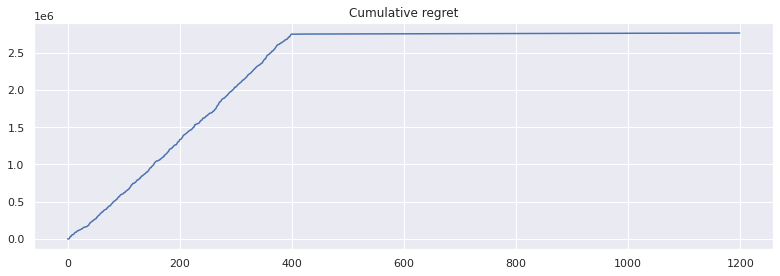

In [31]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

Text(0.5, 1.0, 'reward')

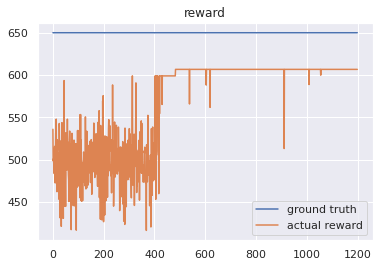

In [32]:
plt.plot([hwithoutconstraints(action2)/(np.sqrt(args.card))**2]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

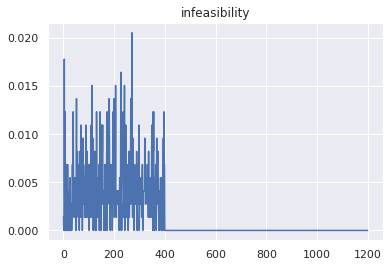

In [33]:
plt.plot(model.feasi)
plt.title('infeasibility')

Text(0.5, 1.0, 'reward')

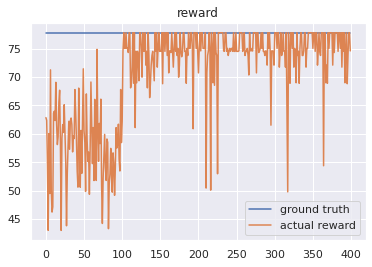

In [40]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

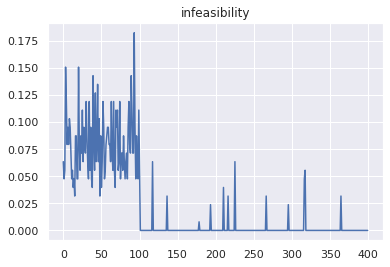

In [41]:
plt.plot(model.feasi)
plt.title('infeasibility')

In [42]:
hwithoutconstraints(action)/(np.sqrt(args.card))

77.81677523590568